<a href="https://colab.research.google.com/github/alexschurmannbel/Data_Science_Python/blob/main/Machine_Learning_Used_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars Price Prediction**

## **Problem Definition**
### **The Context:**

 - The problem of predicting used car prices is significant due to the substantial growing market for used cars, especially in contexts where the demand for second-hand vehicles surpasses that for new ones. With a slowdown in new car sales, consumers are increasingly turning to the pre-owned market. This shift creates a need for accurate pricing models to help both sellers price their cars appropriately and buyers ensure they are getting fair deals. Additionally, for businesses like Cars4U, an effective pricing strategy can lead to increased customer satisfaction and business growth by identifying market trends and pricing gaps.

### **The objective:**

 - The primary objective is to develop a predictive pricing model for used cars. This model aims to estimate the fair market value of a used car based on its characteristics such as make, model, year, mileage, condition, etc. A well-calibrated pricing model can assist Cars4U and similar businesses in setting competitive prices, thus optimizing inventory turnover and maximizing profit. Differential pricing, or varying the price based on market conditions and vehicle attributes, can also be implemented to adjust to dynamic market demands.

### **The key questions:**

1. Which factors most significantly affect the resale value of used cars?
2. How do different characteristics (brand, model, mileage, age, etc.) contribute to the price depreciation of used cars?
3. What pricing strategy should Cars4U adopt to remain competitive while ensuring profitability?
4. How can Cars4U use predictive analytics to identify potential best-sellers and cars that might sit longer in inventory?
5. What trends can be observed in the used car market, and how can these insights be leveraged for better inventory management and pricing strategies?

### **The problem formulation**:

- Using data science, we are trying to solve the challenge of accurately predicting the prices of used cars based on a comprehensive set of features. This involves constructing a statistical or machine learning model that can interpret historical data on car sales to predict future prices. The problem can be formulated as a regression problem where the output (price) is a continuous value. Success in this task will enable Cars4U to dynamically price their inventory based on objective data-driven insights, adapting to market trends and customer preferences to optimize sales and profitability.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [ ]:
# Import libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Import libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing library to calculate skwedness
from scipy.stats import skew

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


# Import library for preparing data and performance metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer
from os import renames
from scipy import stats
import pylab
from sklearn.model_selection import cross_val_score


# For tuning the model
from sklearn.model_selection import GridSearchCV

### **Loading the data**

In [ ]:
# Mounting Google Drive to access files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Reading the csv file
data = pd.read_csv('/content/drive/MyDrive/1. MIT COURSE FINAL/8. Capstone Project/2. ML/used_cars.csv')

In [ ]:
# Creating a saftey copy of the data set
data_original = data.copy()

## **Data Overview**

In [ ]:
# Checking the shape of the Data Set
data.shape

(7253, 14)

**Observations:** The dataset has 14 columns and 7253 rows.

In [ ]:
# Checking first 5 rows of dataset
data.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0        NaN   6.00  
4  140.80    5.0        NaN  17.74

In [ ]:
# Checking last 5 rows of dataset
data.tail()

S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
7248  2011              89411    Diesel       Manual      First    20.54   
7249  2015              59000    Petrol    Automatic      First    17.21   
7250  2012              28000    Diesel       Manual      First    23.08   
7251  2013              52262    Petrol    Automatic      Third    17.20   
7252  2014              72443    Diesel    Automatic      First    10.00   

      Engine  Power  Seats  New_price  Price  
7248  1598.0  103.6    5.0        NaN    NaN  
7249  1197.0  103.6    5.0        NaN    NaN  
7250  1461.0   63.1    5.0        NaN    NaN  
7251  1197.0  103.6    5.0        NaN    NaN  
7252  2148.0  170.0    5.0        NaN    NaN

**Observations:** At first glance, the Serial Number column seems to be identical to the index of the rows. Thus the Serial Number column can be dropped, as it will have no significant impact on the anaylsis. There seem to be missing values for new_price and price. The column 'Year' can be transfomred into 'Age' for easier analysis.

In [ ]:
# Creating a new feature column with Car Age based on the Year of the Car to actual date
data['Car_Age'] = 2023 - data['Year']

In [ ]:
# Dropping 'Serial Number' as it has no analytical impact and dropping 'Year' to replace it with the just created column 'Car_Age'
data=data.drop(columns=['S.No.', 'Year'])

In [ ]:
# Checking Datatypes and overview of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_price          1006 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


**Observations:** The dataset contains several different datatypes:

- Catagorical (Object) variables: Name, Location, Fuel Type, Transmission, Owner_Type. These values will have to be encoded using dummy variables, for the models to take this data into account.

- Continous (integer, folats) variables: Year, Kilometers_driven, Mileage, Engine, Power, Seats, Price, New_price and Car_Age.

- There are missing values for the columns: Mileage, Engine, Power, Seats, Price and New_price.


In [ ]:
# Checking for duplicate values in the data
data.duplicated().sum()

1

**Observations:** There is one duplicated row in the data set.

In [ ]:
# Visualizing the duplicated row
duplicated_row = data[data.duplicated()]
duplicated_row

Name Location  Kilometers_Driven Fuel_Type Transmission  \
6582  Honda City 1.5 E MT   Mumbai              52000    Petrol       Manual   

     Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  Car_Age  
6582      First     17.0  1497.0  118.0    5.0        NaN    NaN       13

**Observations:** Duplicated row 6582 can be dropped.

In [ ]:
# Dropping duplicated row
data = data.drop(index=6582)
data.shape

(7252, 13)

**Observations:** After dropping the duplicated row and the Serial Number Column, Year Column and adding the Car_Age Column, the new shape of the dataset is **7262 rows and 13 columns**

In [ ]:
# Extracting an exact count of the missing values observed above
data.isnull().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6246
Price                1233
Car_Age                 0
dtype: int64

In [ ]:
# Obtaining percentage of missing values
perc_missing_values = (data.isnull().sum() / len(data)) * 100
perc_missing_values

Name                  0.000000
Location              0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027579
Engine                0.634308
Power                 2.413127
Seats                 0.730833
New_price            86.127965
Price                17.002206
Car_Age               0.000000
dtype: float64

**Observations:** Treating these missing values will be crucial for building an accurate model. There are vast differences between the amount of missing values:  
- **Miileage** has the least missing values with only **2 missing values (0.03%)**, which can be easily treated.
- **Engine and Seats** have a similar amount of missing values, **46 and 53 respectively which accounts for only 0.63% and 0.73%**, which should not significantly affect the models as the average, median or equivalent car types can be used to fill the missing values.
- **Power has 175 missing values, around 2.41%**, which can also still be treated using the average, median or equivalent car types to fill the missing values.
- **New_price** has the **highest missing values with 86.13% (6247 count)**. It can be considered to **drop this column** as filling out those missing values will be a very tedious and time consuming task. Given that the mean or median would need to be used to fill out the missing values, the data will not be accurate and as such will hidner more than help to train the model.
- **Price, the tagret variable**, has **1234 missing values (aprox. 17.01%)**. Since this is a supervised machine learning model, **dropping all rows that do not have a price variable is a necessary practice**. Otherwise, the traning of the model would not work.


In [ ]:
# Dropping New_price column as the number of null values is too high to be usable for anaylsis
data=data.drop(columns=['New_price'])

In [ ]:
# Filtering all rows where the price (target) variable is missing
rows_no_price_data = data[data['Price'].isnull()]

# Dropping these rows from the dataset
data = data.drop(rows_no_price_data.index)
data.shape

(6019, 12)

**Observations:** After dropping the column 'New_price' and all rows with null valus for the dependent variable 'Price', the **new shape of the dataset is 6019 rows and 12 columns**

In [ ]:
# Making a security copy of this transformed data (initial columns and rows dropped)
data_inspected = data.copy()

# Checking the shape of the copy to be identical to data instead of data_original
data_inspected.shape

(6019, 12)

## **Exploratory Data Analysis**

### **Statistical Summaries**

In [ ]:
# Obtaining a statistical summary of numeric values
data.describe().T

count          mean           std     min       25%  \
Kilometers_Driven  6019.0  58738.380296  91268.843206  171.00  34000.00   
Mileage            6017.0     18.134961      4.582289    0.00     15.17   
Engine             5983.0   1621.276450    601.355233   72.00   1198.00   
Power              5876.0    113.253050     53.874957   34.20     75.00   
Seats              5977.0      5.279572      0.805960    2.00      5.00   
Price              6019.0      9.479468     11.187917    0.44      3.50   
Car_Age            6019.0      9.641801      3.269742    4.00      7.00   

                        50%       75%         max  
Kilometers_Driven  53000.00  73000.00  6500000.00  
Mileage               18.15     21.10       33.54  
Engine              1493.00   1984.00     5998.00  
Power                 97.70    138.10      560.00  
Seats                  5.00      5.00       10.00  
Price                  5.64      9.95      160.00  
Car_Age                9.00     12.00       25.00

**Observations:**

- **Kilometers driven by previous owner:** There is a vast difference between the minimum value of Km dirven (171) and the maximum (6'500'000), though the maximum value may be an outlier or a data entry error, as it seems unlikely that any car can drive more than 6 million km. As the 3rd quantile indicates that 75% of all used cars in the dataset have driven equal or less than 73'000km, this assumption is further supported. For the minimum value it could be assumed that this is for newer cars, younger in Age. This can be further explored during the Bivariate Analysis.

- **Standard mileage offered by the car company:** For this features, the minimum of 0.00 seems to be an outlier / data entry error as it seems unlikely that no mileage is offered by the car company. Essentially this features indicates the fuel efficiency of the vehicle and as such needs to be above 0.00. However looking at the mean and median, both almost identical with 18.13, and 18.15 repsectively, we can assume that the majority of used cars have a milage within this range. Another point to take into account is that Mileage is captured in two distinct measurements: KMPL or KM/KG.
  - Kilometers per liter (KMPL) for liquid fuels like petrol and diesel
  - Kilometers per kilogram (KM/KG) for gaseous fuels like CNG or LPG.

- **Displacement volume of the engine:** While this column contains missing values which need to be filled in and thus may affect the statistical summary, the differences in the dataset for this feature are vast. Looking at the minimum value of 72 against the maximum value of 5'998, the range between these values is 5926. This is further supported by a wide standard deviation of 601.35. However, looking at the median and the 3rd quantile, a trend is visible that the majority of used cars tend to be between 1'198 and 1'984. As such outliers on the lower and the upper end of the median values are expected.

- **Maximum power of the engine:** The mean of 113.8, median of 97.70 as well as the 3rd Quantile of 138.10 indicate that most used vehicles have a Brake Horsepower in those or lower than those ranges. The minimum value of 34.20 and maximum value of 560 indicate the presence of outliers, which can be present in the used vehicles lot, yet are not the norm of the cars sold.

- **Number of Seats in the car:** The most uniform distribution with only a few outliers, as shown in the minimum value of 2 and maximum value of 10. However, the mean and median both indicate that 5 is the most common number of car seats present in the vehicles sold. This feature can be considered catagorical

- **Price of the used car:** Firstly, the prices need to be multiplied by 100'000 to be truly represented in Indian Rupee as descirbed in the dataset.However for simplification purpuses, it will be left as is for now. This features indicates that the average price that used cars are sold for is around 9.48, also with extreme outliers of 0.44 as minimum value and 160 as maximum value. Since the median of 5.64 is lower than the mean, the presence of outliers is highlighted further.

- **The Age of the Car:** The average age of the vehicle sold is around 9.64 years. Since the median is also 9, it is a strong indicator that the vast majority of cars commonly sold are 9 years of age. There are extreme outliers in the maximum value of 25 years, yet these may be cars which have been in the vehicle lot for a while. The minimum values of 4 years is also much lower than the average.

In [ ]:
# Obtaining a statistical summary of catagorical values
data.describe(include='object').T

count unique                     top  freq
Name          6019   1876  Mahindra XUV500 W8 2WD    49
Location      6019     11                  Mumbai   790
Fuel_Type     6019      5                  Diesel  3205
Transmission  6019      2                  Manual  4299
Owner_Type    6019      4                   First  4929

**Observations:**
- Though this summary gives an overview over the unique counts for all catagorical values, as well as the top value and it's frequency, it would be better to have a deeper insight using another form. For this, a seperate DataFrame containing only the catagorical values will be created and the put in a for loop to count all the unique values and its proportions.

- Important take away from above are the number of unique values for each catagorical column:
    - Name 1876
    - Location 11
    - Fuel Type: 5
    - Transmittion: 2
    - Owner Type: 4

In [ ]:
# Creating a new DataFrame with only catagorical features, adding Seats as catagorical variable
cat_cols = data[['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']]

# Creating a for loop for all catagorical columns using value_counts() to get the absolute values and value_counts(1) * 100 for percentage of frequency
for column in cat_cols:
  absolute_values = (data[column].value_counts())
  proportion_values = (data[column].value_counts(1)*100)

  # Combining both values in a single DataFrame
  cat_cols_overview = pd.DataFrame({'Absolute Values': absolute_values, 'Proportion Values': proportion_values })

  # Print the combined results
  print(f'Values for {column}:')
  print(cat_cols_overview)

  # Adding a line of printing 70 dashes between the different columns for better visualization
  print('-'*70)

Values for Name:
                               Absolute Values  Proportion Values
Name                                                             
Mahindra XUV500 W8 2WD                      49           0.814089
Maruti Swift VDI                            45           0.747632
Honda City 1.5 S MT                         34           0.564878
Maruti Swift Dzire VDI                      34           0.564878
Maruti Swift VDI BSIV                       31           0.515036
...                                        ...                ...
Ford Fiesta Titanium 1.5 TDCi                1           0.016614
Mahindra Scorpio S10 AT 4WD                  1           0.016614
Hyundai i20 1.2 Era                          1           0.016614
Toyota Camry W4 (AT)                         1           0.016614
Mahindra Xylo D4 BSIV                        1           0.016614

[1876 rows x 2 columns]
----------------------------------------------------------------------
Values for Location:
        

**Observations:**

- **Name of vehicles:** is widely dispersed. There are 1876 unique names of vehicles, none accounting for more than 1% of all the vehicles. Thus there is no clear trend in which vehicles is the most sold. The top 3 vehicles sold are:
    - Mahindra XUV500 W8 2WD with 49 units (0.81%)
    - Maruti Swift VDI with 45 units (0.75%)
    - Honda City 1.5 S MT and Maruti Swift Dzire VDI with 34 units (0.56%)

- **Location of vehicles:** Most vehicles are sold or available for purchase in Mumbai (13.13%) and Hyderabad (12.33%). Followed by Kochi, Coimbatore and Pune which all individually account for about 10% of vehicle location. Together these 5 cities account for aprox. 57.18% of all vehicle locations. Ahmedabad is the city with least vehicles with only 224 units (3.72%)

- **Fuel Type:** The majority of cars use either Diesel (53.25%) and Petrol (45.62%). Only a few vehicles utilize gaseous fuels like CNG (56 units / 0.93%) or LPG (10 units / 0.17%). There are only 2 vehicles in the dataset that run on electric energy.

- **Transmission Type:** There are only 2 options for transmission type, where manual transmission is the most frequent with 71.42%. Automatic transmission only accounts for 28.68%.

- **Owner Type:** 81.89% of vehicles only had one previous owner, followed by a wide difference of 16.08% for vehicles with two previous owners. Third and more previous owners account for aprox. 2% of all vehicles.

- **Seats:** 83.90% of all cars have 5 seats, followed by, with wide distance, vehicles with 7 seats (11.28%). Together 5 and 7 seaters account for 95% of all vehicles. The rest of seat numbers, could be considered outliers.

### **Univariate Analysis**

#### In depth univariate analysis of continous features


In [ ]:
# Creating a function to plot boxplot and histograms for individual analysis
"""
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """

def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):

    # Setting up the subplot figure, sharing the same x-axis.
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)

    # Drawing the boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color='violet')
    ax_box.set(xlabel='')  # Removing x labels for the boxplot for a cleaner look since shared x-axis

    # Drawing the histogram
    if bins is None:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist) #if no value for bins is defined, it wil be automatically assigned
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins) #else, if there is a bin value assigned, choose the bin value

    # Calculating mean and median
    mean_value = data[feature].mean()
    median_value = data[feature].median()

    # Adding mean and median lines
    ax_hist.axvline(mean_value, color='green', linestyle='--')
    ax_hist.axvline(median_value, color='red', linestyle='-.')

    # Placing annotations below the x axis
    y_pos_text = -0.15 * plt.ylim()[1]
    y_pos_text2 = -0.20 * plt.ylim()[1]

    # Annotating mean and median lines with actual values for easier interpretation, with only 2 number after point
    ax_hist.text(mean_value, y_pos_text2, f'{mean_value:.2f}', color='green', ha='right', va='bottom', fontsize=10)
    ax_hist.text(median_value, y_pos_text, f'{median_value:.2f}', color='red', ha='left', va='bottom', fontsize=10)
    y_pos_text = -0.05 * plt.ylim()[1]

##### Price

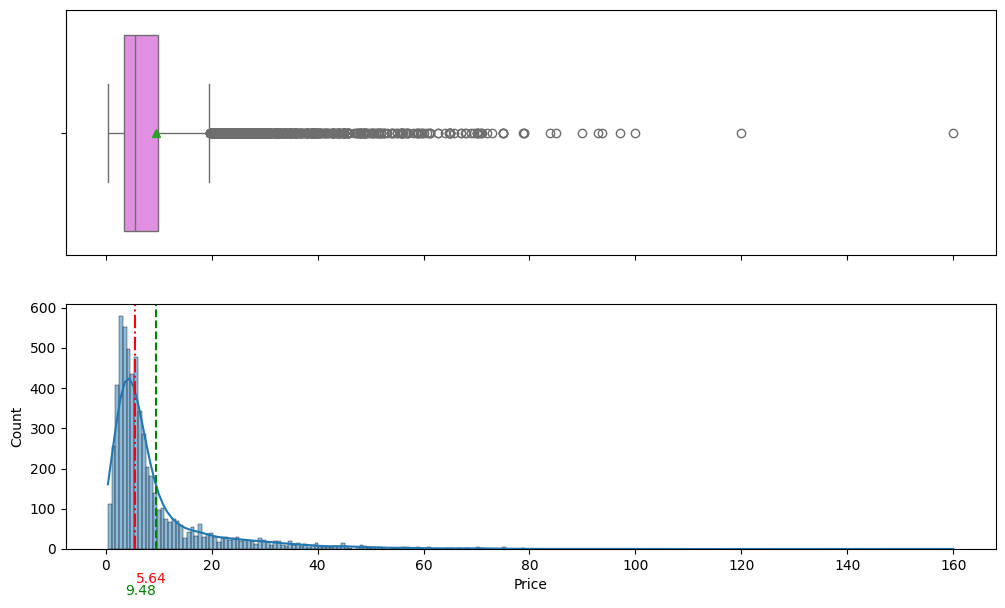

In [ ]:
# Plotting the distribution of Price
histogram_boxplot(data, 'Price')

**Observations:**
- Distribution is right-skweded indicating that most cars are priced on the lower end, with a some expensive outliers. This is further suppored by the median being higher than the mean, suggetsing that most cars are indeed priced at lower range, visible by the clear peaks in the distribution between 4 - 5.64 (median)
- The Boxplot shows numerous outliers above the upper whisker, yet the interquartile range is relatively narrow, indicating as well that the vast majority of cars are priced at lower ends.
- The mean (green line) of 9.48 is therefore highly affected by these outliers and is larger than the median (red line) of 5.64.

Conclusion: A transformations needs to be done for this variable to bring it closer to a Gaussian distribution and imporve model performance.

In [ ]:
# Filtering for values above 100 in 'Price' to inspect extreme maximum outliers
outliers_price_max = data[data['Price'] >= 100]
outliers_price_max

Name   Location  \
4079  Land Rover Range Rover 3.0 Diesel LWB Vogue  Hyderabad   
5781                   Lamborghini Gallardo Coupe      Delhi   
5919                       Jaguar F Type 5.0 V8 S  Hyderabad   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
4079              25000    Diesel    Automatic      First    13.33  2993.0   
5781               6500    Petrol    Automatic      Third     6.40  5204.0   
5919               8000    Petrol    Automatic      First    12.50  5000.0   

      Power  Seats  Price  Car_Age  
4079  255.0    5.0  160.0        6  
5781  560.0    2.0  120.0       12  
5919  488.1    2.0  100.0        8

**Observations** 3 luxury brand cars: Land Rover, Lamborghini and Jaguar are sold at the highest prices and have very little kilometers driven. Especially the Lamborghini Gallardo Coupe	with 12 years of age, very low mileage of 6.40 and extremly high Power of 560 seems to be an outlier for price based on the above observations.

In [ ]:
# Filtering for values above 100 in 'Price' to inspect extreme minimum outliers
outliers_price_min = data[data['Price'] <= 0.5]
outliers_price_min

Name Location  Kilometers_Driven Fuel_Type Transmission  \
1628  Maruti 800 Std BSIII   Jaipur              12000    Petrol       Manual   
1713          Tata Nano Lx     Pune              65000    Petrol       Manual   
2605          Tata Nano Cx   Jaipur              57000    Petrol       Manual   
2847      Hyundai Getz GLS     Pune              86000    Petrol       Manual   
3138        Maruti Zen LXI   Jaipur              95150    Petrol       Manual   
3228        Maruti 800 Std     Pune              52000    Petrol       Manual   

     Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
1628     Second     16.1   796.0   37.0    4.0   0.45       19  
1713     Second     26.0   624.0   35.0    4.0   0.44       12  
2605      First     26.0   624.0   35.0    4.0   0.50       13  
2847     Second     15.3  1341.0   83.0    5.0   0.45       18  
3138      Third     17.3   993.0   60.0    5.0   0.45       25  
3228      First     16.1   796.0   37.0    4.0   0.50       20

**Observations:** The majority of extremly cheap cars are over 18 years old with a maximum range of even 25 years old. However, Tata Models (years of age, 12 and 13) are also priced at the extreme lower end without extreme car age values. It can be observed that those models have only 4 seats (less than the average of 5) and very low values for Power and Engine, which may explain this observation.

##### Kilometers Driven

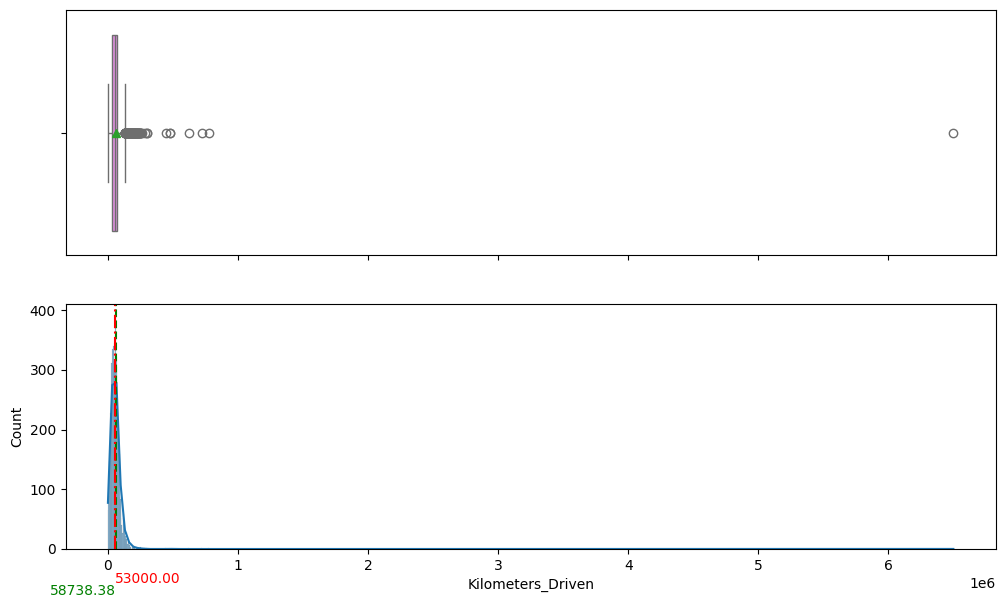

In [ ]:
# Plotting the distribution of Kilometers Driven
histogram_boxplot(data, 'Kilometers_Driven')

**Observations:**
- Distribution is right-skweded indicating that most cars have low to moderate kilometers driven, with a significant number of cars concentrated at the very low end (close to zero).
- The Boxplot shows outliers above the upper whisker, with one exceptional outlier - probably the maxmium value seen in the statitsical summary before - making the distribution even more right-skweded.
- The interquartile range is very narrow, indicating as well that the vast majority of cars have kilometers driven around the median / mean values.
- The mean (green line) of 58'738.38 is highly affected by these outliers and is thus larger than the median (red line) of 53'000.

Conclusion: A transformations needs to be done for this variable to bring it closer to a Gaussian distribution and imporve model performance and treatment of extreme values, to make sure that it is not a data entry error but a true value.

From the statistical summary it is known that the maximum value for Kilometers driven is 6'500'000.00, which is an unlikely value for this feature. It can be assumed that this is a data entry error. To validade if this is atypical, filtering for all values above 500'000 kilometers dirven.


In [ ]:
# Filtering for values above 500'000 in 'Kilometers_Driven'
outliers_km_max = data[data['Kilometers_Driven'] > 500000]
outliers_km_max

Name Location  Kilometers_Driven  \
340   Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata             775000   
358                    Hyundai i10 Magna 1.2  Chennai             620000   
1860        Volkswagen Vento Diesel Highline  Chennai             720000   
2328               BMW X5 xDrive 30d M Sport  Chennai            6500000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  \
340     Diesel    Automatic      First    19.30  1968.0  141.0    5.0    7.5   
358     Petrol       Manual      First    20.36  1197.0   78.9    5.0    2.7   
1860    Diesel       Manual      First    20.54  1598.0  103.6    5.0    5.9   
2328    Diesel    Automatic      First    15.97  2993.0  258.0    5.0   65.0   

      Car_Age  
340        10  
358        14  
1860       10  
2328        6

Four vehicles have been identified as having values over 500'000 km driven. While 775'000. 620'000 and 720'000 are extreme values, given the Age of the Car 10, 14 and 10 years respectively, this may be true values. As such these values will not be dropped. However vehicle in row index 2328 with 6'500'000 with only 6 years of age seems to be an entry error. This row will be dropped.

In [ ]:
# Dropping row 2328 which was identified as an entry error
data = data.drop(index=2328)

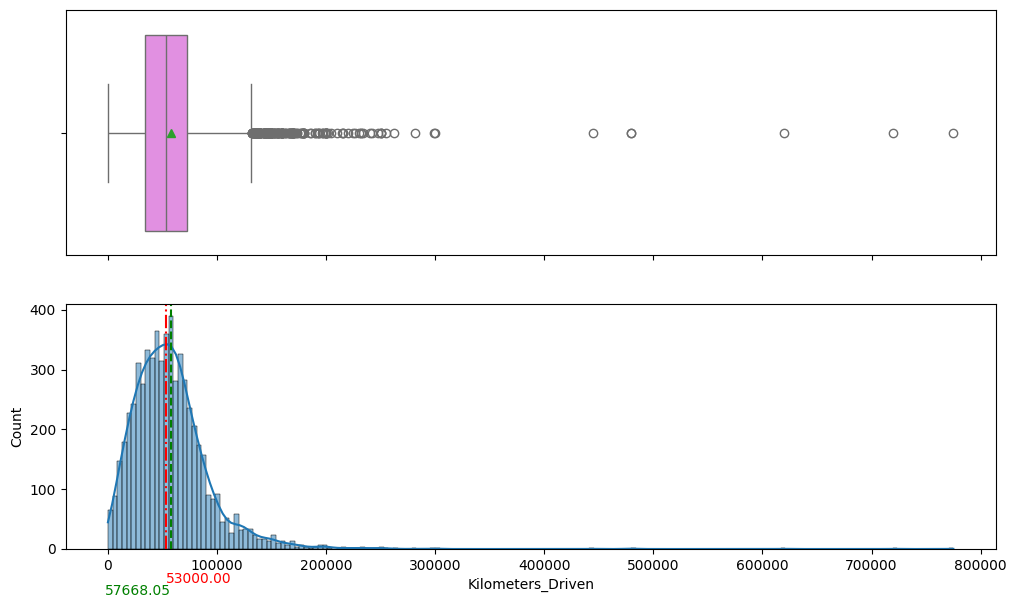

In [ ]:
# Plotting the distribution again after extreme outlier treatment
histogram_boxplot(data, 'Kilometers_Driven')

**Observations:** After removing the extreme outlier, the distribution suggests a more normal distribution, still right-skewed, yet not as extreme. Also the mean and median values have become closer after the outlier treatment, since the mean has now changed from 58'738.38 to 57'668.05. This further highlighting that Kilometers Driven is now a more normal distribution. The visualizations are also easier to interpret, it's easily seen that most vehicles have less than 200'000 km driven.

In [ ]:
# Filtering for values above 500'000 in 'Kilometers_Driven'
outliers_km_min = data[data['Kilometers_Driven'] <= 1000]
outliers_km_min

Name   Location  \
173             Hyundai Grand i10 1.2 Kappa Asta    Kolkata   
1161                 Tata Tigor 1.2 Revotron XTA  Ahmedabad   
1198           Volkswagen Polo 1.0 MPI Trendline  Hyderabad   
1242              Jaguar XE 2.0L Diesel Prestige      Delhi   
1361               Maruti Alto 800 2016-2019 VXI     Mumbai   
1598                        Tata Xenon XT EX 4X2     Jaipur   
2054                      Maruti Ignis 1.2 Alpha     Mumbai   
2646  Ford Figo 2015-2019 1.2P Sports Edition MT     Mumbai   
5339      Hyundai i20 Active SX Dual Tone Petrol       Pune   
5606                  Maruti Wagon R ZXI AMT 1.2     Mumbai   
5941                            Renault KWID RXL       Pune   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
173                1000    Petrol       Manual      First    18.90  1197.0   
1161               1000    Petrol    Automatic      First    20.30  1199.0   
1198               1000    Petrol       Manual      First    18.78   999.0   
1242               1000    Diesel    Automatic      First    13.60  1999.0   
1361                171    Petrol       Manual      First    24.70   796.0   
1598               1000    Diesel       Manual      First    13.49  2179.0   
2054               1000    Petrol       Manual      First    20.89  1197.0   
2646               1000    Petrol       Manual      First    18.12  1196.0   
5339               1000    Petrol       Manual      First    17.19  1197.0   
5606                600    Petrol    Automatic      First    21.50  1197.0   
5941               1000    Petrol       Manual      First    25.17   799.0   

       Power  Seats  Price  Car_Age  
173    81.86    5.0   6.50        4  
1161   84.00    5.0   6.85        5  
1198   75.00    5.0   5.68        4  
1242  177.00    5.0  40.00        5  
1361   47.30    5.0   3.60        4  
1598  138.03    5.0   7.50        6  
2054   81.80    5.0   6.36        6  
2646   86.80    5.0   6.80        4  
5339   81.86    5.0   8.60        4  
5606   81.80    5.0   6.25        4  
5941   53.30    5.0   3.40        5

**Observations:** There are 11 vehciles with less tan 1000 km driven. Most of these cars are located in Mumbai. Two extreme outliers are found with 171km dirven (index 1361) and 600km driven (index 5606), both in the minimum value for Car Age of 4 years, which validades that these values are real possibilities. In general all 11 vehciles are velow 6 years of age and only had one previous owner. As such these outliers can be considered to be real data points and will not be removed.

##### Mileage

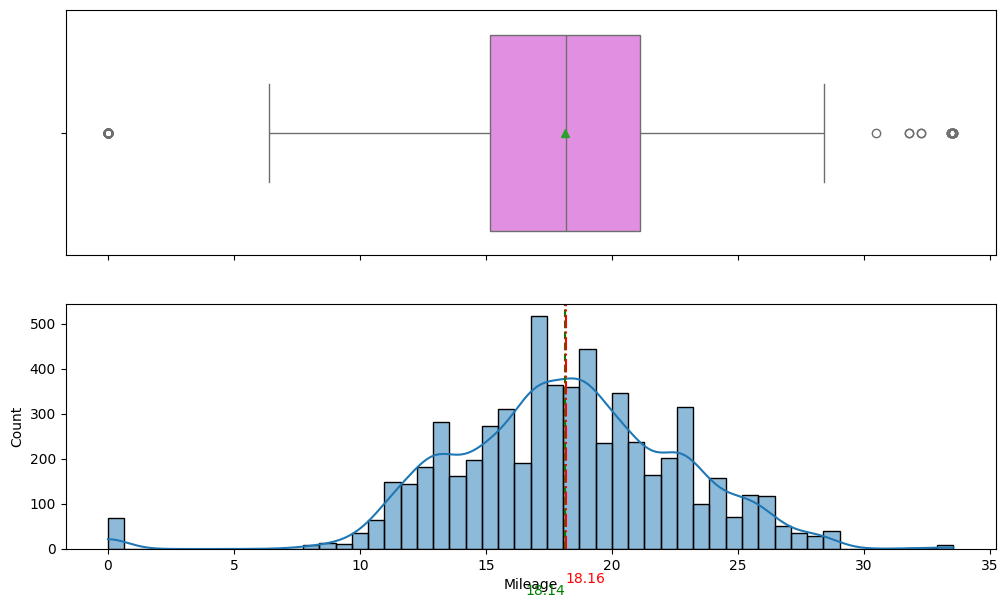

In [ ]:
# Plotting the distribution of Mileage
histogram_boxplot(data, 'Mileage')

**Observations:**
- Distribution is relatively close to a Gaussian distribution, indicating that most cars have mileages clustered around the center of the distribution, with fewer cars at the extreme low and high ends.
- The Boxplot shows some outliers above the upper whisker, with one outlier below the lower whisker. This could be the miniumum value of 0.00, which may be a data entry error. Yet the outliers do not highly affect the distribution, which is further supported by the mean (green line) of 18.13 and the median (red line) of 18.15, being close.  
- The Boxplot further indicates that most outliers are captured withing the whiskers, with only a few exceptional values as outliers. .

Conclusion: While a transformation is not necessary for this distribution, as it is close to a normal one, outlier treatment needs to be done to assure that these outliers are real values and not data entry errors.

From the statistical summary it is known that the minimum value for Mileage is 0.00, which is an unlikely value for this feature. It can be assumed that this is a data entry error. To validade if this is atypical, filtering for all values with Mileage equal to zero.

In [ ]:
# Filtering for values equal to 0 in 'Mileage'
outliers_mileage = data[data['Mileage'] == 0]
outliers_mileage

Name    Location  Kilometers_Driven  \
14              Land Rover Freelander 2 TD4 SE        Pune              85000   
67    Mercedes-Benz C-Class Progressive C 220d  Coimbatore              15369   
79                      Hyundai Santro Xing XL   Hyderabad              87591   
194                         Honda City 1.5 GXI   Ahmedabad              60006   
229                           Ford Figo Diesel   Bangalore              70436   
...                                        ...         ...                ...   
5647                    Toyota Qualis Fleet A3      Mumbai             227000   
5875  Mercedes-Benz C-Class Progressive C 220d   Ahmedabad               4000   
5943                   Mahindra Jeep MM 540 DP     Chennai              75000   
5972                    Hyundai Santro Xing GL      Mumbai              65000   
6011                   Skoda Superb 3.6 V6 FSI   Hyderabad              53000   

     Fuel_Type Transmission      Owner_Type  Mileage  Engine  Power  Seats  \
14      Diesel    Automatic          Second      0.0  2179.0  115.0    5.0   
67      Diesel    Automatic           First      0.0  1950.0  194.0    5.0   
79      Petrol       Manual           First      0.0  1086.0    NaN    5.0   
194     Petrol       Manual           First      0.0     NaN    NaN    NaN   
229     Diesel       Manual           First      0.0  1498.0   99.0    NaN   
...        ...          ...             ...      ...     ...    ...    ...   
5647    Diesel       Manual  Fourth & Above      0.0  2446.0    NaN    8.0   
5875    Diesel    Automatic           First      0.0  1950.0  194.0    5.0   
5943    Diesel       Manual           First      0.0  2112.0    NaN    6.0   
5972    Petrol       Manual          Second      0.0  1086.0   62.0    5.0   
6011    Petrol    Automatic           First      0.0  3597.0  262.6    5.0   

      Price  Car_Age  
14    17.50       11  
67    35.67        4  
79     1.30       18  
194    2.95       16  
229    3.60        8  
...     ...      ...  
5647   2.20       22  
5875  35.00        4  
5943   1.70       21  
5972   1.39       15  
6011   4.75       14  

[68 rows x 12 columns]

**Observations:** Given that mileage, is a measure of how many miles a car can travel on a single gallon of fuel, 0.00 can be assumed to be a data entry error. It can be assumed that this information was missing, yet instead of leaving it blank, it was filled out with 0.00. As such replacing these values with NaN, is the best course of action. Later on, during the treatment of missing values, these can be replaced by an average or median for this feature.

In [ ]:
# Replace 0.00 in 'Mileage' with NaN
data['Mileage'] = data['Mileage'].replace(0.00, np.nan)

In [ ]:
# Verifying there is no more Mileage with value 0.00 and were changed to null values.
data.isnull().sum()

Name                   0
Location               0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 42
Price                  0
Car_Age                0
dtype: int64

**Observation:** The amount of missing values has increased from 2 to 70, indicating that the 68 rows with mileage 0.00 have indeed been changed to null values.

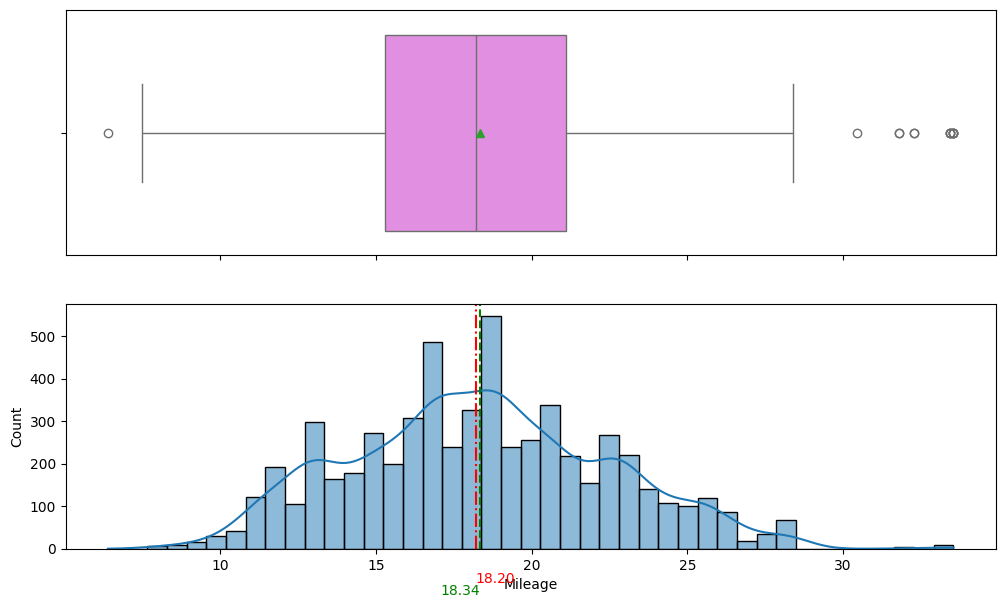

In [ ]:
# Plotting the distribution again after extreme outlier treatment
histogram_boxplot(data, 'Mileage')

**Observations:** Both the median and mean values of Mileage have been changed. The mean was increased from 18.13 to 18.34, whereas the median was inreased from 18.15 to 18.20. Both median and mean have shifted closer together, indicating a more symmetric distribution. Overall, the histogram seems more bell-shaped with a smoother curve.

In [ ]:
# Filtering minimum outliers to inspect
outliers_mileage_min = data[data['Mileage'] <= 9]
outliers_mileage_min

Name    Location  Kilometers_Driven  \
70          Porsche Cayenne 2009-2014 Turbo      Mumbai              73000   
152   Mercedes-Benz S Class 2005 2013 S 500     Kolkata              35277   
926              Porsche Cayman 2009-2012 S   Hyderabad              10000   
1078            Porsche Boxster S tiptronic     Kolkata              10512   
1123           BMW 7 Series 2007-2012 740Li        Pune              66000   
1596                Audi Q7 4.2 FSI quattro       Delhi              71000   
2193                    Volvo S60 D4 SUMMUM  Coimbatore              42259   
2305   Porsche Cayman 2009-2012 S tiptronic      Mumbai               8000   
2973                   Volvo S60 D4 KINETIC       Delhi              48000   
2978          Porsche Panamera 2010 2013 4S  Coimbatore              42400   
3235                   Volvo S60 D4 KINETIC   Ahmedabad              34000   
3328       Mercedes-Benz M-Class ML 320 CDI      Mumbai              66000   
3341           BMW 7 Series 2007-2012 750Li       Kochi              50161   
3724       Mercedes-Benz M-Class ML 320 CDI        Pune              53000   
4272                     Honda Accord V6 AT     Chennai             120000   
4627                BMW 6 Series 650i Coupe       Kochi              65329   
4722          Mercedes-Benz SL-Class SL 500     Kolkata              35000   
4821                BMW 6 Series 630i Coupe      Mumbai               5900   
5218          BMW 3 Series 330d Convertible      Mumbai              49000   
5521        Bentley Continental Flying Spur   Hyderabad              48000   
5603      Porsche Panamera 2010 2013 Diesel       Delhi              36400   
5781             Lamborghini Gallardo Coupe       Delhi               6500   
5868          BMW 3 Series 330d Convertible       Kochi              51240   
6006       Mercedes-Benz M-Class ML 320 CDI      Mumbai             102002   

     Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
70      Petrol    Automatic      First     8.50  4806.0  500.00    5.0   
152     Petrol    Automatic      First     7.81  5461.0  362.90    5.0   
926     Petrol       Manual      First     9.00  3436.0     NaN    2.0   
1078    Petrol    Automatic      First     8.60  2706.0  265.00    2.0   
1123    Petrol    Automatic     Second     8.45  2979.0  321.00    5.0   
1596    Petrol    Automatic      First     8.30  4134.0  250.00    7.0   
2193    Diesel    Automatic      First     9.00  1984.0  181.00    5.0   
2305    Petrol    Automatic      First     9.00  3436.0     NaN    2.0   
2973    Diesel    Automatic     Second     9.00  1984.0  181.00    5.0   
2978    Petrol    Automatic      Third     8.00  4806.0  394.30    4.0   
3235    Diesel    Automatic      First     9.00  1984.0  181.00    5.0   
3328    Diesel    Automatic     Second     8.70  2987.0  224.34    5.0   
3341    Petrol    Automatic      First     8.77  4395.0  402.00    5.0   
3724    Diesel    Automatic      First     8.70  2987.0  224.34    5.0   
4272    Petrol    Automatic     Second     9.00  2997.0  218.00    5.0   
4627    Petrol    Automatic      First     7.94  4395.0  450.00    4.0   
4722    Petrol    Automatic      First     8.10  5461.0  387.30    2.0   
4821    Petrol    Automatic      First     7.94  4395.0  450.00    4.0   
5218    Diesel    Automatic      First     8.20  2993.0  245.00    4.0   
5521    Petrol    Automatic      First     8.60  5998.0  552.00    4.0   
5603    Diesel    Automatic      First     7.50  4806.0  394.30    4.0   
5781    Petrol    Automatic      Third     6.40  5204.0  560.00    2.0   
5868    Diesel    Automatic      First     8.20  2993.0  245.00    4.0   
6006    Diesel    Automatic      First     8.70  2987.0  224.34    5.0   

       Price  Car_Age  
70     14.50       15  
152    30.00       13  
926    40.00       13  
1078   64.00        8  
1123   10.75       15  
1596   11.99       15  
2193   24.36        7  
2305   43.00       12  
2973   16.00        9

**Observations:** The vehicles with the least mileage are considered luxry brands such as: Bently, Lamborghini, Mercedes-Benz, Porsche, BMW and Audi. There are 3 Volvo Brand Vehicles which have low milege, yet in comparison to the other brands, also have low values for Engine and Power. An outlier here is the Honda Accord V6 AT (index=4272), which has similar vlaues to the luxury brand cars, though this vehciles is also one of the 2 oldest Cars with 17 years which may explain this outlier.

In [ ]:
# Filtering minimum outliers to inspect
outliers_mileage_max = data[data['Mileage'] >=30]
outliers_mileage_max

Name Location  Kilometers_Driven Fuel_Type  \
1269  Maruti Alto 800 2016-2019 CNG LXI   Mumbai              10600       CNG   
1332             Maruti Wagon R CNG LXI     Pune              79494       CNG   
2059             Maruti Wagon R CNG LXI   Mumbai              54000       CNG   
2371             Maruti Wagon R CNG LXI     Pune              29202       CNG   
2701          Maruti Celerio CNG VXI MT    Kochi              70536       CNG   
3119   Maruti Alto K10 LXI CNG Optional    Kochi              44202       CNG   
3129             Maruti Wagon R CNG LXI    Delhi              74663       CNG   
3553  Maruti Alto 800 2016-2019 CNG LXI     Pune              18000       CNG   
3869  Maruti Alto 800 2016-2019 CNG LXI    Delhi              65537       CNG   
4141             Maruti Wagon R CNG LXI   Mumbai              47200       CNG   
4769  Maruti Alto 800 2016-2019 CNG LXI    Kochi              24310       CNG   
5178          Maruti Celerio CNG VXI MT    Delhi              64687       CNG   
5710            Maruti Alto 800 CNG LXI   Mumbai              26200       CNG   
5935            Maruti Alto K10 LXI CNG     Pune              59525       CNG   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
1269       Manual      First    33.44   796.0  40.30    4.0   3.50        5  
1332       Manual      First    33.54   998.0  67.04    5.0   2.96       10  
2059       Manual      First    33.54   998.0  67.04    5.0   3.05       10  
2371       Manual      First    33.54   998.0  67.04    5.0   3.90        9  
2701       Manual      First    31.79   998.0  58.33    5.0   4.58        7  
3119       Manual      First    32.26   998.0  58.20    4.0   4.00        5  
3129       Manual      First    33.54   998.0  67.04    5.0   3.25        9  
3553       Manual      First    33.44   796.0  40.30    4.0   3.00        8  
3869       Manual     Second    33.44   796.0  40.30    4.0   2.10       11  
4141       Manual      First    33.54   998.0  67.04    5.0   2.85        9  
4769       Manual      First    33.44   796.0  40.30    4.0   3.70        6  
5178       Manual      First    31.79   998.0  58.33    5.0   3.80        8  
5710       Manual      First    30.46   796.0  47.30    5.0   2.15       10  
5935       Manual     Second    32.26   998.0  58.20    4.0   3.10        8

**Observations:** The vehicles with the highest Mileage values are all of the Brand Maruti, yet also have very low values for Engine and Power.

##### Engine

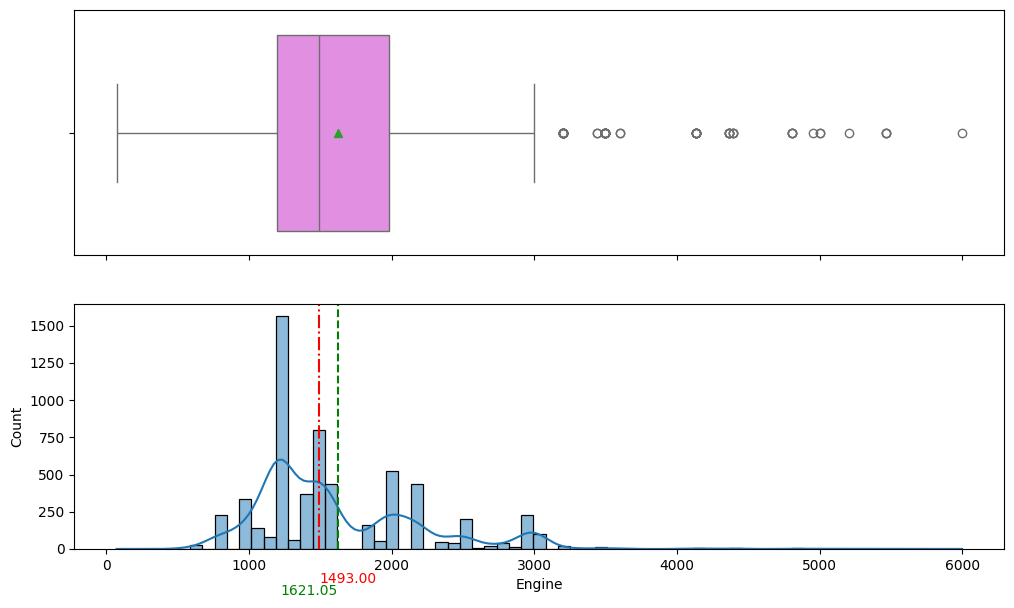

In [ ]:
# Plotting the distribution of Engine
histogram_boxplot(data, 'Engine')

**Observations:**
- Distribution is right-skweded indicating that most cars have smaller to moderate engines and a few have larger engines. It can be visualized that there there are clear peaks around 1'300 and 1'493 (median).
- The Boxplot shows that the majority of datapoints are captured within the whiskers.  
- The mean (green line) of 1'621.28 is affected by these outliers and is thus larger than the median (red line) of 1'493.

Conclusion: A transformations needs to be done for this variable to bring it closer to a Gaussian distribution and imporve model performance and treatment of extreme values, to make sure that it is not a data entry error but a true value.

From the statistical summary it is known that the minimum value for Engine is 72.00, which is an unlikely value for this feature. It can be assumed that this is a data entry error. To validade if this is atypical, filtering for all values with Engine less than 600, which is the smallest engine on the market.

In [ ]:
# Filtering for values equal to 0 in 'Mileage'
outliers_engine = data[data['Engine'] < 600]
outliers_engine

Name Location  Kilometers_Driven Fuel_Type Transmission  \
4446  Mahindra E Verito D4  Chennai              50000  Electric    Automatic   

     Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
4446      First      NaN    72.0   41.0    5.0   13.0        7

In [ ]:
# Inspecting other Mahindra E Verito D4 vehicles to compare engine values.
Mahindra_E_Vertio_D4_data = data[data['Name'] == 'Mahindra E Verito D4']
Mahindra_E_Vertio_D4_data

Name Location  Kilometers_Driven Fuel_Type Transmission  \
4446  Mahindra E Verito D4  Chennai              50000  Electric    Automatic   

     Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
4446      First      NaN    72.0   41.0    5.0   13.0        7

**Observations:** There are no other cars with this name in the datset

In [ ]:
# Inspecting all Mahindra vehicles to compare engine values.
Mahindra_cars = data[data['Name'].str.startswith('Mahindra')]
Mahindra_cars.head(50)

Name    Location  \
32                 Mahindra Ssangyong Rexton RX7   Bangalore   
37       Mahindra KUV 100 mFALCON G80 K6 5str AW       Delhi   
42     Mahindra KUV 100 mFALCON D75 K8 Dual Tone  Coimbatore   
49                         Mahindra Thar CRDe AC      Jaipur   
71                        Mahindra XUV500 W8 4WD      Mumbai   
94                        Mahindra XUV500 W8 2WD       Delhi   
108                       Mahindra XUV500 W8 2WD       Delhi   
125                         Mahindra Scorpio VLX     Kolkata   
131                   Mahindra XUV500 AT W10 FWD      Jaipur   
163                       Mahindra XUV500 W8 2WD      Mumbai   
190                Mahindra Scorpio 1.99 S10 4WD       Kochi   
200                        Mahindra NuvoSport N6     Chennai   
223                  Mahindra Verito 1.5 D4 BSIV   Hyderabad   
276   Mahindra Scorpio VLX 2.2 mHawk Airbag BSIV        Pune   
318                       Mahindra XUV500 W8 4WD   Hyderabad   
412                     Mahindra Scorpio S10 4WD       Kochi   
442                          Mahindra Bolero ZLX  Coimbatore   
449                       Mahindra XUV500 W8 2WD       Kochi   
509                    Mahindra XUV500 AT W8 FWD   Bangalore   
513                     Mahindra Scorpio 1.99 S8       Delhi   
553                       Mahindra XUV500 W6 2WD        Pune   
561        Mahindra Renault Logan 1.5 DLE Diesel     Chennai   
573                          Mahindra Bolero ZLX      Jaipur   
579                     Mahindra Bolero VLX CRDe  Coimbatore   
591                           Mahindra Quanto C2   Hyderabad   
605                      Mahindra XUV500 W10 2WD   Ahmedabad   
609                     Mahindra Scorpio S4 Plus   Bangalore   
613                    Mahindra Bolero ZLX BSIII     Kolkata   
623                             Mahindra Xylo E8   Hyderabad   
626                      Mahindra XUV500 W10 2WD       Kochi   
629                      Mahindra Bolero DI BSII     Chennai   
649                       Mahindra XUV500 W8 2WD       Delhi   
754                       Mahindra XUV500 W8 2WD   Ahmedabad   
768                      Mahindra Scorpio 2.6 DX     Chennai   
789                      Mahindra XUV500 W10 2WD  Coimbatore   
796                        Mahindra XUV500 W9 AT  Coimbatore   
801                      Mahindra XUV500 W10 2WD       Kochi   
838                             Mahindra Xylo H4     Chennai   
862                    Mahindra Bolero VLX BS IV     Chennai   
881                       Mahindra XUV500 W8 2WD       Delhi   
894                Mahindra Scorpio LX 2.6 Turbo   Hyderabad   
951              Mahindra KUV 100 mFALCON D75 K6       Kochi   
1013                     Mahindra Scorpio 2.6 LX   Bangalore   
1016                      Mahindra XUV500 W6 2WD     Chennai   
1061               Mahindra XUV500 W4 1.99 mHawk       Delhi   
1096                   Mahindra XUV300 W8 Diesel     Chennai   
1145                      Mahindra XUV500 W8 4WD  Coimbatore   
1146                         Mahindra Bolero ZLX      Mumbai   
1222        Mahindra Scorpio VLX 2.2 mHawk BSIII  Coimbatore   
1231                          Mahindra XUV500 W4   Bangalore   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
32                72000    Diesel    Automatic     Second    11.18  2696.0   
37                52000    Petrol       Manual      First    18.15  1198.0   
42                22033    Diesel       Manual      First    25.32  1198.0   
49                75800    Diesel       Manual     Second    16.55  2498.0   
71                55729    Diesel       Manual      First    15.10  2179.0   
94                58000    Diesel       Manual      First    15.10  2179.0   
108               65000    Diesel       Manual     Second    16.00  2179.0   
125               42000    Diesel       Manual      First    12.05  2179.0   
131               54000    Diesel    Automatic      First    16.00  2179.0   

**Observations:** Given that the smallest Engine size is aprox. 600, a value of 72.00 can be assumed to be a data entry error. Yet in this dataset there is only one vehicle of with the name 'Mahindra E Verito D4'. Looking at a sample of 50 vehicles of the same brand, no other low value of same model type can be identified. Further inspecting this outlier it can be seen that the Fuel type is electric. Given our statitical summary of catagorical variables, it is known that there are only 2 cars with electric fuel type in the dataset. Comparing both electric vehicles may be beneficial in understanding this outlier more.

In [ ]:
# Filtering for all electric vehicles
Electric_cars = data[data['Fuel_Type'] == 'Electric']
Electric_cars

Name Location  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai              50000  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai              44000  Electric   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
4446    Automatic      First      NaN    72.0   41.0    5.0  13.00        7  
4904    Automatic      First      NaN  1798.0   73.0    5.0  12.75       12

**Observations:** Since the other electrical car is of a different year, brand and model, however with a much higher Engine value, the best course of action will be to replace the 72.00 with NaN and fill in the missing value during missing value treatment, after the EDA.

In [ ]:
# Replacing the value of 72.00 with NaN
data['Engine'] = data['Engine'].replace(72.00, np.nan)

In [ ]:
# Double checking this change was actioned by filtering for row 4446
data.loc[4446]

Name                 Mahindra E Verito D4
Location                          Chennai
Kilometers_Driven                   50000
Fuel_Type                        Electric
Transmission                    Automatic
Owner_Type                          First
Mileage                               NaN
Engine                                NaN
Power                                41.0
Seats                                 5.0
Price                                13.0
Car_Age                                 7
Name: 4446, dtype: object

From the statistical summary, it is also known that the maximum value for engine is 5998, which is typcial only for high performing sports cars or luxury cars. To make sure that there are no outliers above Engine Value of 3000 (limit of upper whisker), these vehicle types are quickly inspected to meet the above criterium.

In [ ]:
# Filtering for maximum outliers for column Engine
outliers_engine_max = data[data['Engine'] >=3000]
outliers_engine_max.head(61)

Name    Location  \
70                Porsche Cayenne 2009-2014 Turbo      Mumbai   
152         Mercedes-Benz S Class 2005 2013 S 500     Kolkata   
459            Audi Q7 4.2 TDI Quattro Technology  Coimbatore   
586            Audi Q7 4.2 TDI Quattro Technology       Kochi   
589       Mercedes-Benz S Class 2005 2013 S 350 L   Bangalore   
...                                           ...         ...   
5728  Mercedes-Benz E-Class 2009-2013 E350 Petrol     Kolkata   
5781                   Lamborghini Gallardo Coupe       Delhi   
5885       Mercedes-Benz R-Class R350 4Matic Long        Pune   
5919                       Jaguar F Type 5.0 V8 S   Hyderabad   
6011                      Skoda Superb 3.6 V6 FSI   Hyderabad   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
70                73000    Petrol    Automatic      First     8.50  4806.0   
152               35277    Petrol    Automatic      First     7.81  5461.0   
459               51002    Diesel    Automatic      First    11.33  4134.0   
586               79926    Diesel    Automatic      First    11.33  4134.0   
589               47088    Petrol    Automatic     Second    10.13  3498.0   
...                 ...       ...          ...        ...      ...     ...   
5728              43600    Petrol    Automatic      First    10.93  3498.0   
5781               6500    Petrol    Automatic      Third     6.40  5204.0   
5885              93000    Petrol    Automatic     Second    11.80  3498.0   
5919               8000    Petrol    Automatic      First    12.50  5000.0   
6011              53000    Petrol    Automatic      First      NaN  3597.0   

      Power  Seats   Price  Car_Age  
70    500.0    5.0   14.50       15  
152   362.9    5.0   30.00       13  
459   335.2    7.0   48.91        7  
586   335.2    7.0   29.77        9  
589   364.9    5.0   19.00       17  
...     ...    ...     ...      ...  
5728  272.0    5.0   10.24       14  
5781  560.0    2.0  120.00       12  
5885  272.0    7.0   15.00       13  
5919  488.1    2.0  100.00        8  
6011  262.6    5.0    4.75       14  

[61 rows x 12 columns]

**Observations:** All vehicles with Engine values above 3000 meet the above criterium, as such they are real values and require no outlier treatment.

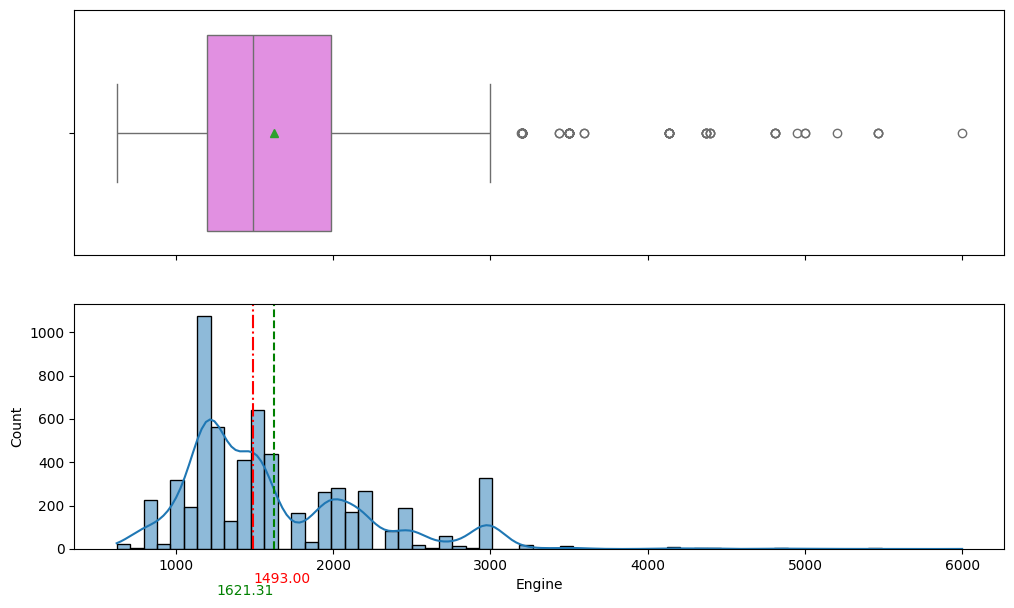

In [ ]:
# Plotting the distribution again after extreme outlier treatment
histogram_boxplot(data, 'Engine')

**Observations:** While the median was not affected by this change of extreme outlier, the mean was slighly increased from 1'621.28 to 1'621.31, which seems insignificant. However, the adjustment of the extreme outlier makes the distribution appear more typical for vehicle engine sizes. The range seems to fall within a more realistic scope, likely between around 800 cc to 6000 cc, which aligns better with common engine sizes for cars. The distribution is now a bit more centralized.

##### Power

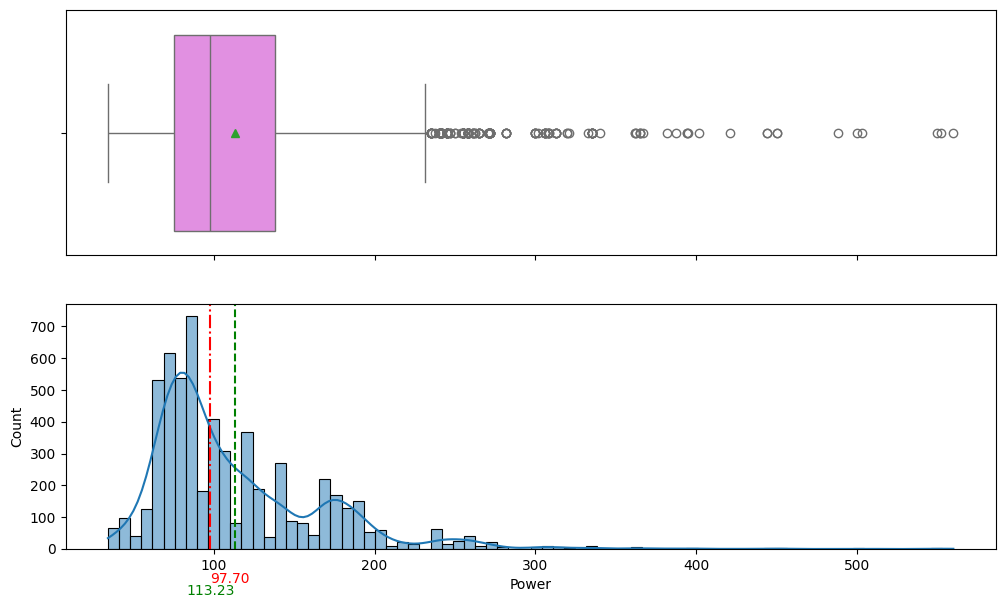

In [ ]:
# Plotting the distribution of Power
histogram_boxplot(data, 'Power')

**Observations:**
- Distribution is right-skweded indicating that most cars have lower engine power, while a few have significantly higher power. There are clear peaks in the distribution, all below 100, further highlighting that the majority of vehicles have a low to moderate engine power.
- The Boxplot shows that the there are many outliers above the upper whisker, indicating that the dataset contains cars with exceptionally high engine power, which leads to a right-skweded distribution.
- Further analyzing the outliers, there are clusters of them between 250-300, indicating the presence of extreme outliers above 300.  
- The mean (green line) of 113.25 is highly affected by these outliers and is thus larger than the median (red line) of 97.70.


Conclusion: A transformations needs to be done for this variable to bring it closer to a Gaussian distribution and imporve model performance. A closer look needs to be taken at the outliers to make sure that it is not a data entry error but a true value.

In [ ]:
# Filtering for maximum outliers for power column:
outliers_power_max = data[data['Power'] >= 300]
outliers_power_max

Name    Location  \
70                    Porsche Cayenne 2009-2014 Turbo      Mumbai   
134                          Mercedes-Benz SLC 43 AMG     Kolkata   
148                                    Audi RS5 Coupe      Mumbai   
152             Mercedes-Benz S Class 2005 2013 S 500     Kolkata   
326                      BMW 6 Series 640d Gran Coupe      Mumbai   
418                    Mercedes-Benz GLC 43 AMG Coupe  Coimbatore   
459                Audi Q7 4.2 TDI Quattro Technology  Coimbatore   
586                Audi Q7 4.2 TDI Quattro Technology       Kochi   
589           Mercedes-Benz S Class 2005 2013 S 350 L   Bangalore   
693                   Mercedes-Benz SLK-Class SLK 350  Coimbatore   
798                   Mercedes-Benz SLK-Class SLK 350   Bangalore   
1038             Land Rover Range Rover TDV8 (Diesel)   Bangalore   
1093               Audi Q7 4.2 TDI Quattro Technology   Bangalore   
1123                     BMW 7 Series 2007-2012 740Li        Pune   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel   Bangalore   
1741                                BMW X6 xDrive 40d   Hyderabad   
1930          Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai   
1974                               BMW 7 Series 740Li  Coimbatore   
1984                               BMW 7 Series 740Li   Bangalore   
2089                          BMW 6 Series 640d Coupe      Mumbai   
2095                         Mercedes-Benz SLC 43 AMG  Coimbatore   
2100                          Porsche Cayenne Turbo S      Mumbai   
2515                          BMW 6 Series Gran Coupe       Delhi   
2547                        BMW X6 xDrive 40d M Sport     Chennai   
2659                          Porsche Panamera Diesel     Kolkata   
2896                          Porsche Panamera Diesel       Delhi   
2907                         Jaguar XJ 3.0L Portfolio   Hyderabad   
2978                    Porsche Panamera 2010 2013 4S  Coimbatore   
3132                             Porsche Cayenne Base       Kochi   
3242         Land Rover Range Rover Vogue SE 4.4 SDV8   Bangalore   
3266             Mercedes-Benz E-Class E400 Cabriolet     Kolkata   
3341                     BMW 7 Series 2007-2012 750Li       Kochi   
3489                          Porsche Panamera Diesel   Bangalore   
4061                                   Audi RS5 Coupe      Mumbai   
4185                          Porsche Panamera Diesel       Kochi   
4342          Mercedes-Benz S Class 2005 2013 S 350 L      Mumbai   
4360                          BMW 6 Series Gran Coupe       Kochi   
4388               Audi Q7 4.2 TDI Quattro Technology   Bangalore   
4451                                  Ford Mustang V8       Kochi   
4559               Audi Q7 4.2 TDI Quattro Technology       Delhi   
4627                          BMW 6 Series 650i Coupe       Kochi   
4691                   Mercedes-Benz SLK-Class 55 AMG   Bangalore   
4722                    Mercedes-Benz SL-Class SL 500     Kolkata   
4816                BMW 5 Series 2003-2012 540i Sedan       Delhi   
4821                          BMW 6 Series 630i Coupe      Mumbai   
4869         Land Rover Range Rover 3.6 TDV8 Vogue SE  Coimbatore   
4893                   BMW Z4 2009-2013 Roadster 2.5i       Kochi   
4938               Audi Q7 4.2 TDI Quattro Technology  Coimbatore   
5088                  Jaguar XJ 5.0 L V8 Supercharged  Coimbatore   
5294                             BMW Z4 2009-2013 35i       Delhi   
5341                         Porsche Cayenne S Diesel  Coimbatore   
5416         Land Rover Range Rover Vogue SE 4.4 SDV8  Coimbatore   
5521                  Bentley Continental Flying Spur   Hyderabad   
5535                        BMW X6 xDrive 40d M Sport   Ahmedabad   
5603                Porsche Panamera 2010 2013 Diesel       Delhi   
5775                          BMW 6 Series Gran Coupe      Mumbai   
5781                       Lamborghini Gallardo Coupe       Delhi   
5919                           Jaguar F Type 5.

**Observations:** Filtering all vehicles with Power greater than 300, it can be seen that these vehicles fall into the catagory of luxury or sports cars. This is a similar pattern to the Engine outliers described earlier, where again the Brands Bently, Lamborghini, Mercedes-Benz, Porsche, BMW and Audi and Land Rover, have the highest Engine values.


In [ ]:
# Filtering for minimum2 outliers for power column:
outliers_power_min = data[data['Power'] <= 50]
outliers_power_min

Name    Location  Kilometers_Driven Fuel_Type  \
40                  Maruti Alto LXi       Delhi              90000    Petrol   
41                  Tata Nano LX SE       Kochi              19698    Petrol   
105           Maruti Omni 5 Str STD  Coimbatore              93850    Petrol   
112              Tata Nano Twist XT   Bangalore              25500    Petrol   
124                   Tata Nano XTA  Coimbatore              32684    Petrol   
...                             ...         ...                ...       ...   
5710        Maruti Alto 800 CNG LXI      Mumbai              26200       CNG   
5712                Maruti Alto LXi     Kolkata              18700    Petrol   
5892                Maruti Alto Std   Hyderabad              81500    Petrol   
5926             Maruti 800 DX BSII        Pune              78000    Petrol   
5932  Maruti Alto 800 2016-2019 LXI     Chennai               5700    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
40         Manual     Second    19.70   796.0  46.30    5.0   1.25       15  
41         Manual      First    25.40   624.0  37.50    4.0   1.53        9  
105        Manual      First    14.00   796.0  35.00    5.0   2.41       13  
112        Manual      First    25.40   624.0  37.50    4.0   2.15        9  
124     Automatic      First    21.90   624.0  37.48    4.0   3.23        6  
...           ...        ...      ...     ...    ...    ...    ...      ...  
5710       Manual      First    30.46   796.0  47.30    5.0   2.15       10  
5712       Manual     Second    19.70   796.0  46.30    5.0   1.25       16  
5892       Manual     Second    19.70   796.0  46.30    5.0   1.30       19  
5926       Manual      First    16.10   796.0  37.00    4.0   0.55       23  
5932       Manual      First    24.70   796.0  47.30    5.0   2.80        7  

[162 rows x 12 columns]

In [ ]:
# Grouping low power values by brand for easier visualization
grouped_power_outlier = outliers_power_min.groupby('Name').size()
grouped_power_outlier

Name
Ambassador Classic Nova Diesel                 1
Mahindra E Verito D4                           1
Maruti 800 AC                                  3
Maruti 800 AC BSIII                            1
Maruti 800 AC Uniq                             1
Maruti 800 DX BSII                             2
Maruti 800 Std                                 2
Maruti 800 Std BSIII                           3
Maruti Alto 800 2016-2019 CNG LXI              4
Maruti Alto 800 2016-2019 LXI                 11
Maruti Alto 800 2016-2019 LXI Optional         2
Maruti Alto 800 2016-2019 VXI                  6
Maruti Alto 800 CNG LXI                        1
Maruti Alto 800 LXI                           20
Maruti Alto 800 LXI Airbag                     1
Maruti Alto 800 VXI                            7
Maruti Alto Green LXi (CNG)                    2
Maruti Alto LX                                 3
Maruti Alto LX BSIII                           1
Maruti Alto LXI                                1
Maruti Alto LXi

**Observations:** We can observe that most all vehicles with Power values of less than or euqal to 50 are either of the **Brand Maruti or Tata**. The exception being:

- Ambassador Vehicle
- Mahindra E Verito D4 (electric vehicle already found as outlier)

##### Car Age

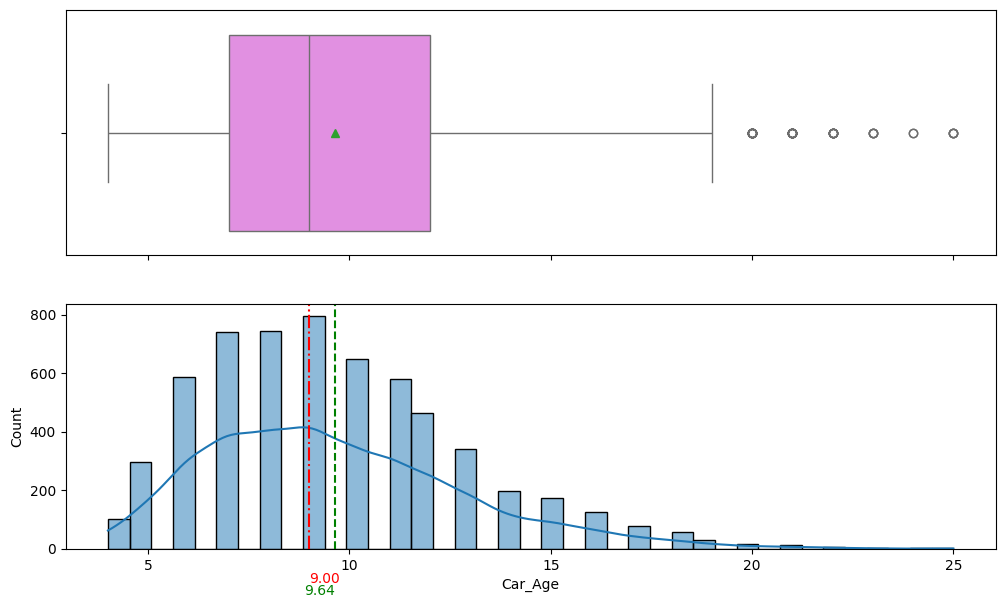

In [ ]:
# Plotting the distribution of Power
histogram_boxplot(data, 'Car_Age')

**Observations:**
- Distribution is right-skweded indicating that most cars are withing a similar age group. The majority of the car's ages are clustered around 7 - 11 years, further supported by the mean (green line) of 9.64 and the median (red line) of 9.00,  being close together. Thus the dataset has more cars of younger car age than older cars.
- The Boxplot shows that the majority of datapoints are captured within the whiskers. Only a few outliers appear above the upper whisker, indicating the presence of some significantly older car models. It can be roughly estimated that these models are older than 20 years.

Conclusion: A transformations needs to be done for this variable to bring it closer to a Gaussian distribution and imporve model performance. A closer look needs to be taken at the outliers to make sure that it is not a data entry error but a true value.

In [ ]:
# Reviewing Outliers for Car Age above 20 years
outliers_age_max = data[data['Car_Age'] >= 20]
outliers_age_max

Name   Location  Kilometers_Driven  \
274                    Maruti Zen VXI BSII     Mumbai              60000   
315                        Tata Sumo Delux  Hyderabad             158000   
364                          Maruti Zen LX    Kolkata              65000   
613              Mahindra Bolero ZLX BSIII    Kolkata             124000   
631              Hyundai Santro LS zipPlus    Chennai              70000   
911                    Maruti Zen VXI BSII      Kochi              61495   
1221        Ambassador Classic Nova Diesel    Chennai              80000   
1224                         Maruti Zen VX     Jaipur              70000   
1318                    Honda City 1.3 EXI  Ahmedabad              85000   
1845                    Honda City 1.3 EXI       Pune             140000   
1903      Skoda Octavia Classic 1.9 TDI MT    Kolkata              69000   
1907                   Toyota Qualis FS B3  Bangalore              63000   
1999         Mercedes-Benz E-Class 220 CDI       Pune             121000   
2487                     Toyota Corolla DX    Chennai              70000   
2524              Maruti Wagon R VXI BSIII    Chennai             101000   
2554     Skoda Octavia Ambiente 1.9 TDI MT  Hyderabad              99000   
2656                    Maruti Wagon R VXI       Pune              93000   
2737                     Maruti Wagon R Vx     Jaipur             200000   
3138                        Maruti Zen LXI     Jaipur              95150   
3189  Hyundai Santro GS zipDrive - Euro II    Chennai              67000   
3221                   Ford Ikon 1.3 Flair    Chennai              65134   
3228                        Maruti 800 Std       Pune              52000   
3749     Mercedes-Benz E-Class 250 D W 210     Mumbai              55300   
3806                    Honda City 1.5 EXI       Pune             125943   
3854                   Hyundai Sonata GOLD    Chennai              44200   
3942                  Maruti 800 Std BSIII     Jaipur              53500   
3963            Mitsubishi Lancer 1.5 SFXi    Chennai             104000   
4143          Mercedes-Benz S-Class 280 AT    Chennai             111000   
4152          Land Rover Range Rover 3.0 D     Mumbai              75000   
4351                 Maruti Esteem LX BSII     Jaipur              55000   
4629                    Fiat Siena 1.2 ELX     Jaipur              70000   
4658                  Maruti Alto LXi BSII       Pune              69966   
4709                        Maruti 1000 AC  Hyderabad             104000   
4712                Hyundai Santro Xing XG       Pune              80000   
4730                    Ford Ikon 1.6 CLXI       Pune              83000   
4791                Mitsubishi Lancer GLXD    Chennai             125000   
4822                   Maruti Alto Vxi 1.1    Chennai             103653   
4863                 Hyundai Santro D Lite    Chennai             140000   
5040                Maruti Versa DX2 BS II     Mumbai              62000   
5137               Maruti Zen VXi - BS III     Jaipur              90000   
5270                    Honda City 1.5 GXI  Bangalore              53000   
5432                         Maruti Zen LX    Chennai              99024   
5453                    Hyundai Accent GLE       Pune             130000   
5643                     Maruti Wagon R LX       Pune             125000   
5647                Toyota Qualis Fleet A3     Mumbai             227000   
5657                        Maruti 800 Std     Jaipur              75000   
5716                         Maruti Zen LX     Jaipur              95150   
5914        Skoda Octavia Elegance 1.9 TDI  Hyderabad             132000   
5926                    Maruti 800 DX BSII       Pune              78000   
5943               Mahindra Jeep MM 540 DP    Chennai              75000   

     Fuel_Type Transmission      Owner_Type  Mileage  Engine  Power  Seats  \
274     Petrol       Manual           Third    17.30   993.0   60.0    5.0   
315  

In [ ]:
# Group by 'Owner_Type' and apply aggregation functions for Pirce and Kilometers driven
owner_type_stats = outliers_age_max.groupby('Car_Age').agg({
    'Price': ['max', 'min', 'mean', 'median', 'count'],
    'Kilometers_Driven': ['max', 'min', 'mean', 'median']
})

# Display the aggregated statistics
print(owner_type_stats)


         Price                             Kilometers_Driven         \
           max   min     mean median count               max    min   
Car_Age                                                               
20       16.11  0.50  2.44000  1.250    17            132000  44200   
21        3.65  0.51  1.29400  1.200    15            103653  53000   
22        5.00  0.55  1.54375  0.875     8            227000  70000   
23        1.95  0.55  1.17500  1.100     4            158000  78000   
24        0.90  0.77  0.83500  0.835     2            140000  70000   
25        3.90  0.45  1.43250  0.690     4            104000  55300   

                                  
                  mean    median  
Car_Age                           
20        81862.411765   75000.0  
21        75354.066667   70000.0  
22       139742.875000  127971.5  
23       112500.000000  107000.0  
24       105000.000000  105000.0  
25        87400.000000   95150.0  


**Observations:**
Car Age above / equal to 20 years:

- 17 cars with Car Age 20
- 15 cars with Car Age 21
- 8 cars with Car Age 22
- 4 cars with Car Age 23
- 2 cars with Car Age 22
- 4 cars with Car Age 25

Clearly indicating that the older the vehicles get, the less frequent they become, with a clear drop at car age 22.

Counterintuitively, the kilometers driven also have a wide range between the min and maximum value, indicating that there are a lot of cars that have low km driven, despite their old age. One would assume that the relationship between age and km driven is more linear.  

Another interesting oberservation is the price related to these older models. There are large descrepancies with the min and maximum values for Cars with an age of 20, 21, 22, and 25 years. Since the price is our target variable, it's good to get a better understanding of why these older cars are still relatively high priced.


In [ ]:
outliers_age_max_high_price = outliers_age_max.sort_values(by='Price', ascending=False)
outliers_age_max_high_price.head(6)

Name   Location  Kilometers_Driven  \
4152       Land Rover Range Rover 3.0 D     Mumbai              75000   
4143       Mercedes-Benz S-Class 280 AT    Chennai             111000   
1999      Mercedes-Benz E-Class 220 CDI       Pune             121000   
3749  Mercedes-Benz E-Class 250 D W 210     Mumbai              55300   
1907                Toyota Qualis FS B3  Bangalore              63000   
4791             Mitsubishi Lancer GLXD    Chennai             125000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  \
4152    Diesel    Automatic     Second      NaN     NaN    NaN    NaN  16.11   
4143    Petrol    Automatic      First     13.0  2987.0  210.0    5.0   6.50   
1999    Diesel       Manual      First     15.0  2148.0    NaN    5.0   5.00   
3749    Diesel    Automatic      First     10.0  1796.0  157.7    5.0   3.90   
1907    Diesel       Manual      Third     13.1  2446.0   75.0   10.0   3.65   
4791    Diesel       Manual      Third     14.8  1998.0   68.0    5.0   3.00   

      Car_Age  
4152       20  
4143       20  
1999       22  
3749       25  
1907       21  
4791       20

**Observations:** Closely inspecting the above rows, most cars with years greater or equal to 20 at prices higher than average for those years are luxury car models such as Land Rover and Mercedez-Benz. Another interesting observation is that Toyota Qualis FS B3	(index 1907) would not be considered a luxury car, yet it's seats are double the average with 10 seats and km driven are well below the average with 63'000km. However Mitsubishi Lancer GLXD	is neither expectionally high in car seats, nor low in km driven. Perhaps the higehr price may be due popularity or another factor.

#### In depth univariate analysis of catagorical features

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

##### Name of Car

There are too many unique values of Car Names to plot them in a single barplot. This leads to the conclusion, that grouping the car's by their brand name rather than brand name + model may be more beneficial.

In [ ]:
# Extracting count of unique values for Names of vehicles in Dataset
data['Name'].nunique()

1876

In [ ]:
# Inspecting this column further
data['Name']

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 6018, dtype: object

**Observations:** It can be seen that the Brand Name (ex. Maruti, Hyundai, Audi, Chevrolet) are all seperated from the Model name by a space. Therefore the Brand and Model of the Car can be stored by dividing them after the first space.

In [ ]:
# Creating a new column for Brand name of the cars, splitting it by the first space (' ') and indicating that the first value of the list is to be stored with str.[0]
data['Brand']=data['Name'].str.split(' ').str[0]
data['Brand'].nunique()

31

**Observations:** Now there are 31 car brands in our dataset, which can be visualized using the labeled barplot.

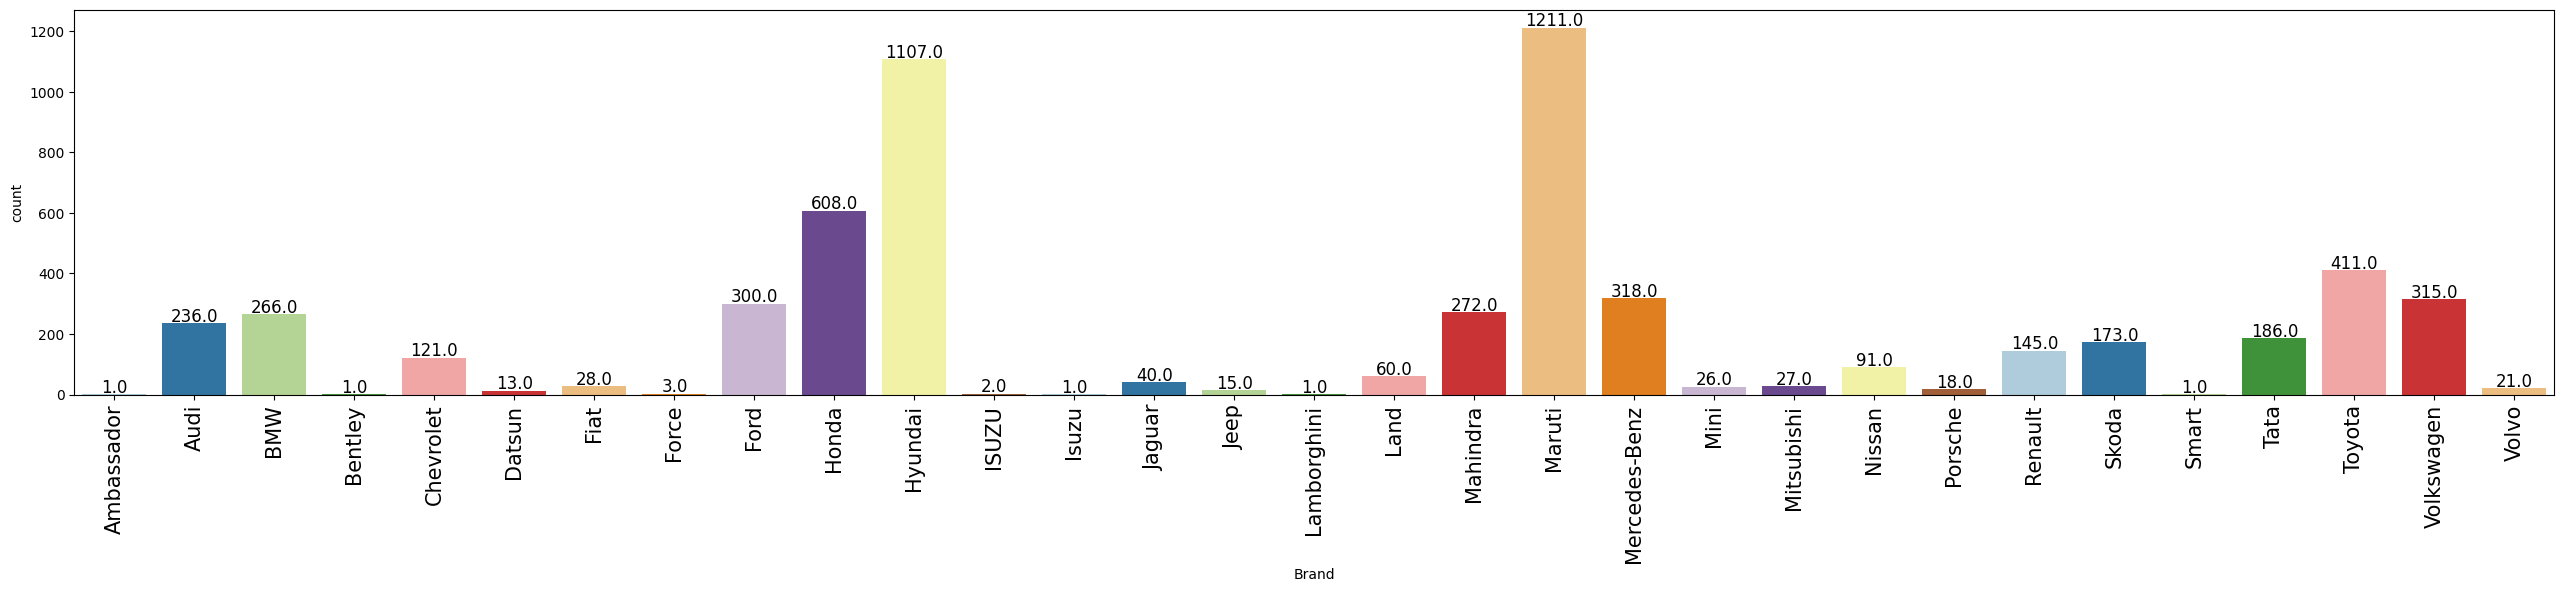

In [ ]:
# Plotting the labeled barplot for Brand names
labeled_barplot(data, 'Brand')

**Observations:**

* The most sold Brands are:

1. Maruti
2. Hyundai
3. Honda
4. Toyota
5. Volkswagen and Ford (only differ by 15 vehicles)

This information is especially vital to help stock up on the most popular brands, to avoid inventory being stagnant and losing value.  

Additionally there seems to be a pattern in luxury vs more economical brands, since Bently, Lamborghini, Jeep, Mini and Prosche have fewer vehicle counts, while the most sold brands listed above all have economical cars available as well.

The relationship with price and brands needs to be closly examined during Bivariate analysis. It would be beneficial for the model to drop extreme outliers with value count less than 3:
- Ambassador
- Bently
- Force
- Isuzu
- Lamborghini
- Smart

**Note: There are two Brans for Isuzu, one in all capitalized letters. However since these vehciles are of the same Brand, we want to replace ISUZU with Isuzu**

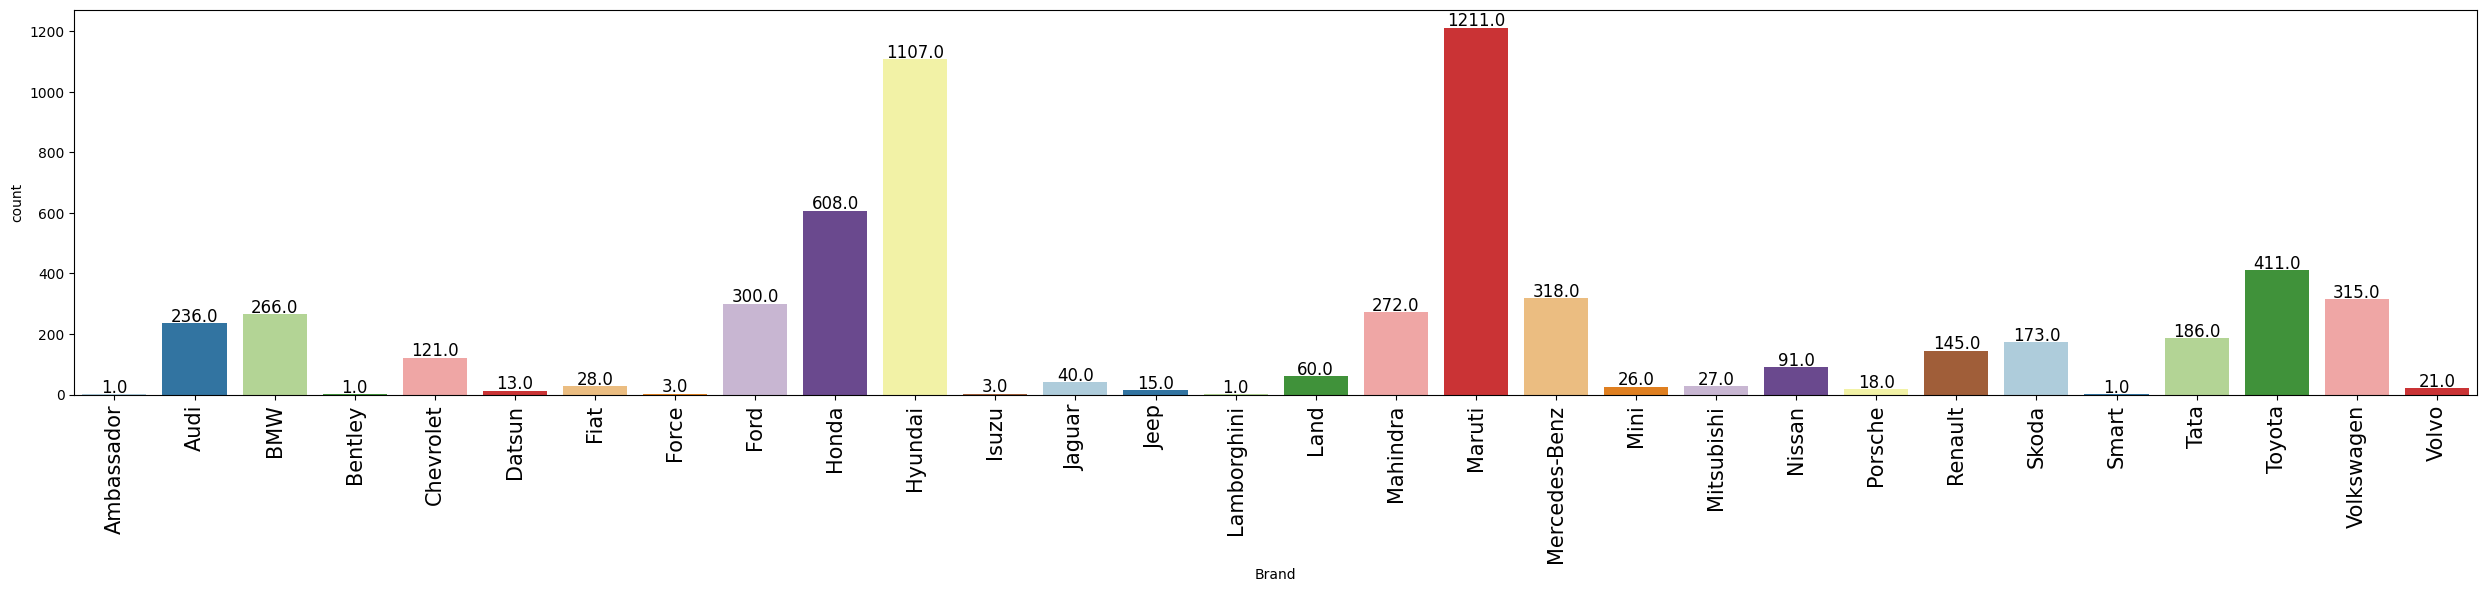

In [ ]:
# Replacing ISUZU with Isuzu to form one Brand Name
data['Brand'] = data['Brand'].replace('ISUZU', 'Isuzu')

# Visualizing Barplot again
labeled_barplot(data, 'Brand')

**Observations:** In total there are 30 Brands present in the dataset

##### Location

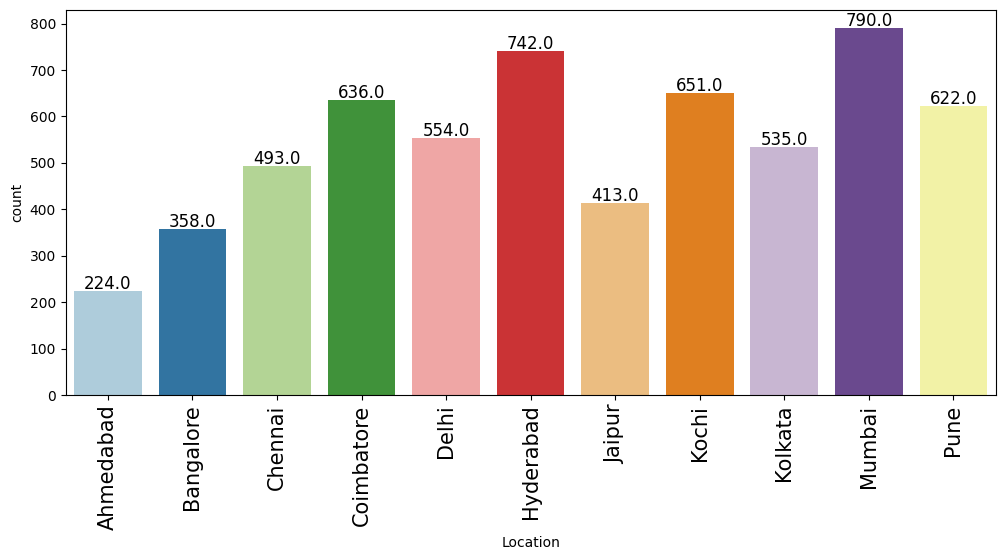

In [ ]:
# Plotting the labeled barplot for Locations
labeled_barplot(data, 'Location')

**Observations:** Mumbai and Hyderabad stand out as locations with the highest number of used car listings (above 700). Ahamedabad is the lowest value with only 224 vehicles. This could suggest a higher demand and supply for used cars in these metropolitan areas, possibly due to larger populations and higher economic activity.

During the Bivariate Analysis it would be of interest to see if particular brands are more popular in particular regions, to further optimize inventory. Also the correlation between price and location should be considered, as higehr demand, may lead to more competition and can either decrease or increase the price.

##### Transmission

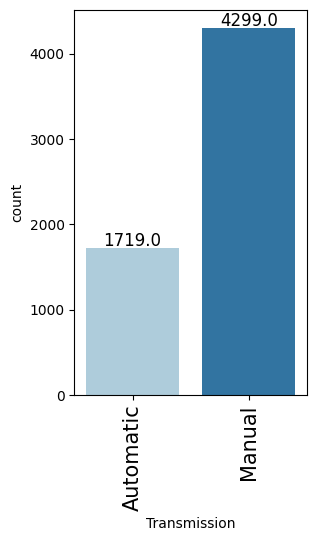

In [ ]:
# Plotting the labeled barplot for Transmission
labeled_barplot(data, 'Transmission')

**Observations:** There is a clear preferance of manual transmission in vehicles. Since manual transmission is more economical than automatic transmission, this variable needs to be further examined with Car Age and Price during Bivariate Analysis.

##### Owner Type

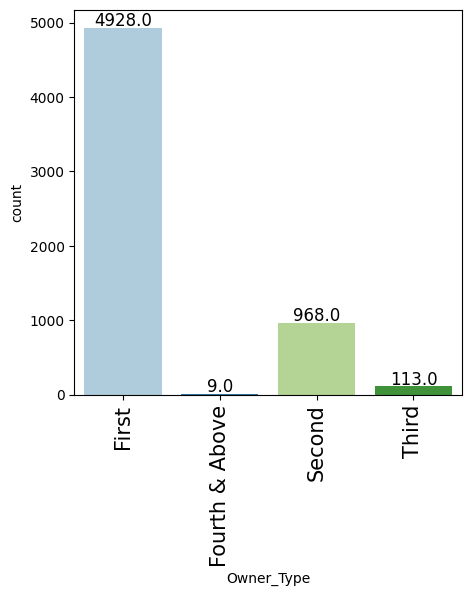

In [ ]:
# Plotting the labeled barplot for Owner Type
labeled_barplot(data, 'Owner_Type')

**Observations:** There is a clear tendency of most vehiles only having one previous owner. This is probably due to other factors affecting multiple owners such as km driven and potential mechenical issues.

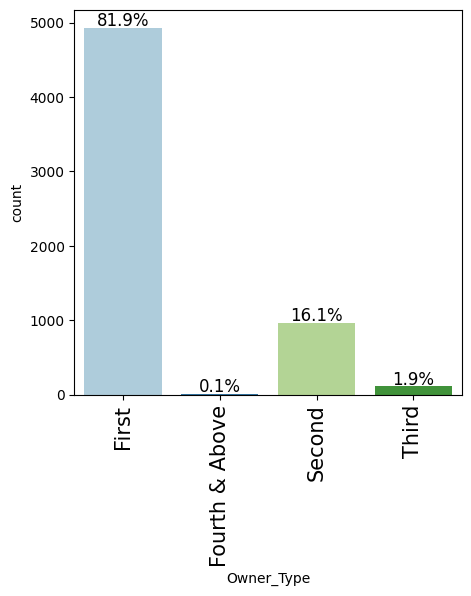

In [ ]:
# Plotting the labeled barplot for Owner Type with percentage
labeled_barplot(data, 'Owner_Type', perc=True)

In [ ]:
# Filtering for vehciles with 4 or more owners
Four_Owners = data[data['Owner_Type'] == 'Fourth & Above']
Four_Owners .head(9)

Name    Location  Kilometers_Driven  \
29       Toyota Innova 2.5 V Diesel 7-seater      Mumbai             262000   
885                   Maruti Grand Vitara AT     Chennai              77000   
1081           Hyundai i20 1.2 Sportz Option   Bangalore              61000   
1699  Ford Endeavour 4x2 XLT Limited Edition        Pune              90000   
2988    Toyota Innova 2.5 G4 Diesel 8-seater     Chennai             240000   
3368                  Maruti Swift Ldi BSIII        Pune              80000   
3404                    Maruti Swift 1.3 VXi      Jaipur             125000   
4148                     Ford Ikon 1.3 Flair  Coimbatore              59833   
5647                  Toyota Qualis Fleet A3      Mumbai             227000   

     Fuel_Type Transmission      Owner_Type  Mileage  Engine  Power  Seats  \
29      Diesel       Manual  Fourth & Above     12.8  2494.0  102.0    7.0   
885     Petrol    Automatic  Fourth & Above      9.7  1995.0  163.5    5.0   
1081    Petrol       Manual  Fourth & Above     17.0  1197.0   80.0    5.0   
1699    Diesel       Manual  Fourth & Above     10.9  2499.0  143.0    7.0   
2988    Diesel       Manual  Fourth & Above     12.8  2494.0  102.0    8.0   
3368    Diesel       Manual  Fourth & Above     17.8  1248.0   75.0    5.0   
3404    Petrol       Manual  Fourth & Above     16.1     NaN    NaN    NaN   
4148    Petrol       Manual  Fourth & Above     13.8  1299.0   70.0    5.0   
5647    Diesel       Manual  Fourth & Above      NaN  2446.0    NaN    8.0   

      Price  Car_Age    Brand  
29     4.00       16   Toyota  
885    5.50       15   Maruti  
1081   3.25       13  Hyundai  
1699   3.00       16     Ford  
2988   5.10       18   Toyota  
3368   2.15       14   Maruti  
3404   2.35       17   Maruti  
4148   1.97       15     Ford  
5647   2.20       22   Toyota

**Observations:** Regarding the percentage of vehicles with four or more owners, only 0.1% vehicles fall into this catagory. All Toyota Models have a high value for km driven with over 227'000 - 262'000 km. However many models also have fewer km driven which may seem unexpected given that these vehciles have had multiple owners and are on average above 16 years old.

##### Seats

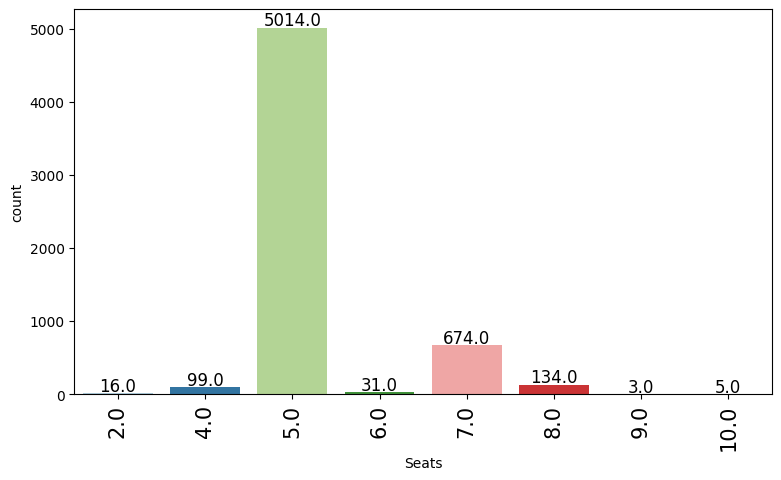

In [ ]:
# Plotting the labeled barplot for Seats
labeled_barplot(data, 'Seats')

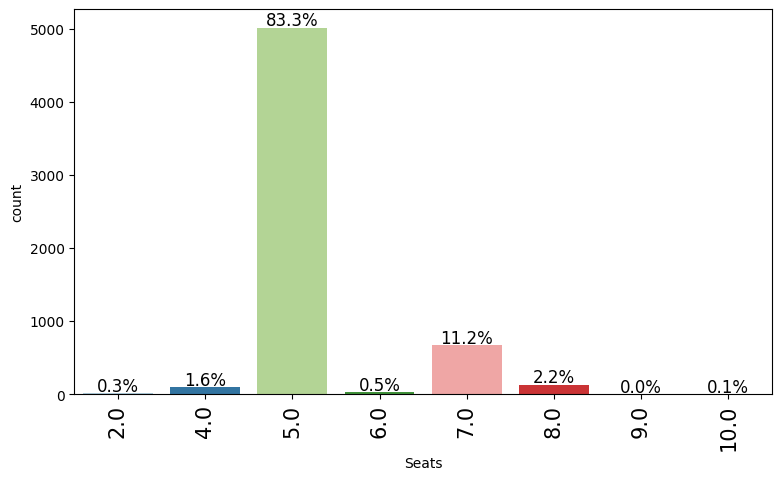

In [ ]:
# Plotting the labeled barplot for Seats in percentage
labeled_barplot(data, 'Seats', perc=True)

**Observations:** There is a clear spike in car's with 5 seats being the most popular. While there are also some vehicles with 7 seats, this indicates that most vehicles purchased may be for families. Since a 2 seat vehicle, like sports cars or a 10 seat vehicle like Transportation Vans are of the least common ones, indicating less use or niche targets. Outliers in this feature include:
- 9 seat vehciles 0.0% (3 vehicles in dataset)
- 10 seat vehicles 0.1% (5 vehicles in dataset)
- 2 seat vehicles 0.3% (16 vehicles in dataset)
- 6 seat vehciles 0.5% (31 vehicles in dataset)

Taking a closer look at these outliers

In [ ]:
# Filtering all rows that have 9 seats
Nine_Seats = data[data['Seats'] == 9]
Nine_Seats.head()

Name   Location  Kilometers_Driven Fuel_Type  \
1347        Mahindra Scorpio LX BS IV  Bangalore              74112    Diesel   
2312  Chevrolet Tavera LT 9 Str BS IV    Kolkata              67132    Diesel   
2359            Mahindra Xylo D2 Maxx    Chennai             150000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  \
1347       Manual      First    12.05  2179.0  120.0    9.0   4.10       16   
2312       Manual      First    13.58  2499.0   78.0    9.0   4.75       11   
2359       Manual      First    14.95  2489.0   93.7    9.0   4.50        7   

          Brand  
1347   Mahindra  
2312  Chevrolet  
2359   Mahindra

In [ ]:
# Filtering all rows that have 10 seats
Ten_Seats = data[data['Seats'] == 10]
Ten_Seats.head()

Name   Location  Kilometers_Driven  \
814                     Toyota Qualis FS B2       Pune              77757   
917                            Tata Sumo DX     Mumbai              20000   
1907                    Toyota Qualis FS B3  Bangalore              63000   
2267                    Toyota Qualis RS E2       Pune             215750   
2575  Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad             120000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  \
814     Diesel       Manual     Second    13.10  2446.0   75.0   10.0   3.50   
917     Diesel       Manual      First    14.07  1978.0   83.1   10.0   5.25   
1907    Diesel       Manual      Third    13.10  2446.0   75.0   10.0   3.65   
2267    Diesel       Manual     Second      NaN  2446.0    NaN   10.0   3.50   
2575    Diesel       Manual      First    14.80  2499.0   80.0   10.0   5.50   

      Car_Age      Brand  
814        19     Toyota  
917        10       Tata  
1907       21     Toyota  
2267       19     Toyota  
2575        8  Chevrolet

In [ ]:
# Filtering all rows that have 2 seats
Two_Seats = data[data['Seats'] == 2]
Two_Seats

Name    Location  Kilometers_Driven  \
134               Mercedes-Benz SLC 43 AMG     Kolkata              13372   
557                       Audi TT 2.0 TFSI       Delhi              12100   
693        Mercedes-Benz SLK-Class SLK 350  Coimbatore              22732   
798        Mercedes-Benz SLK-Class SLK 350   Bangalore              10000   
915                    Smart Fortwo CDI AT        Pune             103000   
926             Porsche Cayman 2009-2012 S   Hyderabad              10000   
1078           Porsche Boxster S tiptronic     Kolkata              10512   
1288                      Audi TT 2.0 TFSI       Kochi              14262   
2095              Mercedes-Benz SLC 43 AMG  Coimbatore               2526   
2305  Porsche Cayman 2009-2012 S tiptronic      Mumbai               8000   
4691        Mercedes-Benz SLK-Class 55 AMG   Bangalore               3000   
4722         Mercedes-Benz SL-Class SL 500     Kolkata              35000   
4893        BMW Z4 2009-2013 Roadster 2.5i       Kochi               9952   
5294                  BMW Z4 2009-2013 35i       Delhi              25000   
5781            Lamborghini Gallardo Coupe       Delhi               6500   
5919                Jaguar F Type 5.0 V8 S   Hyderabad               8000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
134     Petrol    Automatic      First    19.00  2996.0  362.07    2.0   
557     Petrol    Automatic      First     9.90  1984.0  207.80    2.0   
693     Petrol    Automatic      First    18.10  3498.0  306.00    2.0   
798     Petrol    Automatic      First    18.10  3498.0  306.00    2.0   
915     Diesel    Automatic     Second      NaN   799.0     NaN    2.0   
926     Petrol       Manual      First     9.00  3436.0     NaN    2.0   
1078    Petrol    Automatic      First     8.60  2706.0  265.00    2.0   
1288    Petrol    Automatic      First     9.90  1984.0  207.80    2.0   
2095    Petrol    Automatic      First    19.00  2996.0  362.07    2.0   
2305    Petrol    Automatic      First     9.00  3436.0     NaN    2.0   
4691    Petrol    Automatic     Second    12.00  5461.0  421.00    2.0   
4722    Petrol    Automatic      First     8.10  5461.0  387.30    2.0   
4893    Petrol    Automatic      First    10.37  2979.0  306.00    2.0   
5294    Petrol    Automatic      First    10.37  2979.0  306.00    2.0   
5781    Petrol    Automatic      Third     6.40  5204.0  560.00    2.0   
5919    Petrol    Automatic      First    12.50  5000.0  488.10    2.0   

       Price  Car_Age          Brand  
134    54.00        6  Mercedes-Benz  
557    29.50       10           Audi  
693    55.54        7  Mercedes-Benz  
798    55.00        8  Mercedes-Benz  
915     3.00       15          Smart  
926    40.00       13        Porsche  
1078   64.00        8        Porsche  
1288   27.35        9           Audi  
2095   83.96        4  Mercedes-Benz  
2305   43.00       12        Porsche  
4691   90.00        9  Mercedes-Benz  
4722   29.50       13  Mercedes-Benz  
4893   58.54        5            BMW  
5294   30.00       12            BMW  
5781  120.00       12    Lamborghini  
5919  100.00        8         Jaguar

**Observation:** 2 Seat vehicles are exclusivily associated with Luxury Brands:

- Mercedes-Benz
- Audi
- BMW
- Porsche
- Smart
- Lamborghini
- Jaguar

and have a very high values for Power, indicating that these are luxury sports car models.

In [ ]:
# Filtering all rows that have 6 seats
Six_Seats = data[data['Seats'] == 6]
Six_Seats

Name    Location  \
42     Mahindra KUV 100 mFALCON D75 K8 Dual Tone  Coimbatore   
49                         Mahindra Thar CRDe AC      Jaipur   
597     Mitsubishi Pajero 2.8 SFX BSIV Dual Tone      Mumbai   
951              Mahindra KUV 100 mFALCON D75 K6       Kochi   
1542                          Mahindra Thar CRDe      Jaipur   
1909   Mitsubishi Pajero 2.8 SFX BSIII Dual Tone       Kochi   
2053                     Mahindra Jeep MM 550 PE   Hyderabad   
2103             Mahindra KUV 100 mFALCON D75 K4      Mumbai   
2306  Land Rover Range Rover Sport 2005 2012 HSE   Hyderabad   
2560            Mitsubishi Pajero 2.8 GLX Sports   Hyderabad   
2696             Mahindra KUV 100 mFALCON G80 K2  Coimbatore   
2793                   Mitsubishi Pajero 2.8 SFX       Kochi   
3365               Mitsubishi Pajero 2.8 GLX CRZ   Hyderabad   
3433               Mitsubishi Pajero 2.8 GLX CRZ      Mumbai   
3503             Mahindra KUV 100 mFALCON G80 K2   Hyderabad   
3507                   Mitsubishi Pajero 4X4 LHD   Bangalore   
3513        Mahindra KUV 100 mFALCON G80 K6 Plus     Chennai   
3569                     Mahindra KUV 100 G80 K8      Jaipur   
4108              Mitsubishi Pajero Sport 4X4 AT  Coimbatore   
4120              Mitsubishi Pajero Sport 4X4 AT   Bangalore   
4200        Mahindra KUV 100 mFALCON D75 K4 Plus       Kochi   
4329             Mahindra KUV 100 mFALCON D75 K8   Hyderabad   
4458                   Mitsubishi Pajero 2.8 SFX       Delhi   
4569                   Mitsubishi Pajero 2.8 SFX     Chennai   
4811                          Mahindra Thar CRDe  Coimbatore   
5519              Mitsubishi Pajero Sport 4X4 AT        Pune   
5553              Mitsubishi Pajero 2.8 SFX 7Str        Pune   
5736           Mahindra KUV 100 G80 K8 Dual Tone       Delhi   
5807             Mahindra KUV 100 mFALCON G80 K8       Kochi   
5860                       Mahindra Thar CRDe AC  Coimbatore   
5943                     Mahindra Jeep MM 540 DP     Chennai   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
42                22033    Diesel       Manual      First    25.32  1198.0   
49                75800    Diesel       Manual     Second    16.55  2498.0   
597               93000    Diesel       Manual      Third    10.50  2835.0   
951               39528    Diesel       Manual      First    25.32  1198.0   
1542              19000    Diesel       Manual      First    16.55  2498.0   
1909              48272    Diesel       Manual      First    10.50  2835.0   
2053              26000    Diesel       Manual      First      NaN  2498.0   
2103              34079    Diesel       Manual      First    25.32  1198.0   
2306              45000    Diesel    Automatic      First    14.70  2993.0   
2560              85000    Diesel       Manual      First     9.50  2835.0   
2696              24806    Petrol       Manual      First    18.15  1198.0   
2793              48986    Diesel       Manual      First    10.50  2835.0   
3365              78000    Diesel       Manual     Second    10.50  2835.0   
3433             129000    Diesel       Manual      First    10.50  2835.0   
3503              24025    Petrol       Manual      First    18.15  1198.0   
3507             155566    Diesel       Manual     Second     9.50  2835.0   
3513              13500    Petrol       Manual      First    18.15  1198.0   
3569              15900    Petrol       Manual      First    18.15  1198.0   
4108              11827    Diesel    Automatic      First    13.50  2477.0   
4120               8900    Diesel    Automatic      First    13.50  2477.0   
4200              60357    Diesel       Manual      First    25.32  1198.0   
4329              26000    Diesel       Manual      First    25.32  1198.0   
4458              45999    Diesel       Manual      First    10.50  2835.0   
4569             160000    Diesel       Manual      First    10.50  2835.0   
4811              28599    Diesel       Manua

In [ ]:
#Grouping 6 seat cars by Brand for easier understanding
Six_Seats_grouped = Six_Seats.groupby('Brand').count()
Six_Seats_grouped

Name  Location  Kilometers_Driven  Fuel_Type  Transmission  \
Brand                                                                    
Land           1         1                  1          1             1   
Mahindra      17        17                 17         17            17   
Mitsubishi    13        13                 13         13            13   

            Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
Brand                                                                  
Land                 1        1       1      1      1      1        1  
Mahindra            17       15      17     15     17     17       17  
Mitsubishi          13       13      13     13     13     13       13

**Observations:** 6 Seaters are almost exclusive to Mahindra (17 cars) and Mitsubishi (13 cars) with the exception of one Land Rover car having 6 seats as well.

##### Fuel Type

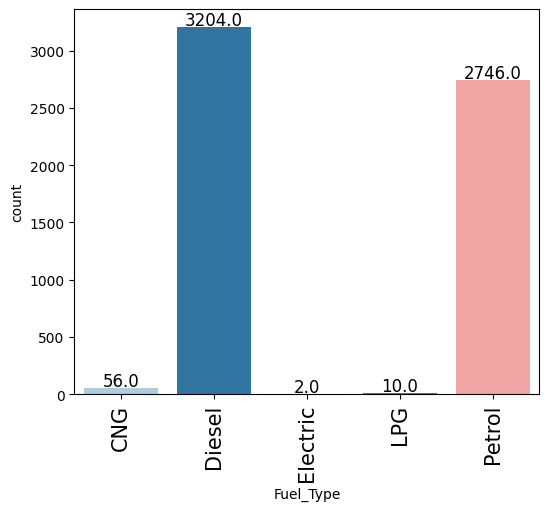

In [ ]:
# Plotting the labeled barplot for Fuel Type
labeled_barplot(data, 'Fuel_Type')

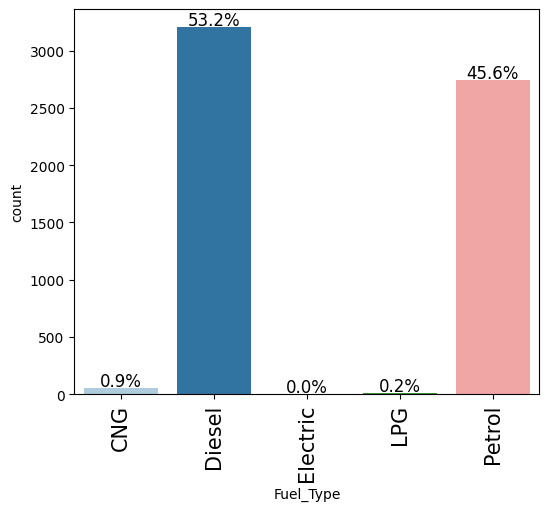

In [ ]:
# Plotting the labeled barplot for Fuel Type in percentage
labeled_barplot(data, 'Fuel_Type', perc=True)

**Observations**

The overwhelming mayority of Cars use either Diesel or Petrol. Cars using these Fuel Types are considered outliers:

- Electric: 0.0% (2 cars in dataset)
- LPG: 0.2% (10 cars in dataset)
- CNG: 0.9% (56 cars in dataset)



In [ ]:
# Filtering for Electric Cars
Electric_Fuel = data[data['Fuel_Type'] == 'Electric']
Electric_Fuel.head()

Name Location  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai              50000  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai              44000  Electric   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  \
4446    Automatic      First      NaN     NaN   41.0    5.0  13.00        7   
4904    Automatic      First      NaN  1798.0   73.0    5.0  12.75       12   

         Brand  
4446  Mahindra  
4904    Toyota

In [ ]:
# Filtering for Cars using LPG Fuel
LPG_Fuel = data[data['Fuel_Type'] == 'LPG']
LPG_Fuel.head(10)

Name   Location  Kilometers_Driven Fuel_Type  \
5     Hyundai EON LPG Era Plus Option  Hyderabad              75000       LPG   
936       Maruti Wagon R LXI LPG BSIV  Hyderabad              72000       LPG   
987      Maruti Wagon R LXI DUO BSIII     Mumbai              64226       LPG   
2278      Hyundai Santro Xing GLS LPG       Pune              55000       LPG   
2385      Hyundai Santro Xing GLS LPG  Hyderabad              17000       LPG   
2436            Hyundai i10 Magna LPG     Jaipur              53000       LPG   
2941  Hyundai Santro Xing GL Plus LPG  Hyderabad              56000       LPG   
3595      Maruti Wagon R LX DUO BSIII  Hyderabad              65047       LPG   
5506      Maruti Wagon R Duo LX BSIII  Hyderabad              72389       LPG   
5997           Maruti Wagon R Duo Lxi     Jaipur              70000       LPG   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  \
5          Manual      First    21.10   814.0  55.20    5.0   2.35       11   
936        Manual      First    26.20   998.0  58.20    5.0   2.85       11   
987        Manual      First    17.30  1061.0  57.50    5.0   1.45       15   
2278       Manual     Second    13.45  1086.0  62.10    5.0   1.65       13   
2385       Manual      First    13.45  1086.0  62.10    5.0   3.10       12   
2436       Manual     Second    19.20  1086.0  68.05    5.0   2.85       11   
2941       Manual      First    13.45  1086.0  62.10    5.0   3.20        9   
3595       Manual      First    17.30  1061.0  57.50    5.0   1.95       16   
5506       Manual      First    26.20   998.0  58.20    5.0   3.20       11   
5997       Manual      First    26.20   998.0  58.20    5.0   2.27       13   

        Brand  
5     Hyundai  
936    Maruti  
987    Maruti  
2278  Hyundai  
2385  Hyundai  
2436  Hyundai  
2941  Hyundai  
3595   Maruti  
5506   Maruti  
5997   Maruti

In [ ]:
#Grouping 6 seat cars by Brand for easier understanding
LPG_Fuel_grouped = LPG_Fuel.groupby('Brand').count()
LPG_Fuel_grouped

Name  Location  Kilometers_Driven  Fuel_Type  Transmission  \
Brand                                                                 
Hyundai     5         5                  5          5             5   
Maruti      5         5                  5          5             5   

         Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
Brand                                                               
Hyundai           5        5       5      5      5      5        5  
Maruti            5        5       5      5      5      5        5

In [ ]:
# Filtering for Cars using CNG Fuel
CNG_Fuel = data[data['Fuel_Type'] == 'CNG']
CNG_Fuel.head(56)

Name   Location  Kilometers_Driven  \
0                     Maruti Wagon R LXI CNG     Mumbai              72000   
127                   Maruti Wagon R LXI CNG       Pune              89900   
328        Maruti Zen Estilo LXI Green (CNG)       Pune              42496   
440   Maruti Eeco 5 STR With AC Plus HTR CNG      Kochi              31841   
839              Maruti Alto Green LXi (CNG)      Delhi              65537   
893             Hyundai Accent Executive CNG  Hyderabad              95637   
1135       Maruti Zen Estilo LXI Green (CNG)  Ahmedabad              76000   
1218                  Maruti Wagon R LXI CNG       Pune              70000   
1269       Maruti Alto 800 2016-2019 CNG LXI     Mumbai              10600   
1323  Maruti Eeco 5 STR With AC Plus HTR CNG     Mumbai              20000   
1332                  Maruti Wagon R CNG LXI       Pune              79494   
1357                  Maruti Wagon R LXI CNG     Mumbai              40000   
1573                   Maruti Ertiga VXI CNG     Mumbai              19234   
1780                  Maruti Wagon R LXI CNG     Mumbai              25755   
1911                  Maruti Wagon R LXI CNG  Ahmedabad              77000   
1914    Hyundai Xcent 1.2 Kappa S Option CNG    Chennai              46000   
2059                  Maruti Wagon R CNG LXI     Mumbai              54000   
2110             Tata Indigo CS Emax CNG GLX       Pune              41000   
2228                   Maruti Ertiga VXI CNG     Mumbai              65263   
2323    Hyundai Xcent 1.2 Kappa S Option CNG      Delhi              36676   
2371                  Maruti Wagon R CNG LXI       Pune              29202   
2376                  Maruti Wagon R LXI CNG  Hyderabad              83875   
2437             Tata Indigo CS Emax CNG GLX    Chennai              75000   
2516              Maruti SX4 Green Vxi (CNG)     Mumbai              53000   
2527              Hyundai Santro Xing XO CNG       Pune             100000   
2638                  Maruti Wagon R LXI CNG       Pune              90400   
2701               Maruti Celerio CNG VXI MT      Kochi              70536   
3008                  Maruti Wagon R LXI CNG      Delhi              48500   
3031                   Maruti Ertiga VXI CNG     Mumbai              53000   
3097                  Maruti Wagon R LXI CNG       Pune              92000   
3119        Maruti Alto K10 LXI CNG Optional      Kochi              44202   
3129                  Maruti Wagon R CNG LXI      Delhi              74663   
3180             Maruti Eeco CNG 5 Seater AC  Ahmedabad              47001   
3295                  Maruti Wagon R LXI CNG      Delhi              62000   
3455                  Maruti Wagon R LXI CNG     Mumbai              41000   
3511             Maruti Alto Green LXi (CNG)  Hyderabad              92000   
3553       Maruti Alto 800 2016-2019 CNG LXI       Pune              18000   
3586  Maruti Eeco 5 STR With AC Plus HTR CNG      Delhi              52000   
3722              Maruti SX4 Green Vxi (CNG)      Kochi              61000   
3869       Maruti Alto 800 2016-2019 CNG LXI      Delhi              65537   
3901          Toyota Corolla Altis 1.8 G CNG     Mumbai              63000   
4098              Maruti SX4 Green Vxi (CNG)      Delhi              82069   
4141                  Maruti Wagon R CNG LXI     Mumbai              47200   
4411                  Maruti Wagon R LXI CNG      Kochi              68365   
4603  Maruti Eeco 5 STR With AC Plus HTR CNG      Kochi              21112   
4769       Maruti Alto 800 2016-2019 CNG LXI      Kochi              24310   
4920                  Maruti Wagon R LXI CNG       Pune              58000   
5004  Maruti Eeco 5 STR With AC Plus HTR CNG      Kochi              43912   
5178               Maruti Celerio CNG VXI MT      Delhi              64687   
5655                  Maruti Wagon R LXI CNG     Mumbai              22001   
5710                 Maruti Alto 800 CNG LXI     Mumbai       

In [ ]:
#Grouping 6 seat cars by Brand for easier understanding
CNG_Fuel_grouped = CNG_Fuel.groupby('Brand').count()
CNG_Fuel_grouped

Name  Location  Kilometers_Driven  Fuel_Type  Transmission  \
Brand                                                                 
Hyundai     4         4                  4          4             4   
Maruti     49        49                 49         49            49   
Tata        2         2                  2          2             2   
Toyota      1         1                  1          1             1   

         Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  
Brand                                                               
Hyundai           4        4       4      3      4      4        4  
Maruti           49       49      49     49     49     49       49  
Tata              2        2       2      2      2      2        2  
Toyota            1        1       1      1      1      1        1

**Observations:** The Car Brand that has by far the highest count of CNG and LPG Fuel is Maruti. This Brand is also associated with very low pirce, power and engine yet high mileage

#### Log & BoxCox Transformations of skweded features without missing value treatment


From the above Univariate Analysis it was clear that Kilometers_driven, Power, Engine, Car_Age and Price have a right-skweded distribution. However, before applying a transformation, no missing values can be present in that column.

In [ ]:
# Creating list of numerical columns only
num_cols=data[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car_Age','Price']]
num_cols.isnull().sum()

Kilometers_Driven      0
Mileage               70
Engine                37
Power                143
Car_Age                0
Price                  0
dtype: int64

Given the above information Mileage, Engine and Power have missing values. As such, a log or BoxCox transformation will only be applied to Kilometers Driven, Car Age and Price.

In [ ]:
# Creating a security copy of the DataFrame without any transformations
data_no_trans = data.copy()

##### Price


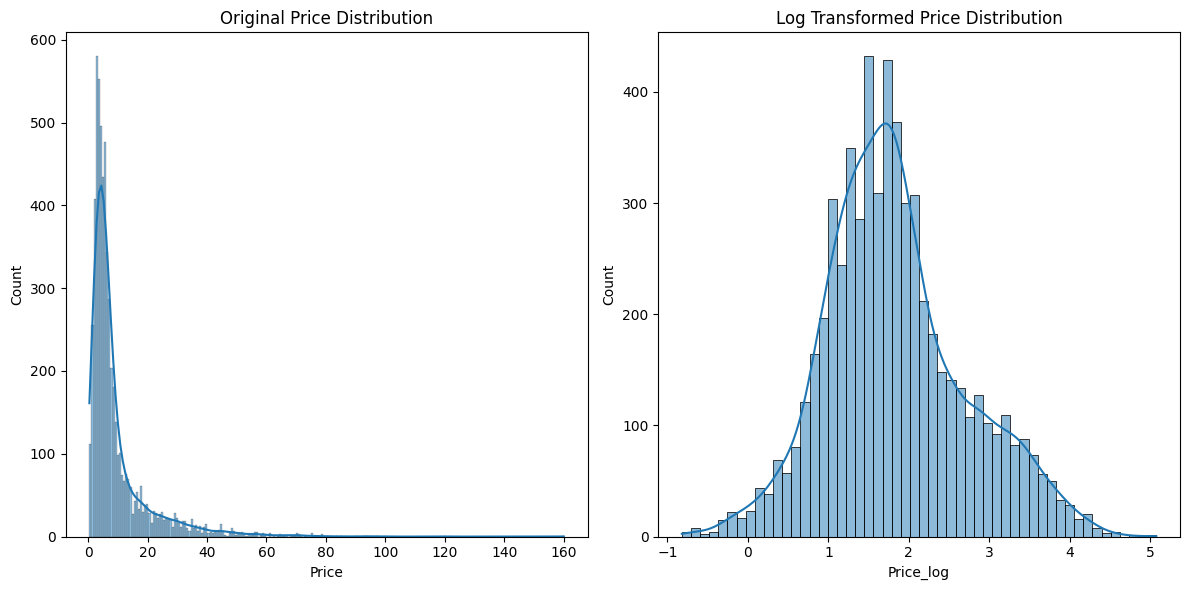

Skewness of original Price: 3.336744120601254
Skewness of log-transformed Price: 0.4161129075981331


In [ ]:
# Creating new column with 'Price_log' by applying log transformation
data['Price_log'] = np.log(data['Price'])

# Visual Assessment
plt.figure(figsize=(12, 6))

# Original Price distribution using Histogram in Subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Price'], kde=True)
plt.title('Original Price Distribution')

# Transformed Price_log distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data['Price_log'], kde=True)
plt.title('Log Transformed Price Distribution')

plt.tight_layout()
plt.show()

# 2. Statistical Measures
original_skewness = skew(data['Price'])
transformed_skewness = skew(data['Price_log'])

print(f"Skewness of original Price: {original_skewness}")
print(f"Skewness of log-transformed Price: {transformed_skewness}")

**Observations:** After performing the log transformation the distribution becomes more normalized, and the skewness was reduced significantlly from 3.337 to 0.416. Yet the skewness of 0.416 still indicates some slight right-skewed distribution, yet these values are much better for model performance.

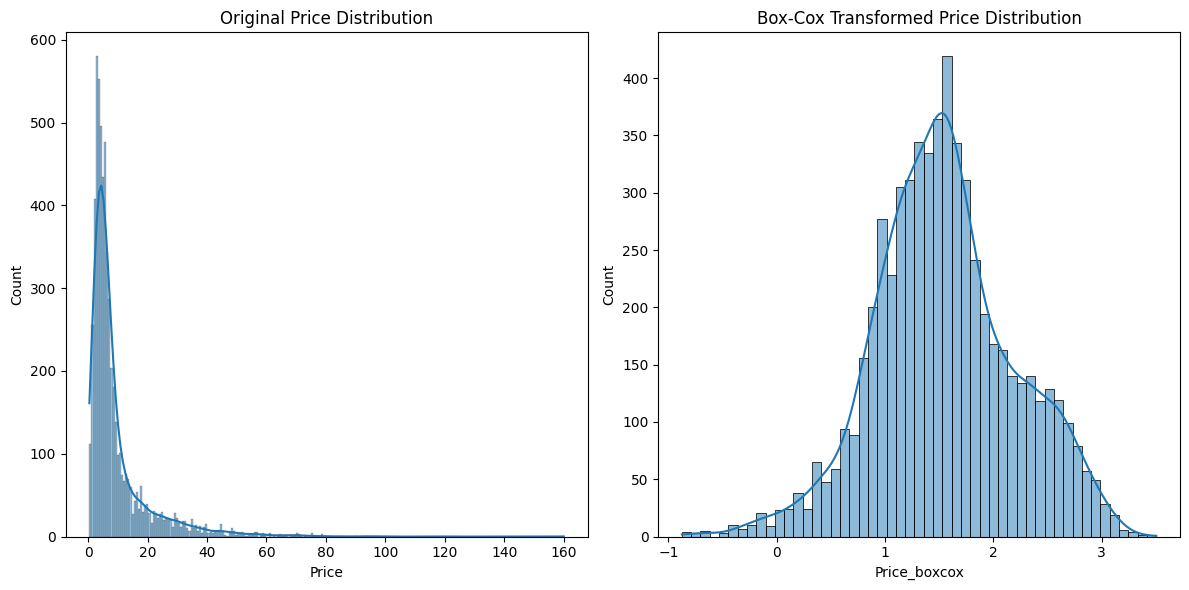

Skewness of original Price: 3.336744120601254
Skewness of Box-Cox transformed Price: -0.004795542039020332
Fitted Lambda for Box-Cox Transformation: -0.1561469606268272


In [ ]:
# Apply Box-Cox Transformation
data['Price_boxcox'], fitted_lambda = stats.boxcox(data['Price'])

# Visual Assessment
plt.figure(figsize=(12, 6))

# Original Price distribution using Histogram in Subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Price'], kde=True)
plt.title('Original Price Distribution')

# Transformed Price_boxcox distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data['Price_boxcox'], kde=True)
plt.title('Box-Cox Transformed Price Distribution')

plt.tight_layout()
plt.show()

# Statistical Measures
original_skewness = skew(data['Price'])
transformed_skewness = skew(data['Price_boxcox'])

print(f"Skewness of original Price: {original_skewness}")
print(f"Skewness of Box-Cox transformed Price: {transformed_skewness}")
print(f"Fitted Lambda for Box-Cox Transformation: {fitted_lambda}")

**Observations:** After performing the BoxCox transformation the distribution becomes more normalized, and the skewness was reduced significantlly from 3.337 to -0.005, outperforming the log transformation which reduced the skewness to 0.416.

##### Kilometers Driven

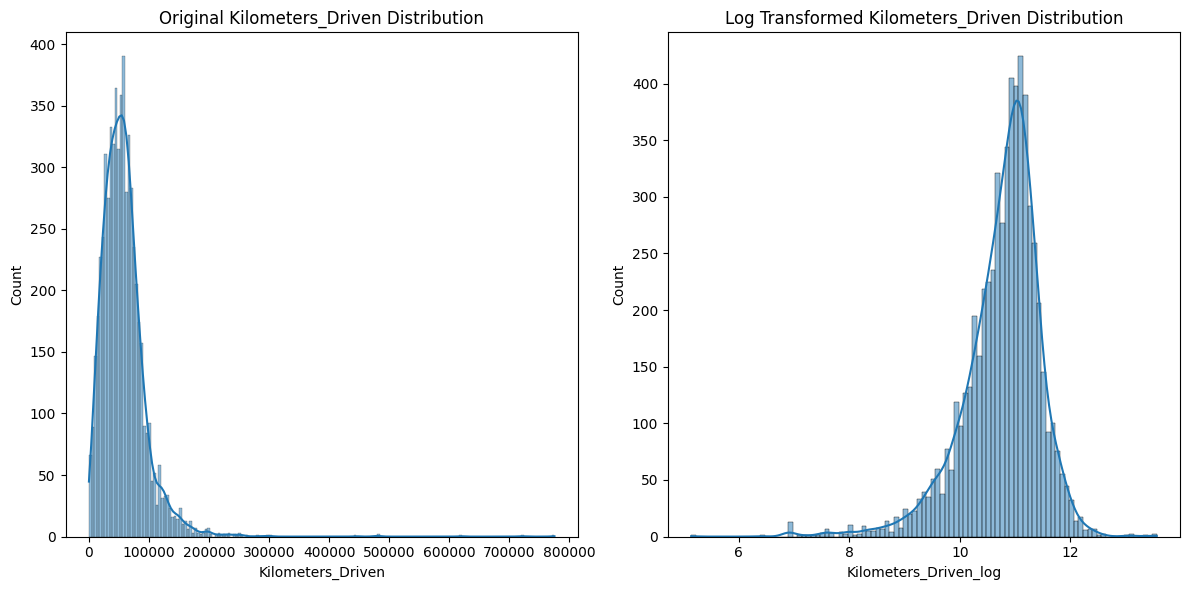

Skewness of original Kilometers_Driven: 4.203704250780107
Skewness of log-transformed Kilometers_Driven: -1.3571832916211508


In [ ]:
# Creating new column with 'Kilometers_Driven_log' by applying log transformation
data['Kilometers_Driven_log'] = np.log(data['Kilometers_Driven'])

# Visual Assessment
plt.figure(figsize=(12, 6))

# Original Kilometers_Driven distribution using Histogram in Subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Kilometers_Driven'], kde=True)
plt.title('Original Kilometers_Driven Distribution')

# Transformed Kilometers_Driven_log distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data['Kilometers_Driven_log'], kde=True)
plt.title('Log Transformed Kilometers_Driven Distribution')

plt.tight_layout()
plt.show()

# 2. Statistical Measures
original_skewness = skew(data['Kilometers_Driven'])
transformed_skewness = skew(data['Kilometers_Driven_log'])

print(f"Skewness of original Kilometers_Driven: {original_skewness}")
print(f"Skewness of log-transformed Kilometers_Driven: {transformed_skewness}")

**Observations:** After performing the log transformation the distribution becomes more normalized, and the skewness was reduced significantlly from 4.204 to -1.357. Yet the skewness of -1.357 now indicates a slight left-skewed distribution, which is not ideal. The skeness should be closer to zero.

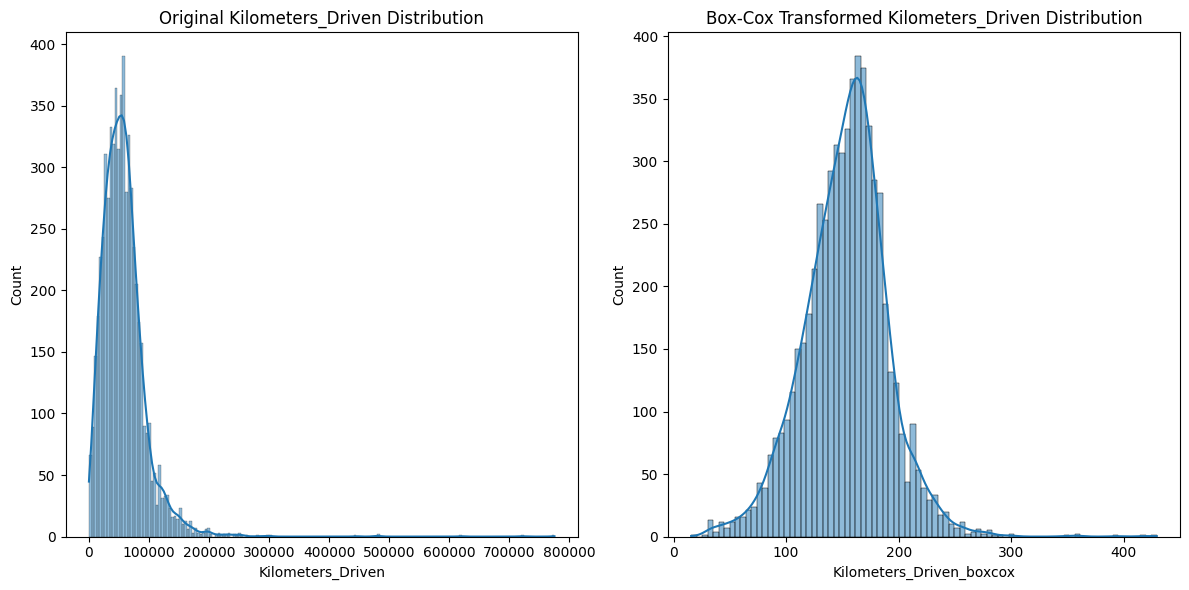

Skewness of original Kilometers_Driven: 4.203704250780107
Skewness of Box-Cox transformed Kilometers_Driven: 0.1207791041379534
Fitted Lambda for Box-Cox Transformation: 0.3751906543071317


In [ ]:
# Apply Box-Cox Transformation
data['Kilometers_Driven_boxcox'], fitted_lambda = stats.boxcox(data['Kilometers_Driven'])

# Visual Assessment
plt.figure(figsize=(12, 6))

# Original Kilometers_Driven distribution using Histogram in Subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Kilometers_Driven'], kde=True)
plt.title('Original Kilometers_Driven Distribution')

# Transformed Kilometers_Driven_boxcox distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data['Kilometers_Driven_boxcox'], kde=True)
plt.title('Box-Cox Transformed Kilometers_Driven Distribution')

plt.tight_layout()
plt.show()

# Statistical Measures
original_skewness = skew(data['Kilometers_Driven'])
transformed_skewness = skew(data['Kilometers_Driven_boxcox'])

print(f"Skewness of original Kilometers_Driven: {original_skewness}")
print(f"Skewness of Box-Cox transformed Kilometers_Driven: {transformed_skewness}")
print(f"Fitted Lambda for Box-Cox Transformation: {fitted_lambda}")


**Observations:** After performing the BoxCox transformation the distribution becomes more normalized, and the skewness was reduced significantlly from 4.204 to 0.121, outperforming the log transformation which reduced the skewness to -1.357. Different to the log transformation, the BoxCox transformation does not create a slighlty left skewed distribution, which is better for model performance.

##### Car Age

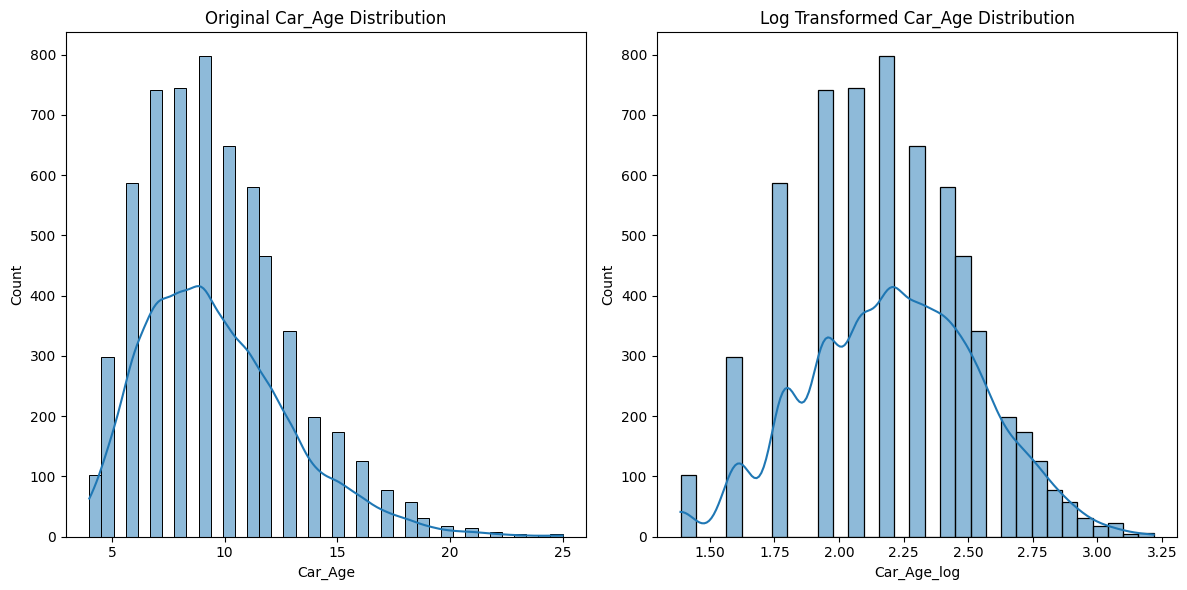

Skewness of original Car_Age: 0.8454570172385131
Skewness of log-transformed Car_Age: -0.04884589191617015


In [ ]:
# Creating new column with 'Car_Age_log' by applying log transformation
data['Car_Age_log'] = np.log(data['Car_Age'])

# Visual Assessment
plt.figure(figsize=(12, 6))

# Original Car_Age distribution using Histogram in Subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Car_Age'], kde=True)
plt.title('Original Car_Age Distribution')

# Transformed Car_Age_log distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data['Car_Age_log'], kde=True)
plt.title('Log Transformed Car_Age Distribution')

plt.tight_layout()
plt.show()

# 2. Statistical Measures
original_skewness = skew(data['Car_Age'])
transformed_skewness = skew(data['Car_Age_log'])

print(f"Skewness of original Car_Age: {original_skewness}")
print(f"Skewness of log-transformed Car_Age: {transformed_skewness}")

**Observations:** After performing the log transformation the distribution becomes more normalized, and the skewness was reduced slightly from 0.8454 to -0.048. Yet the skewness of -0.048. now indicates a slight left-skewed distribution, which is not ideal. Since the original skewness of the data was below zero, it may be considered to not perform any transformation on this feature. Looking at the shape of the bell, the feature without any transformation has the smoothest curve.

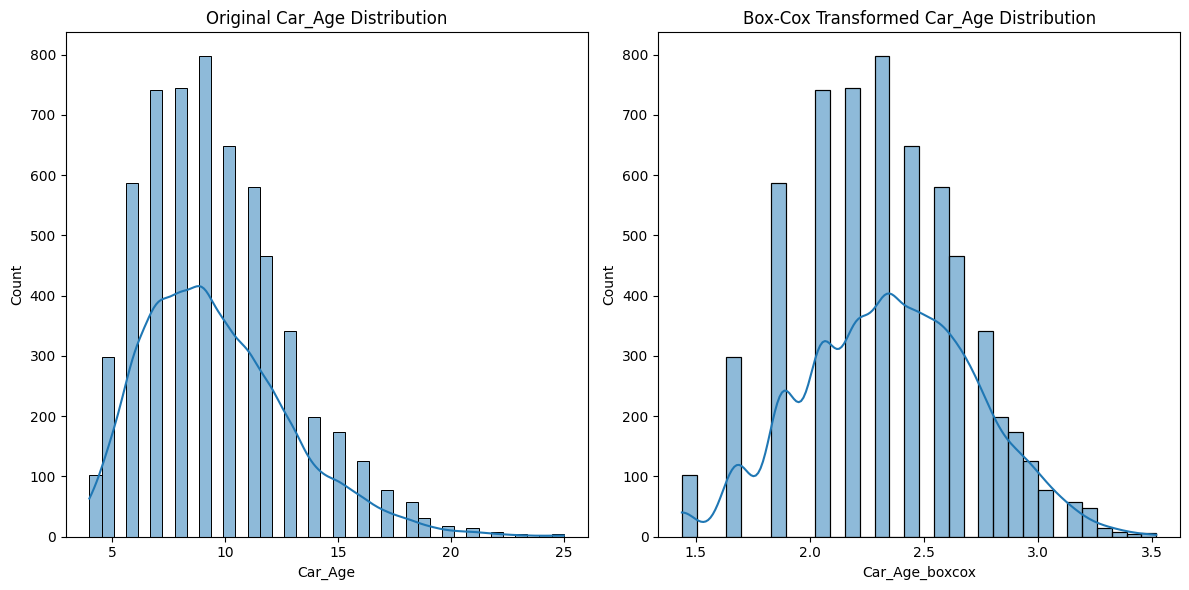

Skewness of original Car_Age: 0.8454570172385131
Skewness of Box-Cox transformed Car_Age: -0.0017589678586495813
Fitted Lambda for Box-Cox Transformation: 0.05467812633997856


In [ ]:
# Apply Box-Cox Transformation on 'Car_Age'
data['Car_Age_boxcox'], fitted_lambda = stats.boxcox(data['Car_Age'])

# Visual Assessment
plt.figure(figsize=(12, 6))

# Original Car_Age distribution using Histogram in Subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data['Car_Age'], kde=True)
plt.title('Original Car_Age Distribution')

# Transformed Car_Age_boxcox distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data['Car_Age_boxcox'], kde=True)
plt.title('Box-Cox Transformed Car_Age Distribution')

plt.tight_layout()
plt.show()

# Statistical Measures
original_skewness = skew(data['Car_Age'])
transformed_skewness = skew(data['Car_Age_boxcox'])

print(f"Skewness of original Car_Age: {original_skewness}")
print(f"Skewness of Box-Cox transformed Car_Age: {transformed_skewness}")
print(f"Fitted Lambda for Box-Cox Transformation: {fitted_lambda}")


**Observations:** After performing the BoxCox transformation the distribution becomes more normalized, and the skewness was reduced significantlly from 0.8454 to -0.002, outperforming the log transformation which reduced the skewness to -0.048. Both transformations, create a minimal left skewed distribution, and an unsmooth bell shape, which raises the concern if any transformation should be applies to this feature.

#### General Overview of continous features (after transformations)

In [ ]:
# Creating a new dataframe with only numerical columns after transformation
num_cols_trans = data[['Kilometers_Driven_boxcox', 'Mileage', 'Engine', 'Power', 'Car_Age', 'Price_boxcox']]

# Addimg an index associated with each column, using enumerate
for i, j in enumerate(num_cols_trans):
  print(i,j)

0 Kilometers_Driven_boxcox
1 Mileage
2 Engine
3 Power
4 Car_Age
5 Price_boxcox


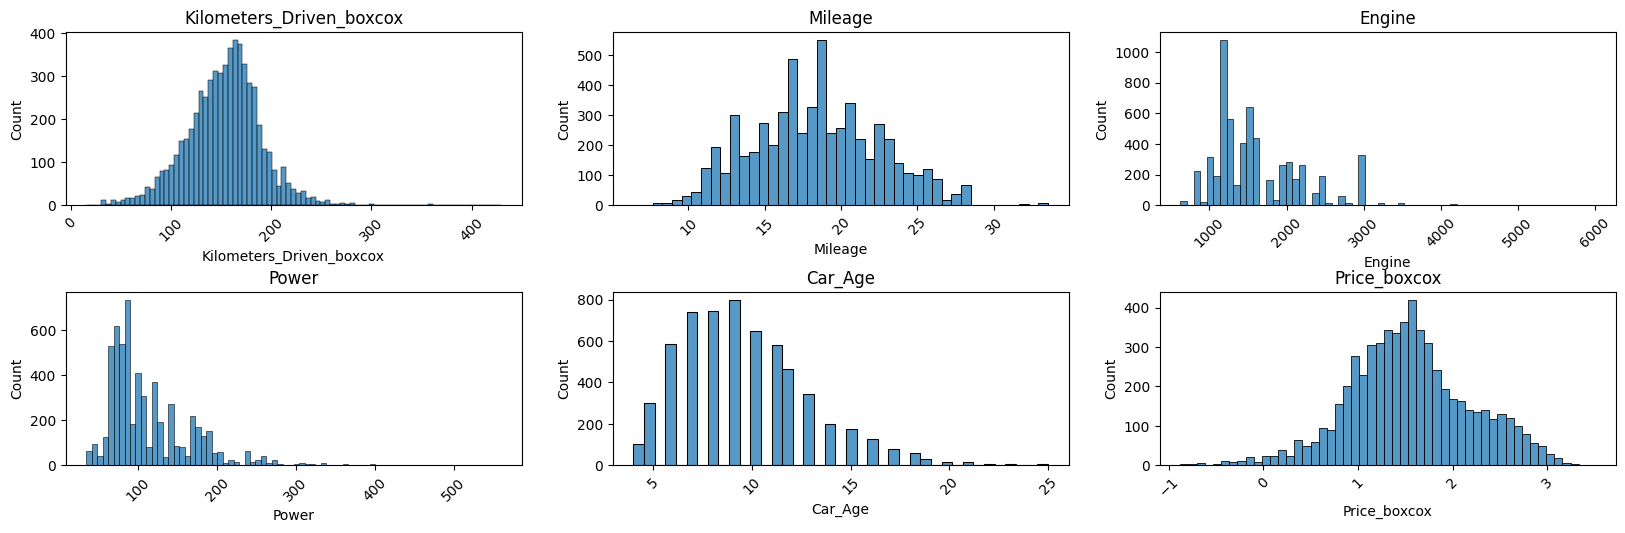

In [ ]:
# Plotting a subplot with Histogram for all numerical columns
plt.figure(figsize=(20,9))
for i, j in enumerate(num_cols_trans):
  plt.subplot(3,3, i +1)
  sns.histplot(data[j])
  plt.title(j)
  plt.xticks(rotation=45)

# Adjusting space between the subplots to make it easier to consume
plt.subplots_adjust(hspace=0.5)

**Observations:**

- Kilometers Driven (BoxCox): Distribution is close to Gaussian distribution
- Mileage: Distribution is close to Gaussian distribution
- Engine: Distribution is right-skewed, yet can't be transformed due to missing values
- Power: Distribution is right-skewed, yet can't be transformed due to missing values
- Car Age: Distribution is right-skewed, yet will not use transformation due to nature of the feature.
- Price (BoxCox): Distribution is close to Gaussian distribution


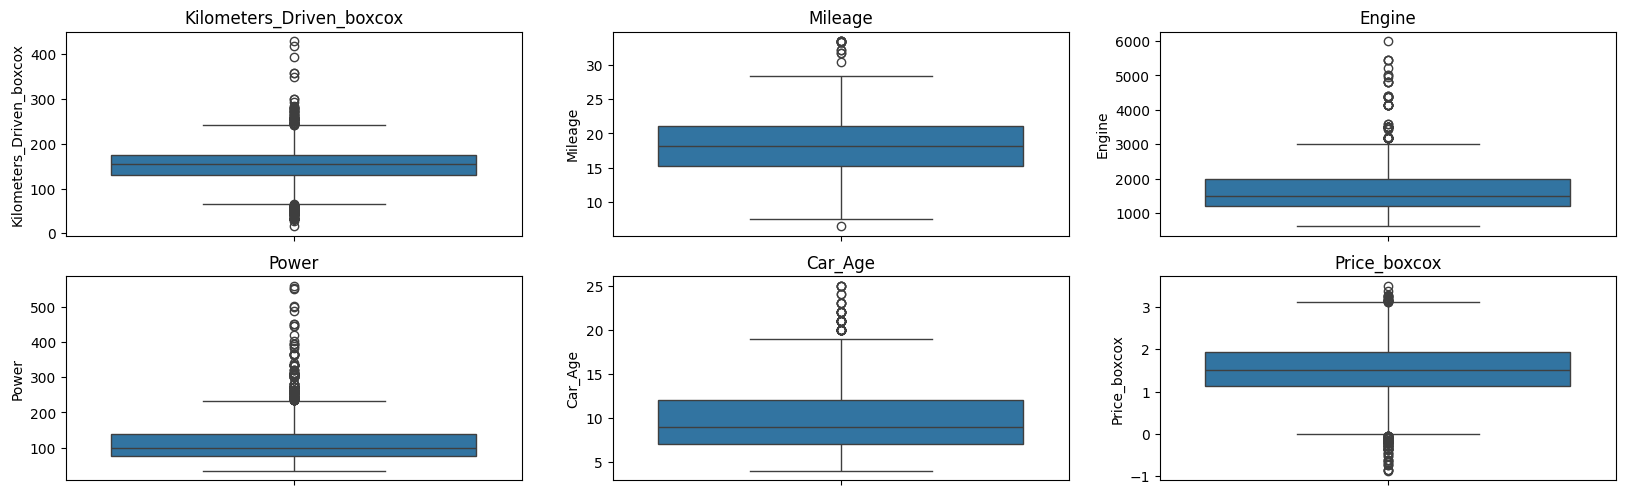

In [ ]:
# Plotting a subplot with Boxplot for all numerical columns
plt.figure(figsize=(20,9))
for i, j in enumerate(num_cols_trans):
  plt.subplot(3,3, i +1)
  sns.boxplot(data[j])
  plt.title(j)

### **Bivariate Analysis**

##### Correlation of original features:

In [ ]:
# Filtering for numerical columns in original dataset, before transformations were applied (data_no_trans)
num_cols_original = data_no_trans[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car_Age', 'Price']]

# Creating a correlation matrix to overview correlations between numerical features
correlation_original = num_cols_original.corr()

# Viewving correlation matrix
correlation_original

Kilometers_Driven   Mileage    Engine     Power   Car_Age  \
Kilometers_Driven           1.000000 -0.139726  0.155151  0.003726  0.448519   
Mileage                    -0.139726  1.000000 -0.646560 -0.553860 -0.296864   
Engine                      0.155151 -0.646560  1.000000  0.866093  0.052334   
Power                       0.003726 -0.553860  0.866093  1.000000 -0.014026   
Car_Age                     0.448519 -0.296864  0.052334 -0.014026  1.000000   
Price                      -0.168299 -0.333494  0.658608  0.772383 -0.305065   

                      Price  
Kilometers_Driven -0.168299  
Mileage           -0.333494  
Engine             0.658608  
Power              0.772383  
Car_Age           -0.305065  
Price              1.000000

<Axes: >

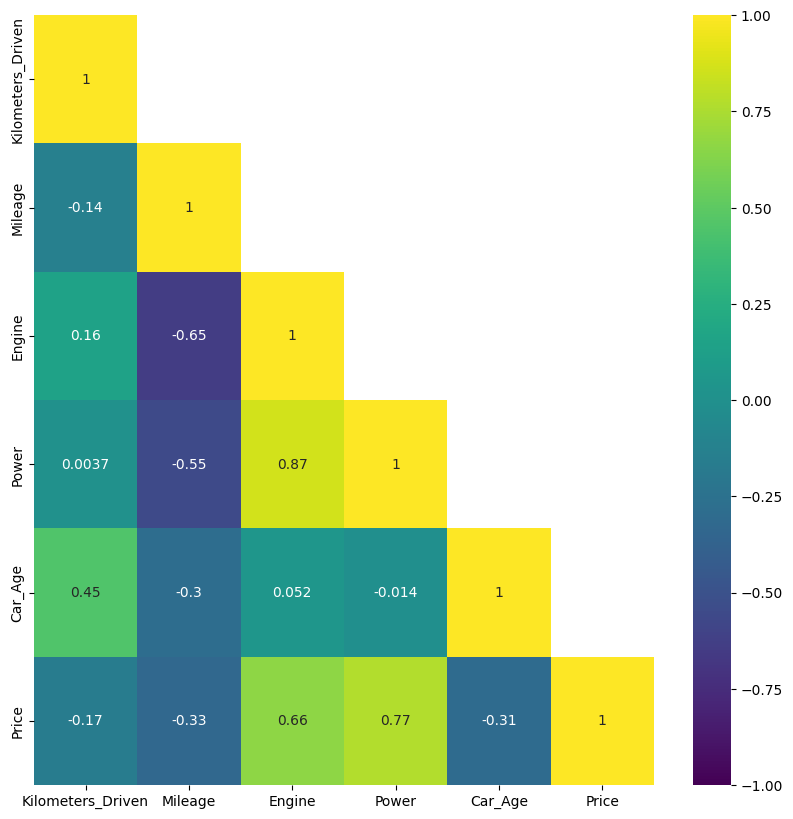

In [ ]:
plt.figure(figsize=(10,10))
mask = np.triu(correlation_original, k=1)
sns.heatmap(data=correlation_original, annot=True, cmap='viridis', vmin=-1, vmax=1, mask=mask)

**Observations:**

1. Corralations with target variable Price:

  - Both Power and Engine have the highest positive correlation coefficients with the price, with correlation coefficients of 0.77 and 0.66 respectively. This is to be expected, as more powerful and thus larger engines are often associated with better performing vehicles and thus increase in price

  - Mileage has a negative correlation (-0.31) with the target variable. This could be an indicator for 2 scenarios:
    1. More fuel efficient cars (higher in mileage) are sold at more accessible costs, given the need of that target audience looking for economical solutions.
    2. Less fuel efficient cars (lower in mileage) could be associated with luxury cars, which are higher in price. Often luxury cars have lower mileage due to larger engines.
  
  - The Age of the Car also has a negative correlation with the price (-0.31). This is to be expected, as the older vehicles get, the more their value depreciates, while newer cars tend to be more expensive.

  - Kilometers dirven has a relatively low negative correlation with the price, with a correlation coefficient of -0.011. This is relatively surprising, as it was expected that the higher the kilometers dirven by the vehicle, the more the price will decrease.

  - The number of Seats has a very weak positive correlation with the price (0.053), indicating that the number of seats is relatively indifferential to the price of the used vehicle.   

2. Significant Positive Corralations:

  - Power & Engine (correlation coefficient 0.87): This is the stronegst correlation between two continous features and is to be expected, as an increase in Power of vehicles requires larger Engines

  - Kilometers_Driven & Car_Age (correlation coefficient 0.45): This is also to be expected as most cars increase in kilometers dirven with increased age, simply due to more usage.

  - Seats & Engine (correlation coefficient 0.4): This indicates that larger vehicles require larger Engines. However from Univariate anaylsis we know that this relationship can't be linear as 2 seat cars, often sports cars, have very high engine values - even though the seat values are low.

3. Significant Negative Corrlations:

  - Engine & Mileage (correlation coefficient -0.65)
  - Power & Mileage (correlation coefficient -0.55)
  - Seats & Mileage (correlation coefficient -0.35):

  All negative correlations with Mileage are to be expected. From the Univariate anaylsis it was understood that cars with smaller engines, power and price values often have higher miileage values, meaning smaller engines have better fuel efficiency.

##### Correlation of all features (including transformed and not transformed data)

In [ ]:
# Filtering for numerical columns in original dataset, before transformations were applied (data_no_trans)
num_cols_original = data_no_trans[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car_Age', 'Price']]

# Creating a correlation matrix to overview correlations between numerical features
corr_original = num_cols_original.corr()

# Viewving correlation matrix
corr_original

Kilometers_Driven   Mileage    Engine     Power   Car_Age  \
Kilometers_Driven           1.000000 -0.139726  0.155151  0.003726  0.448519   
Mileage                    -0.139726  1.000000 -0.646560 -0.553860 -0.296864   
Engine                      0.155151 -0.646560  1.000000  0.866093  0.052334   
Power                       0.003726 -0.553860  0.866093  1.000000 -0.014026   
Car_Age                     0.448519 -0.296864  0.052334 -0.014026  1.000000   
Price                      -0.168299 -0.333494  0.658608  0.772383 -0.305065   

                      Price  
Kilometers_Driven -0.168299  
Mileage           -0.333494  
Engine             0.658608  
Power              0.772383  
Car_Age           -0.305065  
Price              1.000000

In [ ]:
# Creating a security copy of data values until this point, since columns will be dropped
data_new = data.copy()

# Filtering for numerical columns in transformed dataset (data)
num_cols_transformed = data[['Price', 'Price_log', 'Price_boxcox','Kilometers_Driven','Kilometers_Driven_log', 'Kilometers_Driven_boxcox', 'Mileage', 'Engine', 'Power', 'Car_Age']]

# Creating a correlation matrix for numerical columns in this data
corr_transformed = num_cols_transformed.corr()

# Highlighting price rows in green for better visualization
rows_to_highlight = ['Price', 'Price_boxcox']

corr_matrix_styled = corr_transformed.style.apply(lambda x: ['background-color: green' if x.name in rows_to_highlight else '' for i in x], axis=0)

corr_matrix_styled

**Observations:**

Looking at the the dependend variable in it's original form (Price) and transformed version (Price_boxcox), the following observations can be made:

1. Seats: There is a significant positive increase in the correlation coefficient from 0.054 to 0.177. This makes generally more sense as the seat value often determines the size of the vehicle and as such is an important factor to the price of the vehicle. However, from the Univariate Analysis, most 2 Seaters are luxury sports car in high price, as such it's not a linear feature, meaning that the higher the number of seats, the higher the price. Yet the significance of this feature rose.

2. Car_Age: There is a significant negative increase in the correlation coefficient from -0.305 to -0.532. This increase also makes generally more sense as the older vehicles get, the more they lose in value.

3. Kilometers_Driven-boxcox: There was a reasonable neagtive increase from -0.168 to -0.221. This aligns more with the ideas that the more km a car has driven, the more this will affect the price of the vehicle due to usage deterrioration which can be mechanical or estetic.

**Conclusiom**, Price_boxcox has better values that align with general logic, assuming that the transformation has centralized outlier values better. As such there are several columns that can be dropped before visualizing the HeatMap again:

2. Price_log  
4. Kilometers_Driven_log
5. Car_Age_log
6. Car_Age_boxcox

In [ ]:
# Dropping the above mentioned columns
data_new = data_new.drop(['Price_log', 'Kilometers_Driven_log', 'Car_Age_log', 'Car_Age_boxcox'], axis=1)

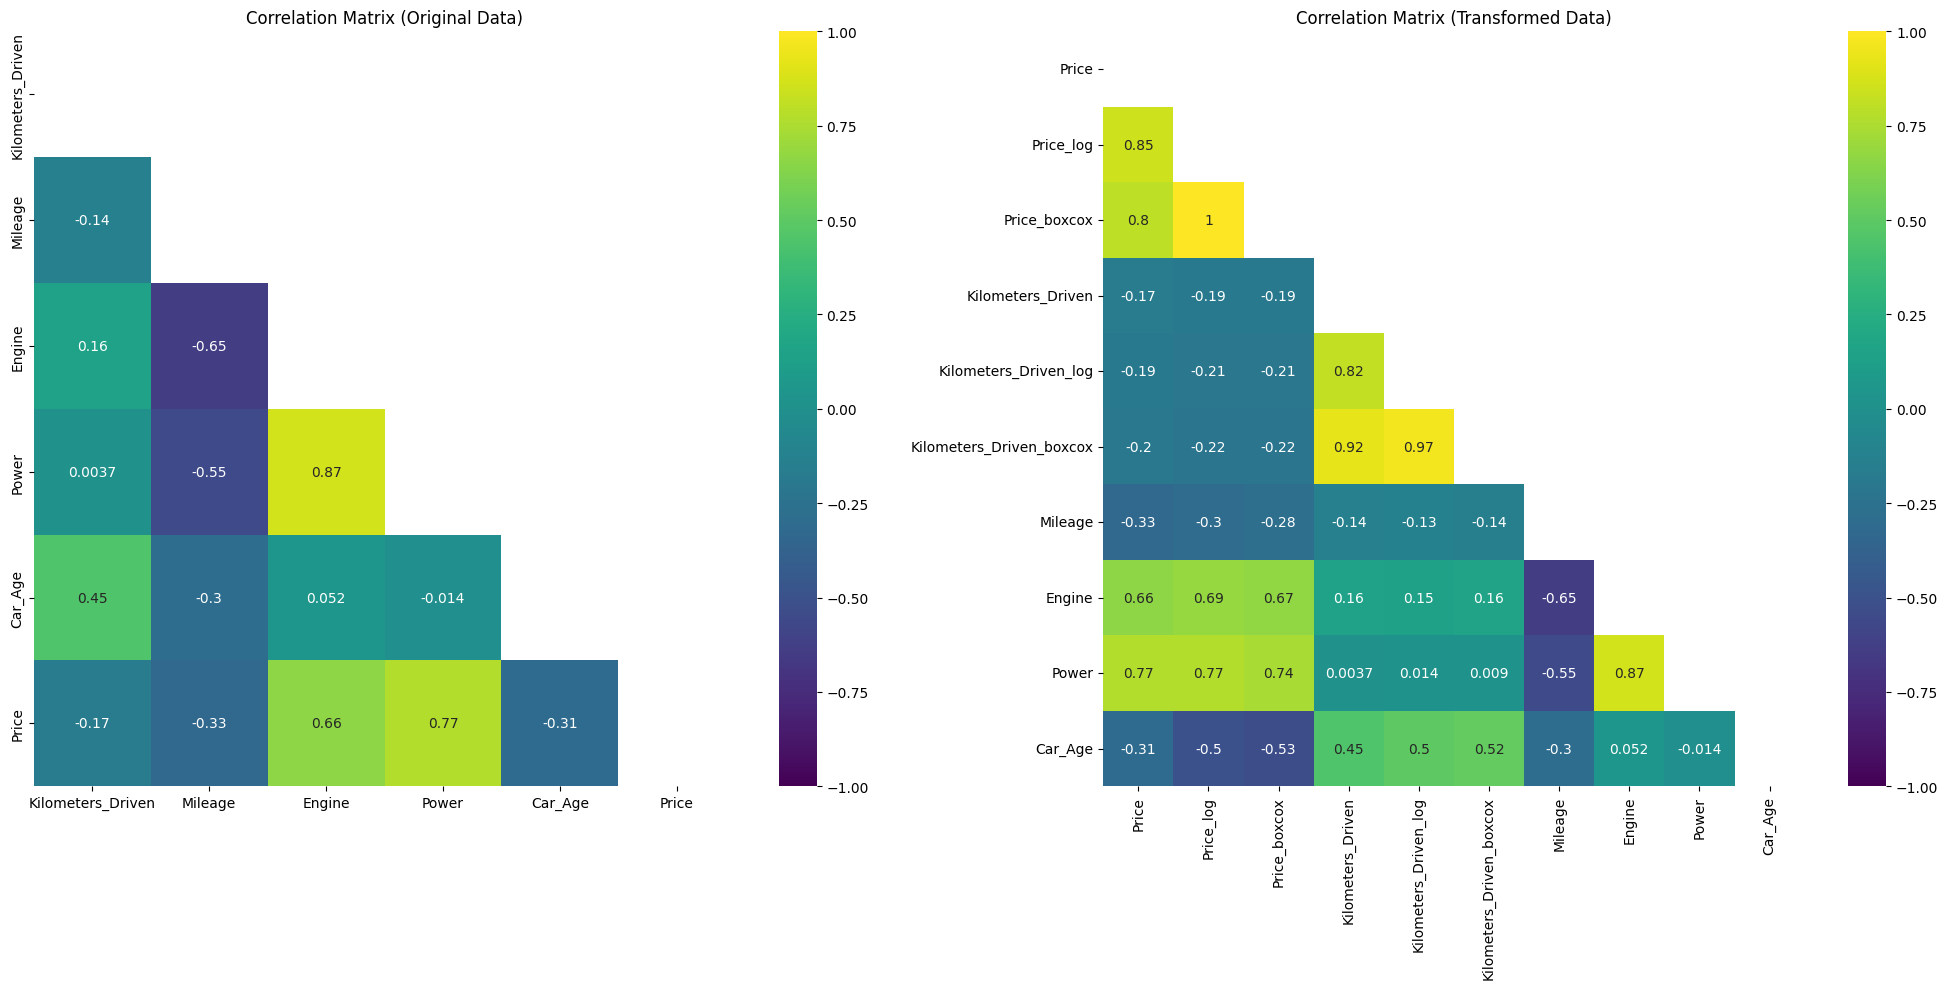

In [ ]:
# Visually comparing both dataset, without and with transformed features to understand impact better

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create mask for upper triangle
mask_no_trans = np.triu(np.ones_like(corr_original, dtype=bool))
mask_new = np.triu(np.ones_like(corr_transformed, dtype=bool))

# First heatmap (original dataset without transformations)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(data=corr_original, mask=mask_no_trans, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Original Data)')

# Second heatmap (with transformations)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(data=corr_transformed, mask=mask_new, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Transformed Data)')

# Adjust layout
plt.tight_layout()
plt.show()


**Observations:after performing Boxcox transformation on Price and Kilometers direven:**


1. Corralations with depndent variable Price:

  - Power has the highest poitive correlation with Price (correlation coefficients of 0.74), meaning there was a slight decrease from 0.77. Yet this relationship has the strongest coefficient.
  
  - Engine has the second highest postive correlation with Price (correlation coefficients of 0.66), meaning there was a slight increase from 0.65. This is to be expected, as more powerful and thus larger engines are often associated with better performing vehicles and thus increase in price

  - Mileage has a negative correlation with Price (correlation coefficients of -0.28), meaning there was a slight increase from -0.33. The assumption remains:
    1. More fuel efficient cars (higher in mileage) are sold at more accessible costs, given the need of that target audience looking for economical solutions.
    2. Less fuel efficient cars (lower in mileage) could be associated with luxury cars, which are higher in price. Often luxury cars have lower mileage due to larger engines.
  
  - The Car Age has the strongest negative correlation with the price (correlation coefficients of -0.53), meaning there was a large increase from -0.30. This is to be expected, as the older vehicles get, the more their value depreciates, while newer cars tend to be more expensive. A more negative correlatio indicates that the transformed features model this assumpion better.

  - Kilometers dirven initially had a relatively low negative correlation with the price, with a correlation coefficient of -0.011. After performing the transformation with BoxCox for this feature as well as price there was a super increase to -0.22. Yet the correlation remains relatively low which is still surprising, as it was expected that the higher the kilometers dirven by the vehicle, the more the price will decrease.

  - The number of Seats initially had the weakest positive correlation with the price, with a correlation coefficient of 0.053. Now the correlation coefficient of 0.17 indicates a much higher positive correlation. This increase better explains that as the number of seats increases, the vehicle is bigger and is thus sold at a higher price. It is important to note that the 2 Seat Vehicles are outliers here - though the number of Seats is less, the Cars are more costly as they are luxury sports cars, which were examined during Univariate Analysis. Also these 2-seater sports cars have higher values for power and engine. Concluding that a realtively low, yet higher than the initial correlation, make sense given these outliers.

2. Significant Positive Corralations:

  - Power & Engine (correlation coefficient 0.87) = stayed the same as before transforming price and km_dirven with boxcox.
  - Kilometers_Driven_boxcox & Car_Age (correlation coefficient 0.51 from 0.45): This increase further strengthens the reasoning that as cars age, they accunulate more km dirven due to more usage over the years.
  - Seats & Engine (correlation coefficient 0.40) = stayed the same as before transforming price and km_dirven with boxcox.

3. Significant Negative Corrlations:

  - Engine & Mileage (correlation coefficient -0.65) = stayed the same as before transforming price and km_dirven with boxcox.
  - Power & Mileage (correlation coefficient -0.55) = stayed the same as before transforming price and km_dirven with boxcox.
  - Seats & Mileage (correlation coefficient -0.35) = stayed the same as before transforming price and km_dirven with boxcox.  



##### More visualizations for Bivariate Analysis with the target variable (Price and Price_boxcox)

In [ ]:
# Updating numerical columns list to include Kilometers_Driven_boxcox and excluding price
num_cols = data_new[['Kilometers_Driven', 'Kilometers_Driven_boxcox', 'Mileage', 'Engine', 'Power', 'Car_Age', 'Seats']]

# Addimg an index associated with each column, using enumerate
for i, j in enumerate(num_cols):
  print(i,j)

0 Kilometers_Driven
1 Kilometers_Driven_boxcox
2 Mileage
3 Engine
4 Power
5 Car_Age
6 Seats


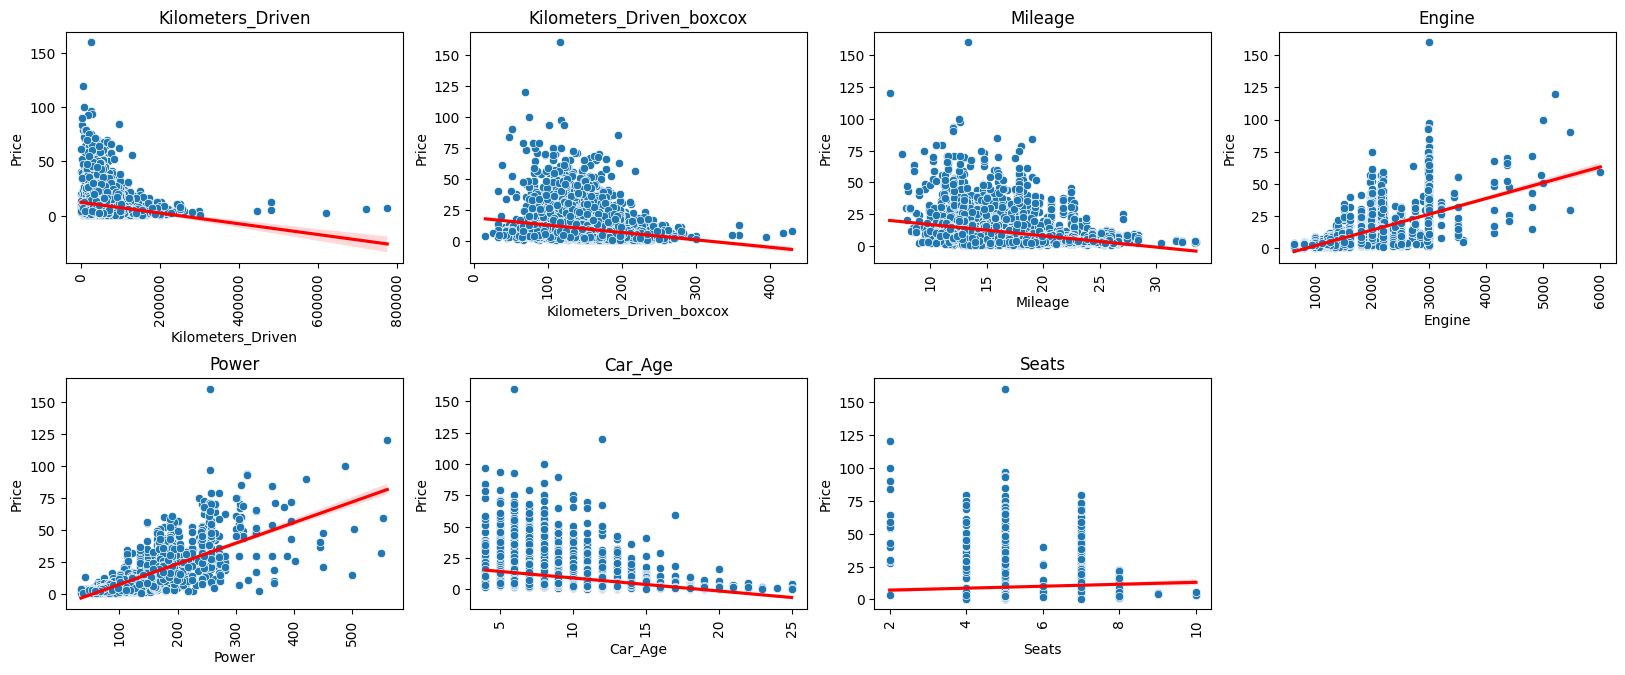

In [ ]:
# Plotting a subplot with Scatterplot for all numerical columns with Price
plt.figure(figsize=(20,12))
for i, j in enumerate(num_cols):
  plt.subplot(3,4, i +1)
  sns.scatterplot(data =data_new, x=j, y= 'Price')
  sns.regplot(data=data_new, x=j, y='Price', scatter=False, line_kws={'color': 'red'})
  plt.title(j)
  plt.xticks(rotation=90)

# Adjusting space between the subplots to make it easier to consume
plt.subplots_adjust(hspace=0.5)

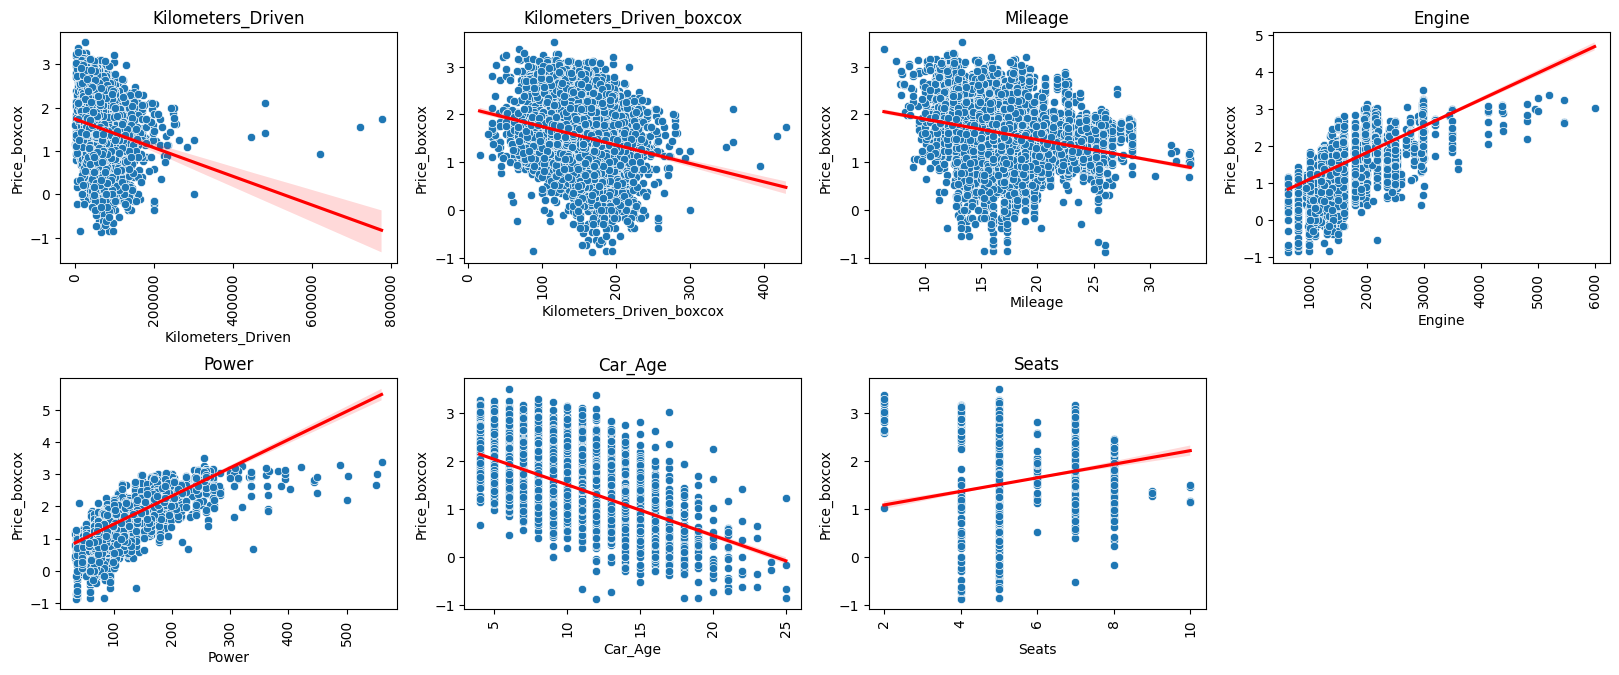

In [ ]:
# Plotting a subplot with Scatterpot for all numerical columns with Price_Boxcox
plt.figure(figsize=(20,12))
for i, j in enumerate(num_cols):
  plt.subplot(3,4, i +1)
  sns.scatterplot(data =data_new, x=j, y= 'Price_boxcox')
  sns.regplot(data=data_new, x=j, y='Price_boxcox', scatter=False, line_kws={'color': 'red'})
  plt.title(j)
  plt.xticks(rotation=90)

# Adjusting space between the subplots to make it easier to consume
plt.subplots_adjust(hspace=0.5)

**Observation:** Comparing the scatterplots plotted with the normal price variable and the transformed price_boxcox feature it is evident, that the transformation has centraized most values. The same is clearly visible when compraing both features for km_driven and km_dirven_boxcox. However, the main tendencies remain:
1. Positive correlations with target variable (price or price_boxcox):
- Engine
- Power
- Seats

2. Negative correlations with target variable (price or price_boxcox):
- Km_dirven (both normal and transformed feature)
- Mileage
- Car Age

In [ ]:
# Creating a list of only catagorical columns list to use in Barplots
cat_cols = data_new[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type','Brand', 'Seats']]

# Addimg an index associated with each column, using enumerate
for i, j in enumerate(cat_cols):
  print(i,j)

0 Location
1 Fuel_Type
2 Transmission
3 Owner_Type
4 Brand
5 Seats


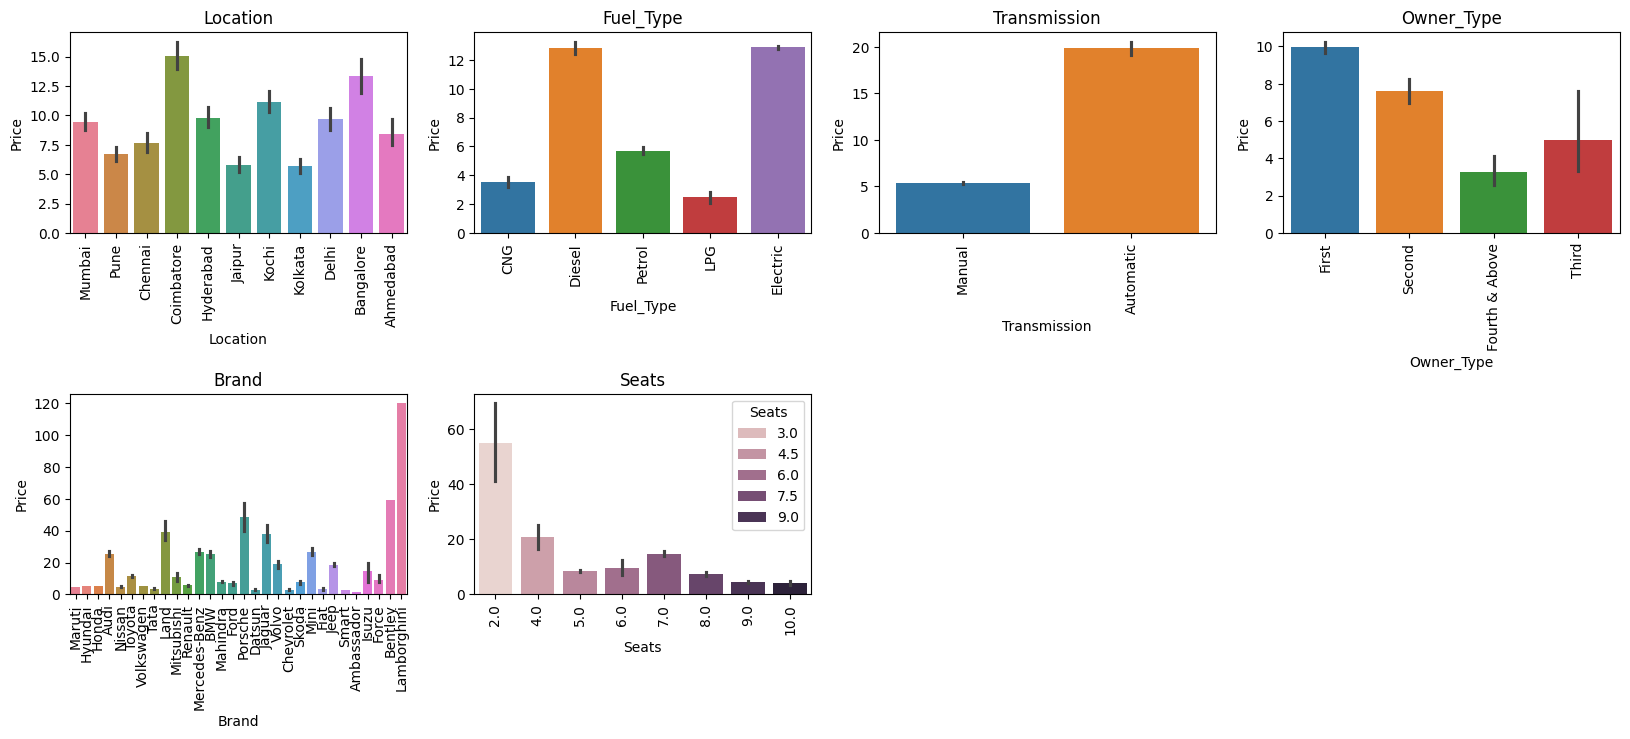

In [ ]:
# Plotting a subplot with Barplot for all catagorical columns in relation to origial price feature
plt.figure(figsize=(20,12))
for i, j in enumerate(cat_cols):
  plt.subplot(3,4, i +1)
  sns.barplot(data =data_new, x=j, y= 'Price', hue=j)
  plt.title(j)
  plt.xticks(rotation=90)

# Adjusting space between the subplots to make it easier to consume
plt.subplots_adjust(hspace=0.8)

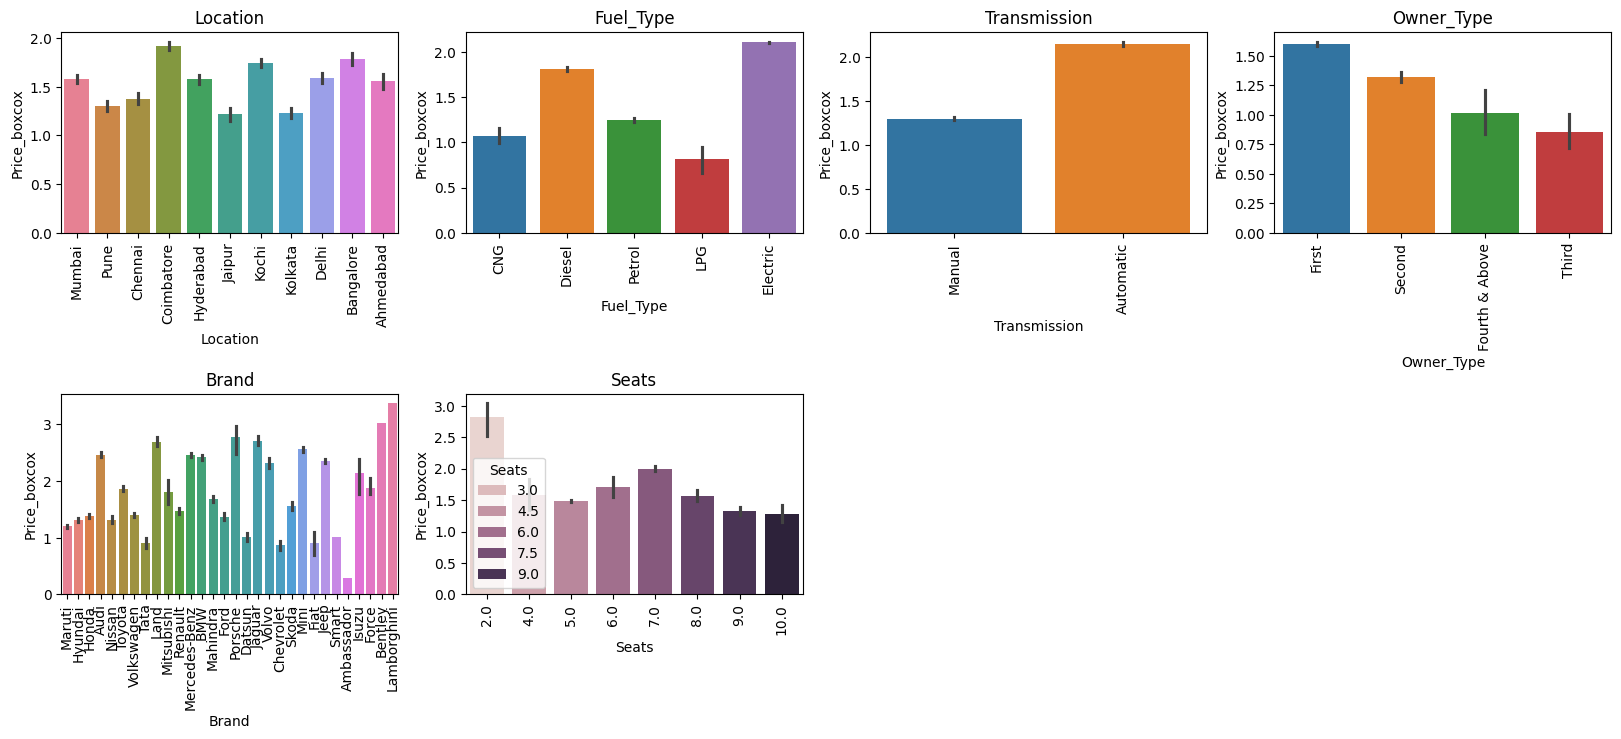

In [ ]:
# Plotting a subplot with Barplot for all catagorical columns in relation to transformed (boxcox) price feature
plt.figure(figsize=(20,12))
for i, j in enumerate(cat_cols):
  plt.subplot(3,4, i +1)
  sns.barplot(data =data_new, x=j, y= 'Price_boxcox', hue=j)
  plt.title(j)
  plt.xticks(rotation=90)


plt.subplots_adjust(hspace=0.8) # Adjusting space between the subplots to make it easier to consume

**Observation:** Comparing the Barplots plotted with the normal price variable and the transformed price_boxcox feature it is evident, that the transformation has decreased huge descrepencies visible before. These features stand out as being most affected:

- Owner_Type: With the original price feature, vehicles with 4 or more previous owners had the lowest price, clearly visible in the barplot. After Transformation of the target variable, this column rose to surpass vehicles with 3 prevous owners.

- Brands: With the orginal price feature there was such big discrepency between brands that most individual bars where not very visible due to Bently and Lamborghini being such big outliers. After Transformation these values have been highly centralized, indicating that extreme outliers for price where drastically reduced.

However, the overall trends remain:

1. Location: The location with the higehst priced cars is Coimbatore, closly followed by Bangalore and Kochi. The least expensive cars are located in Jaipur and Kolkata.
2. Fuel_Type: Diesel and Electic Cars are the most expensive, while LPG & CNG cars are the least expensive.
3. Transmission: Cars with automatic transmission are more expensive than cars with manual transmission.
4. Owner_Type: Vehicles that only had one previous owner are priced generally higher, closely followed by cars with two previous owners. It seems that cars with three prevous owners or four or more prevous owners generally fall in the same range, this is highlighted by the differences in the barplots before and after the transformation of the target variable.
5. Brand: Lamborghini, Bently and Porsche are always the most expensive cars, closely followed by Jaguar, Land Rover, Audi, Mini, Jeep, BMW and Mercedes-Benz. The least expensive Brands are Ambassador, Tata, Chevrolet, Datsun and Maruti.
6. Seats: Though this is a numerical feature, it's easier visuallized as a catagorical value. Cars with only 2 seats are the most expensive.

##### Continous Variables Bivariate Analysis positive correlations

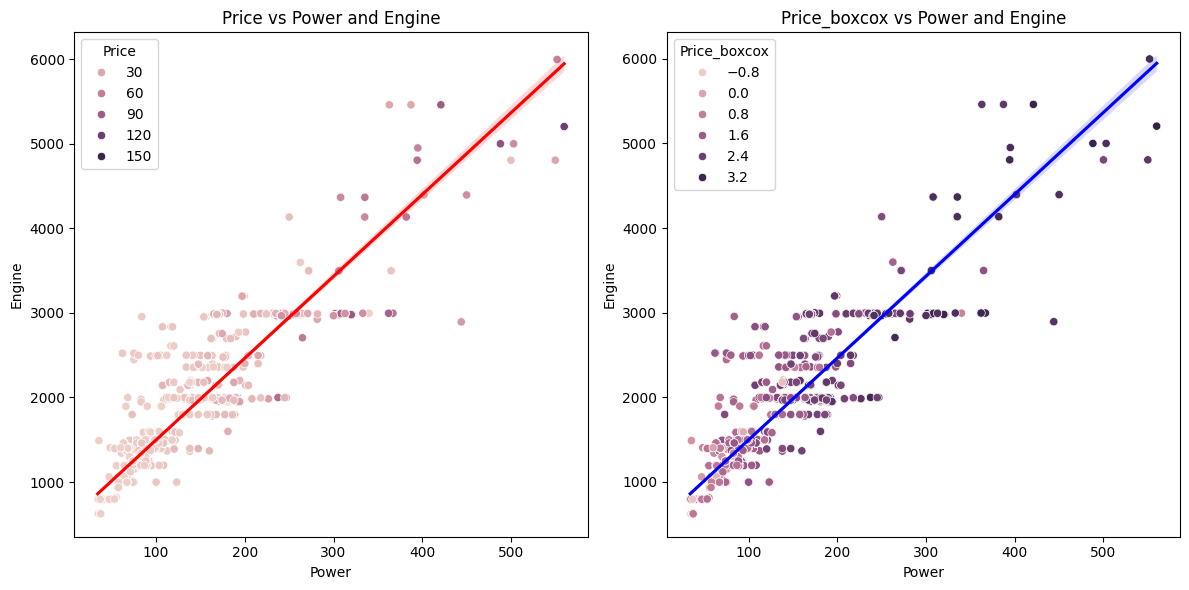

In [ ]:
# Set up the figuresize with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot for 'Price'
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_new, x='Power', y='Engine', hue='Price')
sns.regplot(data=data_new, x='Power', y='Engine', scatter=False, line_kws={'color': 'red'})
plt.title('Price vs Power and Engine')

# Second subplot for 'Price_boxcox'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_new, x='Power', y='Engine', hue='Price_boxcox')
sns.regplot(data=data_new, x='Power', y='Engine', scatter=False, line_kws={'color': 'blue'})
plt.title('Price_boxcox vs Power and Engine')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Observations:** Postive correlation between an increase in engine and power, also showing that most expensive cars are situated at the upper ends of both engine and power values.


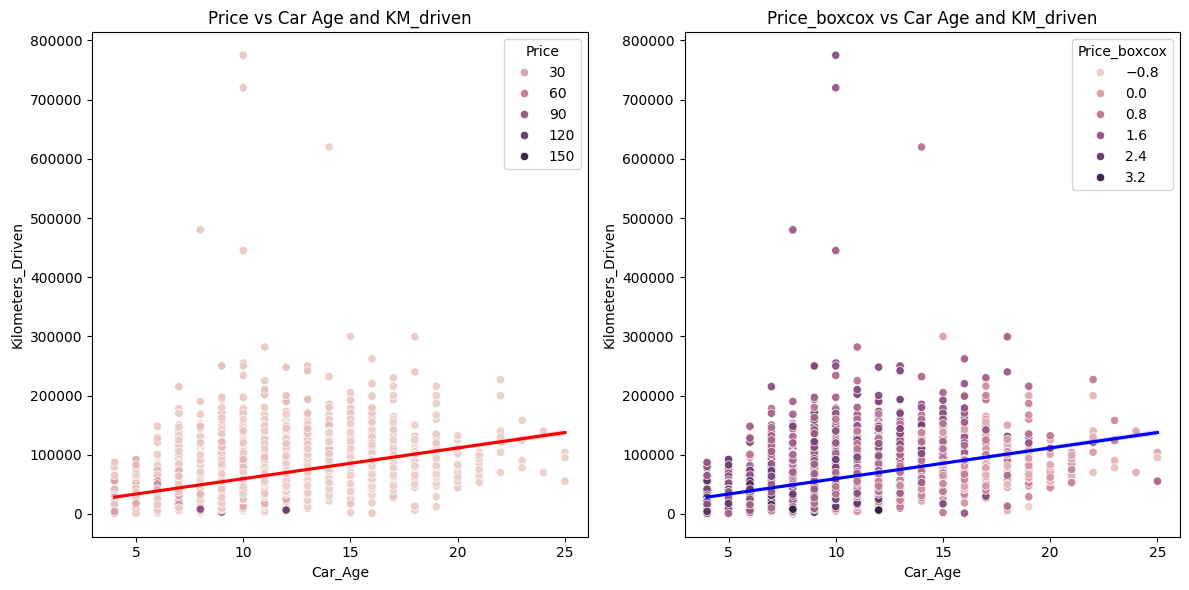

In [ ]:
# Set up the figuresize with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot for 'Price'
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_new, x='Car_Age', y='Kilometers_Driven', hue='Price')
sns.regplot(data=data_new, x='Car_Age', y='Kilometers_Driven', scatter=False, line_kws={'color': 'red'})
plt.title('Price vs Car Age and KM_driven')

# Second subplot for 'Price_boxcox'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_new, x='Car_Age', y='Kilometers_Driven', hue='Price_boxcox')
sns.regplot(data=data_new, x='Car_Age', y='Kilometers_Driven', scatter=False, line_kws={'color': 'blue'})
plt.title('Price_boxcox vs Car Age and KM_driven')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

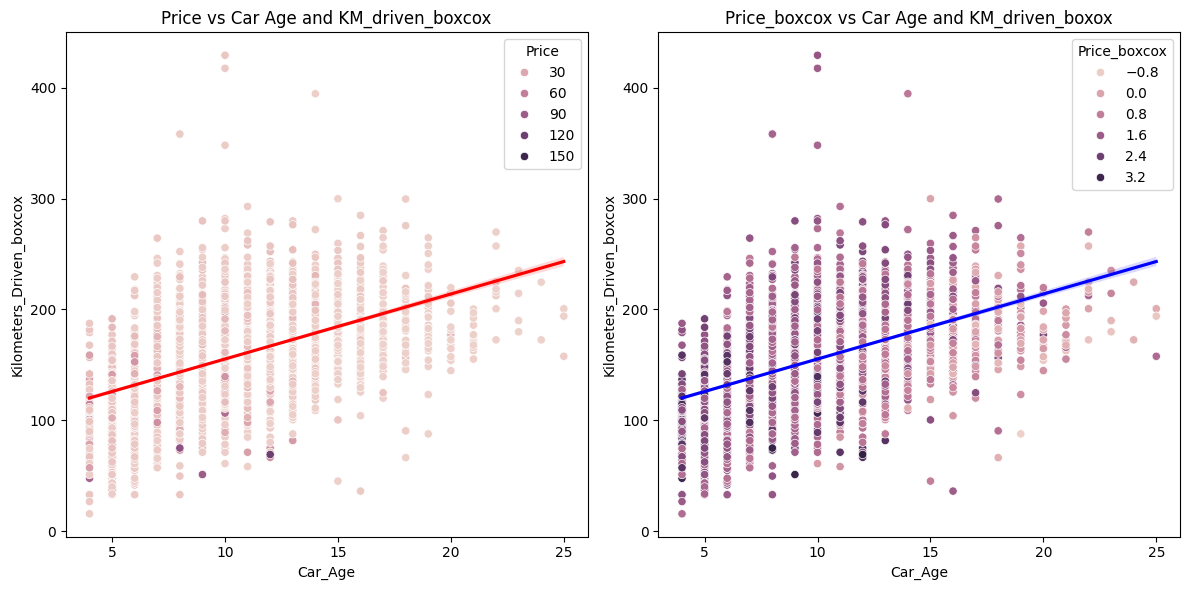

In [ ]:
# Set up the figuresize with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot for 'Price'
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_new, x='Car_Age', y='Kilometers_Driven_boxcox', hue='Price')
sns.regplot(data=data_new, x='Car_Age', y='Kilometers_Driven_boxcox', scatter=False, line_kws={'color': 'red'})
plt.title('Price vs Car Age and KM_driven_boxcox')

# Second subplot for 'Price_boxcox'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_new, x='Car_Age', y='Kilometers_Driven_boxcox', hue='Price_boxcox')
sns.regplot(data=data_new, x='Car_Age', y='Kilometers_Driven_boxcox', scatter=False, line_kws={'color': 'blue'})
plt.title('Price_boxcox vs Car Age and KM_driven_boxox')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Observations:** As Cars get older there is a slight increase in km driven, and decrease in price for older cars, with the most expsnive cars accumulating below 10 years in Price_boxcox and a few outliers being visible in price.

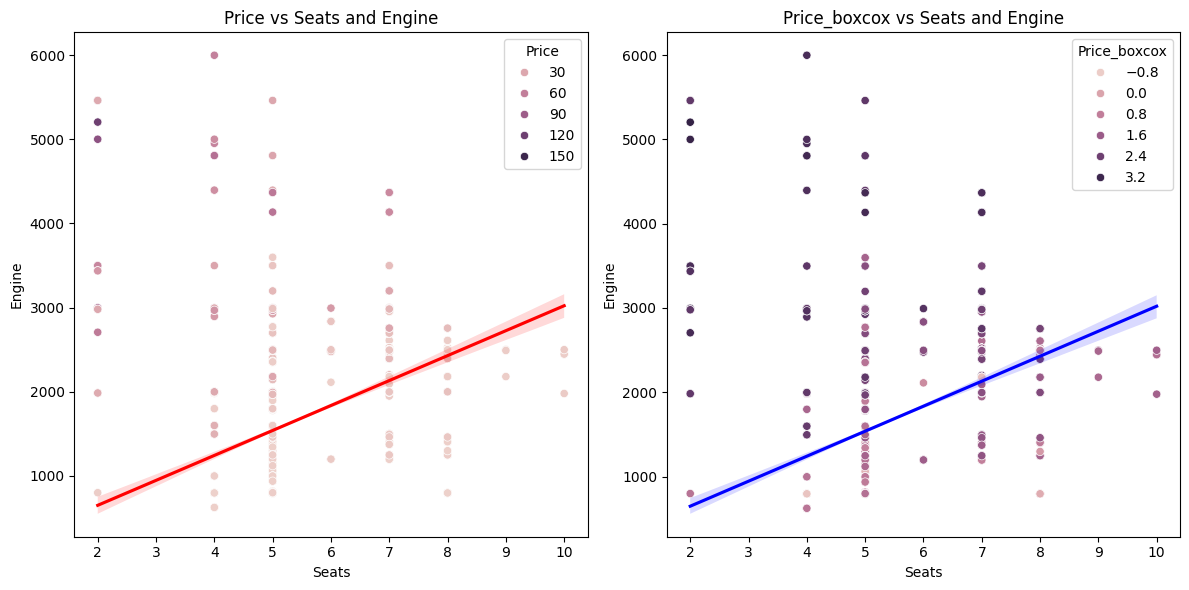

In [ ]:
# Set up the figuresize with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot for 'Price'
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_new, x='Seats', y='Engine', hue='Price')
sns.regplot(data=data_new, x='Seats', y='Engine', scatter=False, line_kws={'color': 'red'})
plt.title('Price vs Seats and Engine')

# Second subplot for 'Price_boxcox'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_new, x='Seats', y='Engine', hue='Price_boxcox')
sns.regplot(data=data_new, x='Seats', y='Engine', scatter=False, line_kws={'color': 'blue'})
plt.title('Price_boxcox vs Seats and Engine')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Observations** Cars with more seats increase generally in engine size. Yet there are many outliers to this, and as such the relationship is not very linear or dominant. The relationship with price is also not very clear here as 2 seat cars are all in the higher spcturm of car prices. Generally though, the higher the engine value, the higer the price of the car.



##### Continous Variables Bivariate Analysis negative correlations

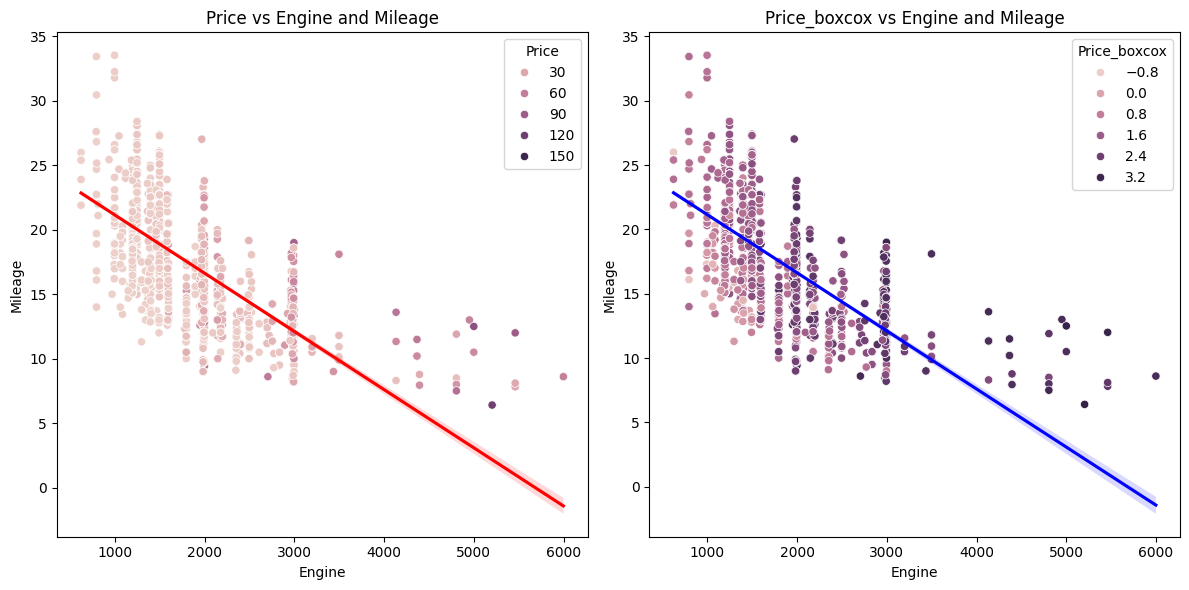

In [ ]:
# Set up the figuresize with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot for 'Price'
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_new, x='Engine', y='Mileage', hue='Price')
sns.regplot(data=data_new, x='Engine', y='Mileage', scatter=False, line_kws={'color': 'red'})
plt.title('Price vs Engine and Mileage')

# Second subplot for 'Price_boxcox'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_new, x='Engine', y='Mileage', hue='Price_boxcox')
sns.regplot(data=data_new, x='Engine', y='Mileage', scatter=False, line_kws={'color': 'blue'})
plt.title('Price_boxcox vs Engine and Mileage')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Observations:** There is a clear negative relationship with a decrease in Mileage as Engine values increase. The most affortable cars are assoicated with high mileage values and low engine values.

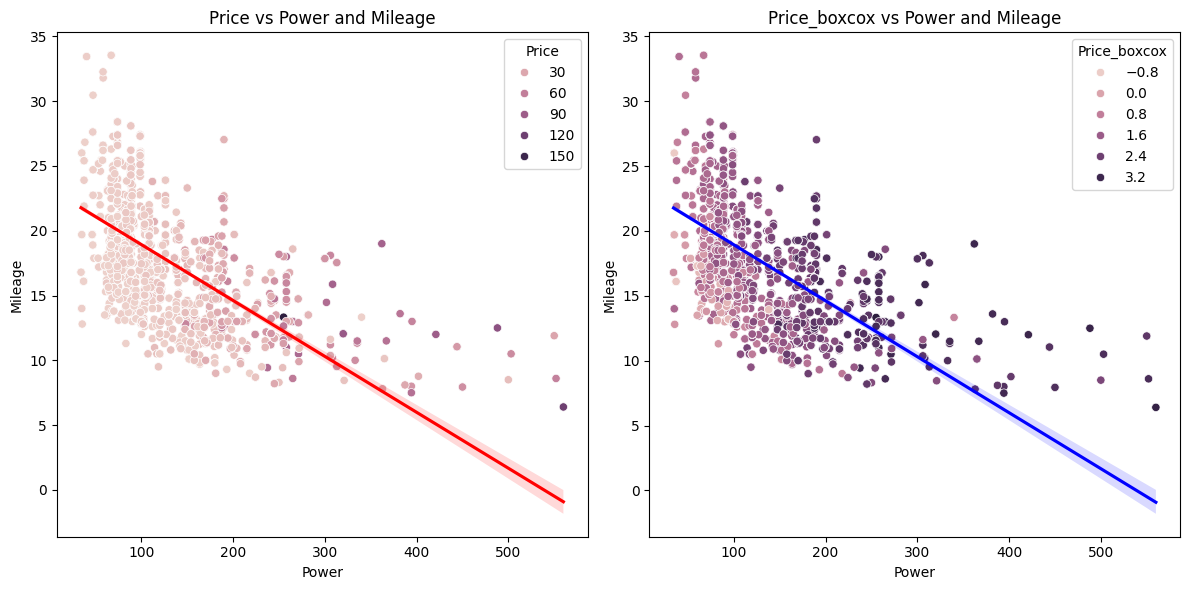

In [ ]:
# Set up the figuresize with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot for 'Price'
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_new, x='Power', y='Mileage', hue='Price')
sns.regplot(data=data_new, x='Power', y='Mileage', scatter=False, line_kws={'color': 'red'})
plt.title('Price vs Power and Mileage')

# Second subplot for 'Price_boxcox'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_new, x='Power', y='Mileage', hue='Price_boxcox')
sns.regplot(data=data_new, x='Power', y='Mileage', scatter=False, line_kws={'color': 'blue'})
plt.title('Price_boxcox vs Power and Mileage')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Observations:** Almost identical to Engine and Mileage, there is a clear negative relationship with a decrease in Mileage as Power values increase. The most affortable cars are assoicated with high mileage values and low power values.

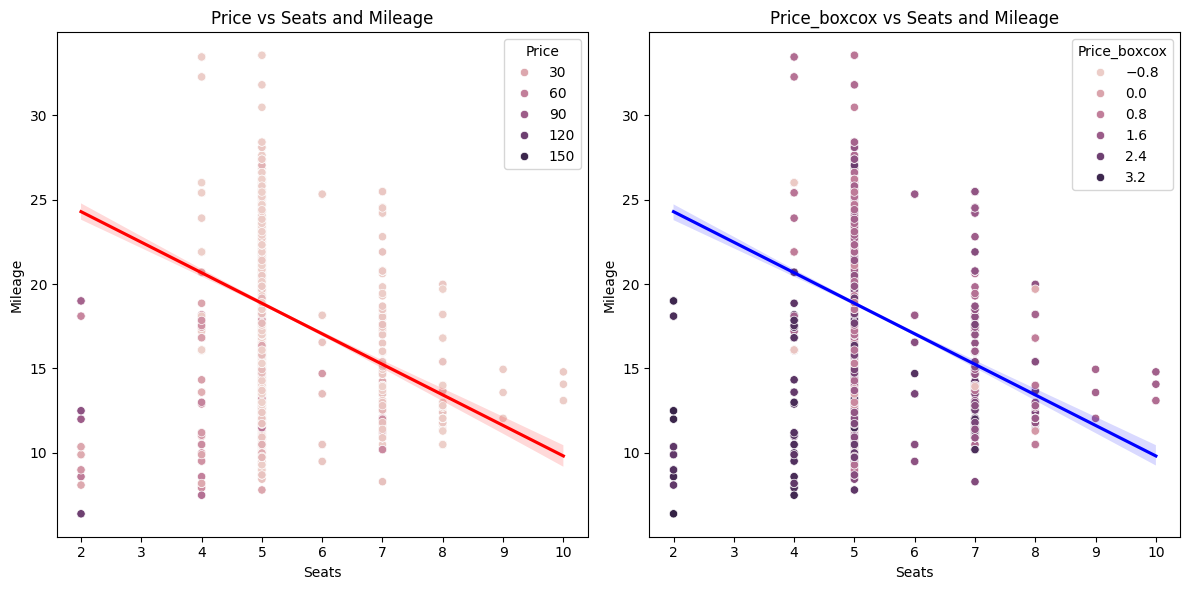

In [ ]:
# Set up the figuresize with 1 row and 2 columns
plt.figure(figsize=(12, 6))

# First subplot for 'Price'
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data_new, x='Seats', y='Mileage', hue='Price')
sns.regplot(data=data_new, x='Seats', y='Mileage', scatter=False, line_kws={'color': 'red'})
plt.title('Price vs Seats and Mileage')

# Second subplot for 'Price_boxcox'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=data_new, x='Seats', y='Mileage', hue='Price_boxcox')
sns.regplot(data=data_new, x='Seats', y='Mileage', scatter=False, line_kws={'color': 'blue'})
plt.title('Price_boxcox vs Seats and Mileage')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Observations** This is the inverse of Engine and Seats visualized before. There is a pattern of cars with more seats havig lower mileage values, however there are many outliers, especially for the 2 seater cars that have among the lowest Mileage values. In terms of price, 2 seaters seem to be the most expensive, while the rest of the cars prices seem more evenly distirbuted with car seat numbers.


##### Cataorical features

In [ ]:
# Defining a function for stacked barplot, including the visualization of crosstab tabels for easier interpretation

# Predictor and target are columns of the catagorical variables
def stacked_barplot(data, perdictor, target):
  count = data_new[perdictor].nunique() #calculating the unique values for our predictor column
  sorter = data_new[target].value_counts().index[-1] #using the target variable as sorter, (most frequent to least frequent

  # creating a crosstab called tab1
  tab1 = pd.crosstab(data_new[perdictor], data_new[target]).sort_values(by = sorter, ascending = False) # use the sorter previousle definde in descending order
  print(tab1)
   # creating another crosstab called tab, where we normalize the results based on the index. So instead of the counts here, we see proprotions
  tab = pd.crosstab(data_new[perdictor], data_new[target], normalize = 'index').sort_values(by = sorter, ascending = False)

  tab.plot(kind='bar', stacked = True, figsize = (count +1, 5)) #figsize = (count +1 using the number of predictor +1. If the number of values in predictor increases, so will the plot automatically

  #adding a legend if we use loc='upper left'
  #frameon = True will set a frame around the legend
  plt.legend(loc='upper left', bbox_to_anchor = (1,1), frameon = True)

##### Brands & Price

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with a 'Car_Age' column and a 'Price' column.

# Calculate the average price per car age
avg_price_per_age = data_new.groupby('Car_Age')['Price'].mean().reset_index()

# Rename the columns for clarity
avg_price_per_age.columns = ['Car_Age', 'Average_Price']

# Display the new DataFrame
print(avg_price_per_age)


    Car_Age  Average_Price
0         4      19.464118
1         5      15.726141
2         6      13.677509
3         7      11.719096
4         8      11.215538
5         9       9.639360
6        10       8.699353
7        11       7.324724
8        12       6.831931
9        13       5.515497
10       14       5.177727
11       15       3.923064
12       16       3.204000
13       17       3.355897
14       18       2.026842
15       19       1.941290
16       20       2.440000
17       21       1.294000
18       22       1.543750
19       23       1.175000
20       24       0.835000
21       25       1.432500


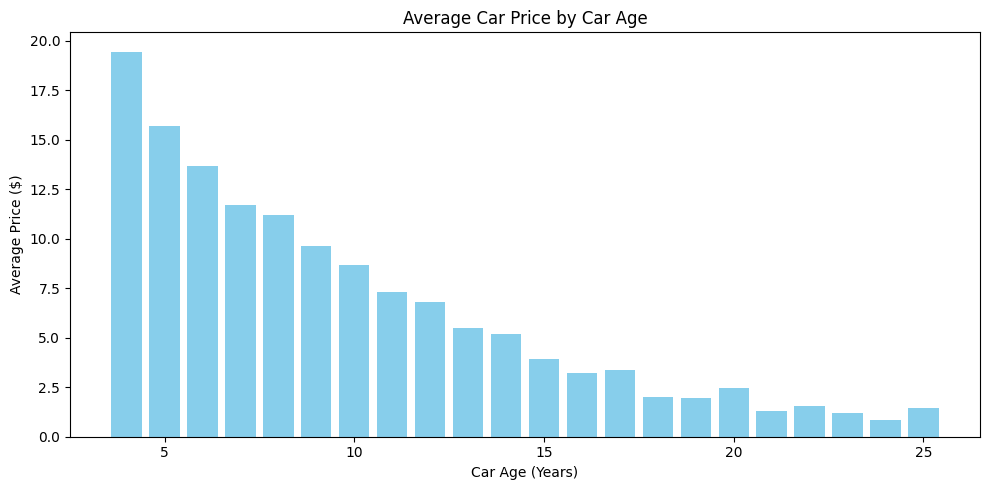

In [ ]:
import matplotlib.pyplot as plt

# Assuming avg_price_per_age is the DataFrame you've created above

# Create a bar plot for the average price per car age
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(avg_price_per_age['Car_Age'], avg_price_per_age['Average_Price'], color='skyblue')

# Set title and labels
plt.title('Average Car Price by Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Average Price ($)')

# Optionally, you can format the x-axis ticks to show every car age, if they are not too many and it's clear
# plt.xticks(avg_price_per_age['Car_Age'].unique())

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot


As Brand is an importat factor when it comes to determine the price of a vehicle. As discussed during Univariate Analysis there seems to be a relationship with luxury brands (priced at higher values), as well as increased power and engine and decreased mileage.

Transmission   Automatic  Manual
Brand                           
Mercedes-Benz        300      18
BMW                  266       0
Audi                 236       0
Hyundai              148     959
Honda                130     478
Toyota                99     312
Maruti                99    1112
Skoda                 93      80
Land                  59       1
Volkswagen            59     256
Jaguar                40       0
Ford                  39     261
Mahindra              28     244
Mini                  25       1
Volvo                 20       1
Renault               18     127
Porsche               17       1
Nissan                12      79
Tata                  11     175
Chevrolet              9     112
Mitsubishi             6      21
Lamborghini            1       0
Jeep                   1      14
Isuzu                  1       2
Smart                  1       0
Bentley                1       0
Force                  0       3
Fiat                   0      28
Datsun    

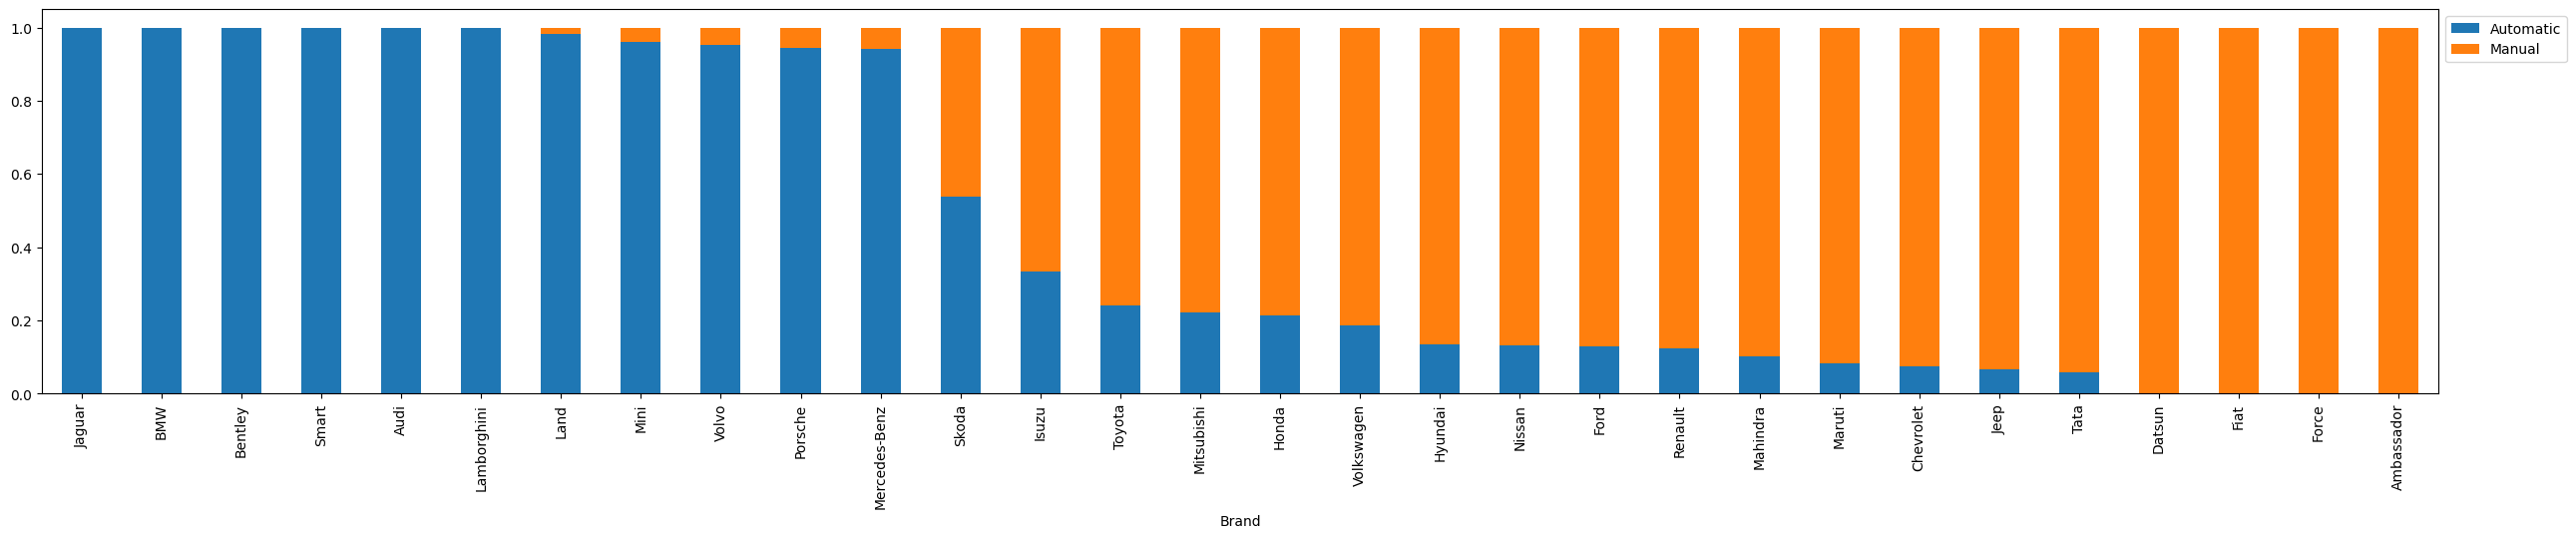

In [ ]:
stacked_barplot(data_new, 'Brand', 'Transmission')

**Observation:** Almost all luxury cars use automatic transmission - which was also priced higher than manual transmission, further supporting this trend.

Fuel_Type      CNG  Diesel  Electric  LPG  Petrol
Brand                                            
Toyota           1     311         1    0      98
Mahindra         0     261         1    0      10
Ambassador       0       1         0    0       0
Audi             0     217         0    0      19
Volkswagen       0     168         0    0     147
Tata             2     117         0    0      67
Smart            0       1         0    0       0
Skoda            0      94         0    0      79
Renault          0      96         0    0      49
Porsche          0      11         0    0       7
Nissan           0      56         0    0      35
Mitsubishi       0      22         0    0       5
Mini             0      13         0    0      13
Mercedes-Benz    0     239         0    0      79
Maruti          49     464         0    5     693
Land             0      59         0    0       1
Lamborghini      0       0         0    0       1
Jeep             0      14         0    0       1


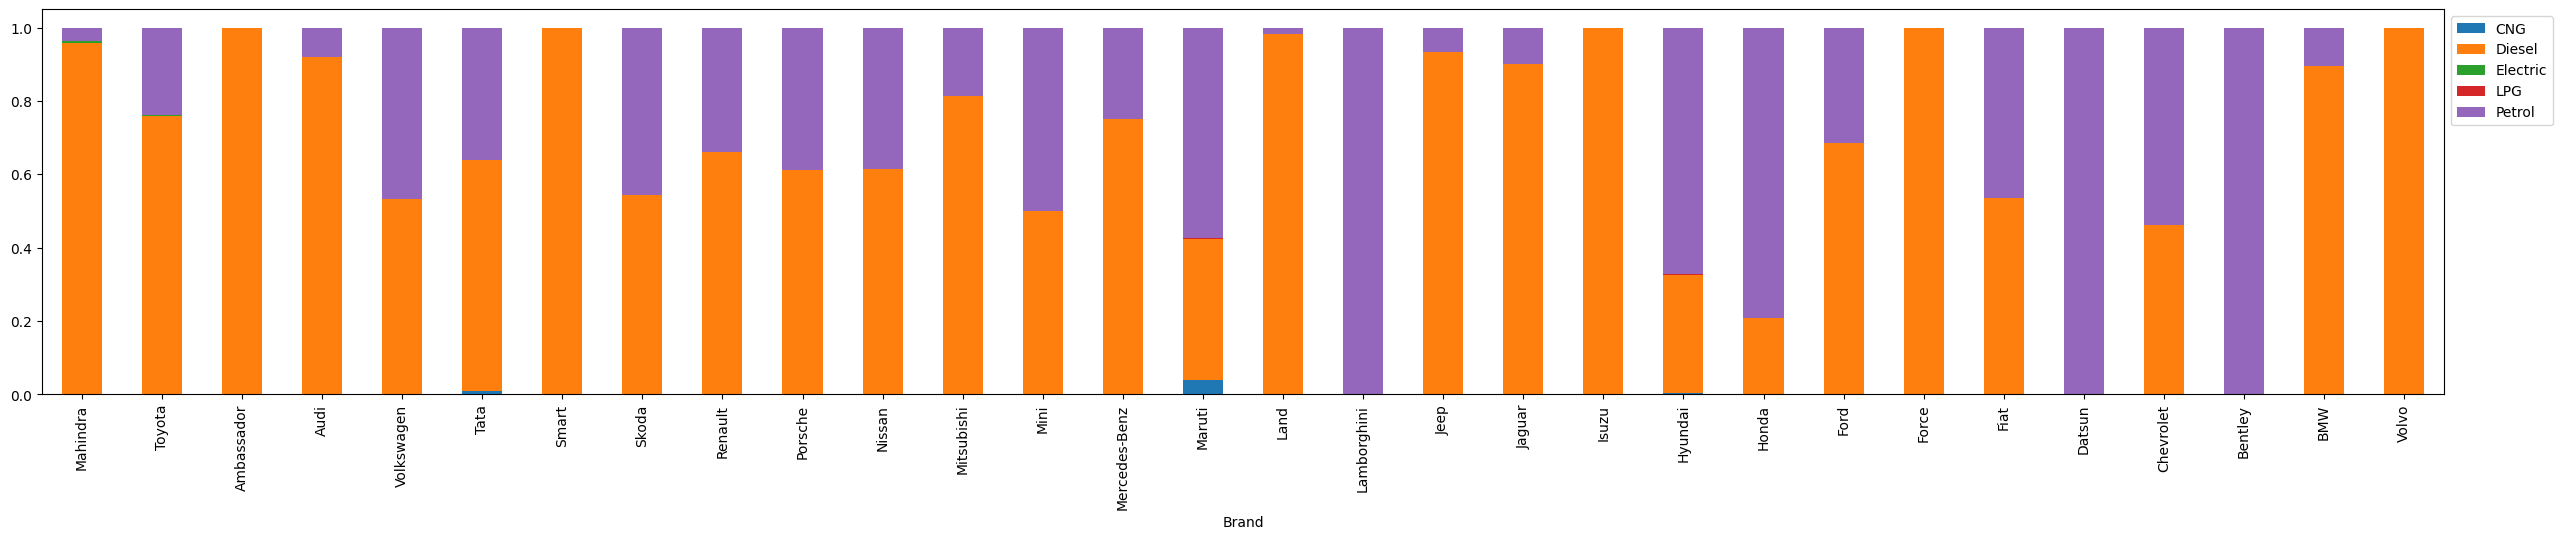

In [ ]:
stacked_barplot(data_new, 'Brand', 'Fuel_Type')

**Observations:** All car brands sue either Diesel or Petrol. Martui and Tata are the only two brands that sell vehciles using gas fuel. Bentley, Lamborghini and Datsun only sell Petrol vehicles in this dataset.

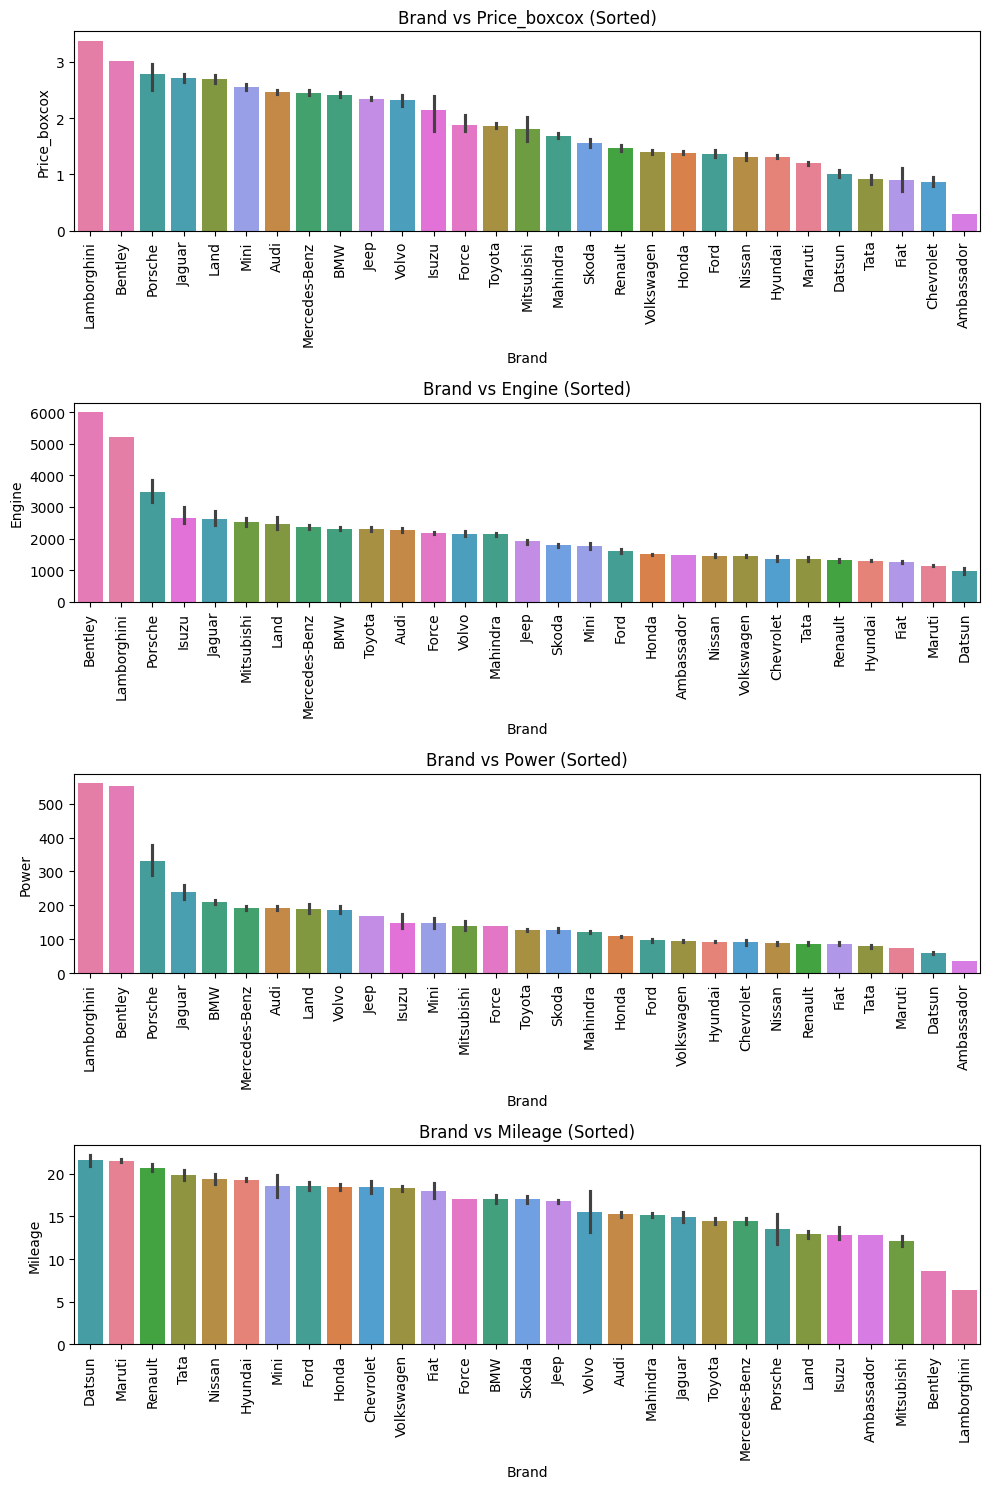

In [ ]:
# Function to plot sorted barplot
def sorted_barplot(data, x, y, hue, ax, title):
    order = data.groupby(x)[y].mean().sort_values(ascending=False).index
    sns.barplot(data=data_new, x=x, y=y, hue=hue, order=order, ax=ax)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Features to compare with 'Brand'
features = ['Price_boxcox','Engine', 'Power','Mileage']

# Creating subplots
fig, axes = plt.subplots(len(features), 1, figsize=(10, 15))

for i, feature in enumerate(features):
    sorted_barplot(data=data_new, x='Brand', y=feature, hue='Brand', ax=axes[i], title=f'Brand vs {feature} (Sorted)')

plt.tight_layout()
plt.show()


**Observations:** Here it is clearly visualized, that certain Brands (Lambroghini, Bently, Porsche, Jaguar, Mercedez-Benz, BMW, Audi - and perhaps Land Rover) are associated with very high prices, increased Engine and Power values and decreased Mileage.

In [ ]:
 # Group Values by 'Brand' and apply aggregation function to display several values for Price concerning the Brand
brand_stats_price = data_new.groupby('Brand').agg({
    'Price': ['max', 'min', 'mean', 'median', 'count'],
    'Power': ['max', 'min', 'mean', 'median'],
    'Engine': ['max', 'min', 'mean', 'median'],
    'Mileage': ['max', 'min', 'mean', 'median'],
    })

# Sort values by highest mean price
brand_stats_price_sorted = brand_stats_price.sort_values(by = ('Price', 'max'), ascending=False)
brand_stats_price_sorted

Price                                      Power          \
                  max     min        mean   median count     max     min   
Brand                                                                      
Land           160.00   11.00   39.259500   35.000    60  335.30  115.00   
Lamborghini    120.00  120.00  120.000000  120.000     1  560.00  560.00   
Jaguar         100.00   16.00   37.632250   31.900    40  503.00  177.00   
BMW             93.67    6.30   25.093684   21.000   266  450.00  143.00   
Mercedes-Benz   90.00    3.90   26.809874   24.000   318  421.00  107.30   
Porsche         75.00    2.02   48.348333   47.020    18  550.00  240.00   
Audi            72.94    7.50   25.537712   23.500   236  444.00  132.00   
Bentley         59.00   59.00   59.000000   59.000     1  552.00  552.00   
Ford            56.80    0.69    6.889400    5.345   300  395.00   67.00   
Mini            39.75   17.00   26.896923   24.285    26  192.00  112.00   
Toyota          35.82    1.50   11.580024   10.750   411  178.40   67.04   
Volvo           32.50    7.25   18.802857   18.250    21  215.00  150.00   
Mitsubishi      28.00    1.00   11.058889    9.950    27  199.30   68.00   
Skoda           27.30    1.25    7.559075    6.000   173  262.60   66.00   
Volkswagen      24.90    2.10    5.307270    4.890   315  189.00   73.75   
Jeep            23.91   15.00   18.718667   18.500    15  170.00  160.00   
Hyundai         23.00    0.45    5.343433    4.600  1107  198.25   55.00   
Isuzu           20.00    8.00   14.696667   16.090     3  174.57  134.00   
Tata            17.85    0.44    3.562849    2.900   186  154.00   35.00   
Mahindra        17.63    1.50    8.045919    7.570   272  184.00   41.00   
Honda           17.50    0.90    5.411743    4.950   608  218.00   78.00   
Renault         14.01    2.40    5.799034    5.490   145  148.00   53.30   
Force           12.00    8.00    9.333333    8.000     3  139.07  139.01   
Maruti          11.50    0.45    4.517267    4.150  1211  163.50   34.20   
Chevrolet        9.87    0.75    3.044463    2.500   121  163.70   56.30   
Nissan           8.92    1.75    4.738352    4.300    91  179.50   63.10   
Fiat             7.71    0.55    3.269286    2.600    28  112.40   67.00   
Datsun           3.95    2.25    3.049231    3.100    13   67.06   53.00   
Smart            3.00    3.00    3.000000    3.000     1     NaN     NaN   
Ambassador       1.35    1.35    1.350000    1.350     1   35.50   35.50   

                                   Engine                               \
                     mean  median     max     min         mean  median   
Brand                                                                    
Land           189.602105  187.70  4367.0  1999.0  2475.719298  2179.0   
Lamborghini    560.000000  560.00  5204.0  5204.0  5204.000000  5204.0   
Jaguar         239.075250  212.55  5000.0  1999.0  2623.150000  2179.0   
BMW            209.635249  190.00  4395.0  1995.0  2320.655172  1995.0   
Mercedes-Benz  193.579873  185.50  5461.0  1595.0  2372.254717  2143.0   
Porsche        331.287500  300.00  4806.0  2706.0  3479.666667  2967.0   
Audi           192.106043  174.33  4134.0  1395.0  2281.758475  1968.0   
Bentley        552.000000  552.00  5998.0  5998.0  5998.000000  5998.0   
Ford            96.755593   89.84  4951.0   999.0  1597.603333  1498.0   
Mini           147.438462  117.99  1998.0  1496.0  1766.615385  1798.0   
Toyota         128.921063  138.00  2982.0  1197.0  2311.519512  2494.0   
Volvo          187.380952  190.00  2400.0  1969.0  2160.238095  1985.0   
Mitsubishi     140.134815  118.60  3200.0  1468.0  2537.185185  2477.0   
Skoda          126.737442  108.50  3597.0  1198.0  1786.393064  1798.0   
Volkswagen      94.671592  103.20  1984.0   999.0  1442.161905  1498.0   
Jeep           169.333333  170.00  1956.0  1368.0  1916.800000  1956.0   
Hyundai         92.229726   82.00  2359.0   814.0  1306.340909  1197.0   
Isuzu          147.523333  

**Observations** Above trend is confirmed numerically, here we can clearly see a drop in Price, Power and Engine values after Land Rover. However, the Brand Ford is an outlier here as it is not highly prices as the above. Therefore it can be concluded that luxury cars are: Lambroghini, Bently, Porsche, Jaguar, Mercedez-Benz, BMW, Audi and Land Rover. Additionally, these brands are mostly of automatic transmission and do not use Gas Type fuel.

NOTE: Smart is the only Brand that occurs once and has missing values for Power, Engine and Mileage. Hence these values cannot be filled using Brand / Model average or median and as such will be dropped:

In [ ]:
Smart = data_new[data_new['Brand'] == 'Smart']
Smart

Name Location  Kilometers_Driven Fuel_Type Transmission  \
915  Smart Fortwo CDI AT     Pune             103000    Diesel    Automatic   

    Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  Brand  \
915     Second      NaN   799.0    NaN    2.0    3.0       15  Smart   

     Price_boxcox  Kilometers_Driven_boxcox  
915      1.009546                199.877888

In [ ]:
# Dropping Smart Vechile from the DataSet
data_new = data_new.drop(index=915)

##### Location

In [ ]:
# Plotting a stacked barplot for Location and Car Age
stacked_barplot(data_new, 'Price', 'Car_Age')

Car_Age     4    5    6    7    8    9   10  11  12  13  ...  16  17  18  19  \
Location                                                 ...                   
Jaipur       1    8   43   40   54   50  42  35  31  29  ...  12  11   8   6   
Pune         1   22   42   57   58   65  73  78  55  50  ...  21  12  11   7   
Ahmedabad    1    7   18   25   33   37  27  26  13  10  ...   5   0   2   1   
Bangalore    0    4   12   39   45   72  52  40  29  19  ...   7   5   5   1   
Chennai      3    6   24   66   46   43  38  59  59  33  ...  20  19   8   6   
Coimbatore  46   77  126  114   79   62  47  36  23  10  ...   2   0   1   2   
Delhi        1   12   36   55   77   99  84  71  56  28  ...   2   7   1   0   
Hyderabad    1   15   59   81   88   86  88  89  59  62  ...  30  12   8   4   
Kochi       43  102  114  110   88   78  40  32  22  10  ...   1   3   0   1   
Kolkata      2   17   30   49   69   90  78  56  52  42  ...   7   1   6   0   
Mumbai       3   28   82  105  107  115 

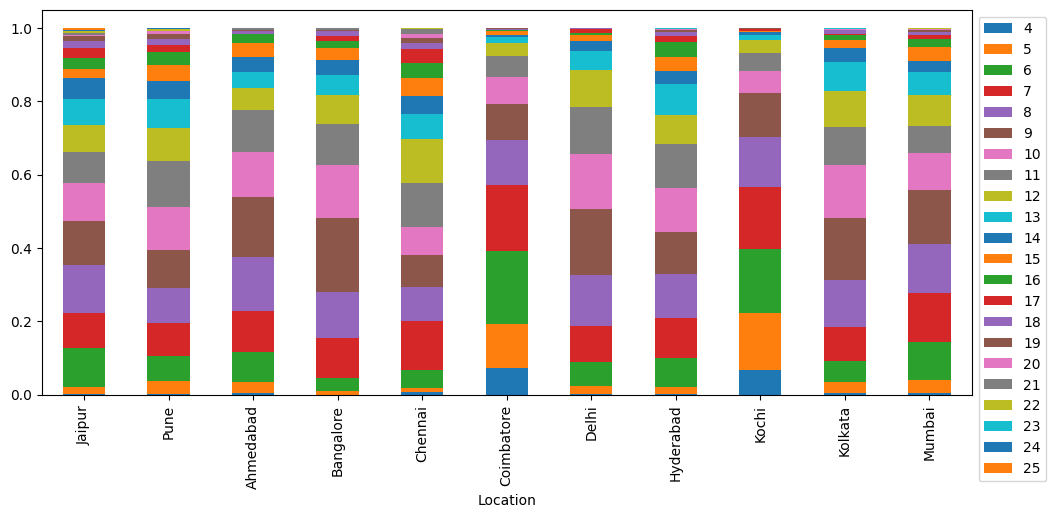

In [ ]:
# Plotting a stacked barplot for Location and Car Age
stacked_barplot(data_new, 'Location', 'Car_Age')

**Observations:** Car Ages are evenly distributed across locations. Most Cars are between 9 - 6 years old.

In [ ]:
# Group by location and aggregate statistics
data_loc_grouped = data_new.groupby('Location').agg(Price_Mean=('Price', 'mean'),
                                                    Price_Max=('Price', 'max'),
                                                    Total_Price=('Price', 'count'))

# Sort the grouped DataFrame by mean price in descending order
data_loc_ordered = data_loc_grouped.sort_values(by='Price_Mean', ascending=False)

data_loc_ordered

Price_Mean  Price_Max  Total_Price
Location                                      
Coimbatore   15.078223      93.67          636
Bangalore    13.328631      93.00          358
Kochi        11.179186      97.07          651
Hyderabad     9.776550     160.00          742
Delhi         9.707726     120.00          554
Mumbai        9.429329      75.00          790
Ahmedabad     8.457321      85.00          224
Chennai       7.637505      70.00          493
Pune          6.732254      68.00          621
Jaipur        5.809225      42.50          413
Kolkata       5.661215      75.00          535

**Observations:** The cities with the highest average of car sales prices are Coimbatore, Bagalore and Kochi. This could also be due to the extrene price outliers observed earlier in this notebook, influencing the mean. Additionally Pune, Jaipur and Kolkata all have the lowest sales price average. Pune also has a significant level of gas fuel type cars in this data set, indicating that more affortable cars are more common in that city.

In [ ]:
# Group by location and aggregate statistics
data_loc_grouped = data_new.groupby('Location').agg(Average_km_driven=('Price', 'mean'),
                                                    Total_km_driven=('Price', 'count'))

# Sort the grouped DataFrame by mean price in descending order
data_loc_ordered = data_loc_grouped.sort_values(by='Average_km_driven', ascending=False)

data_loc_ordered

Average_km_driven  Total_km_driven
Location                                      
Coimbatore          15.078223              636
Bangalore           13.328631              358
Kochi               11.179186              651
Hyderabad            9.776550              742
Delhi                9.707726              554
Mumbai               9.429329              790
Ahmedabad            8.457321              224
Chennai              7.637505              493
Pune                 6.732254              621
Jaipur               5.809225              413
Kolkata              5.661215              535

Fuel_Type   CNG  Diesel  Electric  LPG  Petrol
Location                                      
Chennai       2     288         1    0     202
Mumbai       17     313         1    1     458
Ahmedabad     3     138         0    0      83
Bangalore     0     219         0    0     139
Coimbatore    0     356         0    0     280
Delhi        10     306         0    0     238
Hyderabad     3     506         0    6     227
Jaipur        0     230         0    2     181
Kochi         8     304         0    0     339
Kolkata       0     256         0    0     279
Pune         13     287         0    1     320


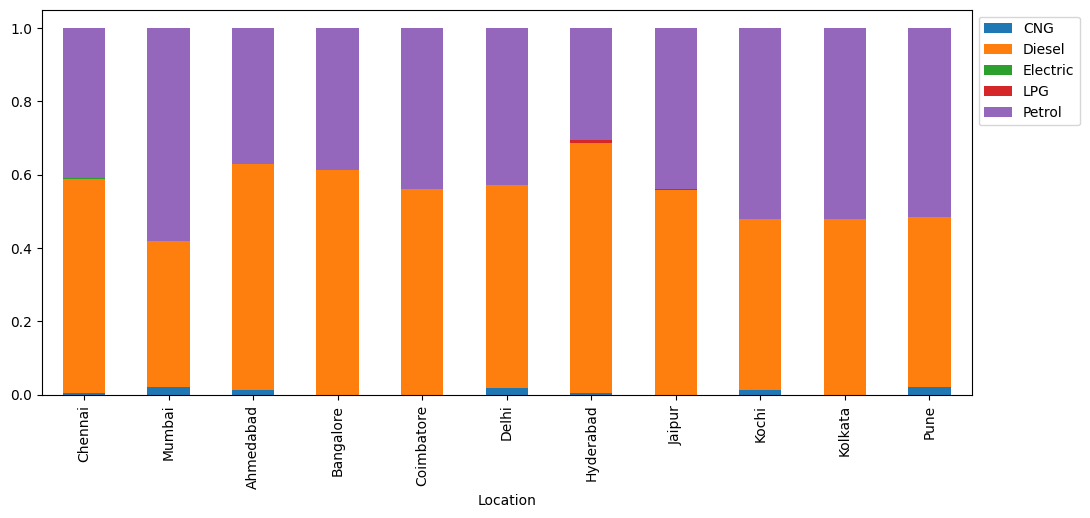

In [ ]:
stacked_barplot(data_new, 'Location', 'Fuel_Type')

**Observations::** Due to their low values, LPG and Electirc cars are not visible on the chart. However, cities with the highest priced vehicles Coimbatore and Bangalore sell no Gas Type vechiles. In addition, cars using CNG are mostly found in Mumbai, Pune and Dehli, while the city with most LNG fuel cars is Hyderabad. Hyderabad is also the city with this most sold Diesel vehicles. Since Diesel is cheaper than Petrol, it could be an indicator of demographic.

In [ ]:
data_new.groupby(['Location'])['Kilometers_Driven_boxcox'].agg(Average_km_driven='mean', km_driven='count',)


Average_km_driven  km_driven
Location                                
Ahmedabad          153.355103        224
Bangalore          155.674143        358
Chennai            169.586293        493
Coimbatore         143.726123        636
Delhi              155.799764        554
Hyderabad          166.852050        742
Jaipur             167.619031        413
Kochi              141.101000        651
Kolkata            136.733277        535
Mumbai             138.252452        790
Pune               165.794524        621

##### Transmission:

Transmission  Automatic  Manual
Car_Age                        
7                   229     512
9                   225     572
8                   221     523
6                   197     389
10                  180     469
11                  147     433
12                  132     334
5                   107     191
13                   77     265
14                   67     131
4                    46      56
15                   41     132
16                   20     105
17                   11      67
18                    9      48
19                    6      25
20                    2      15
25                    1       3
21                    0      15
22                    0       8
23                    0       4
24                    0       2


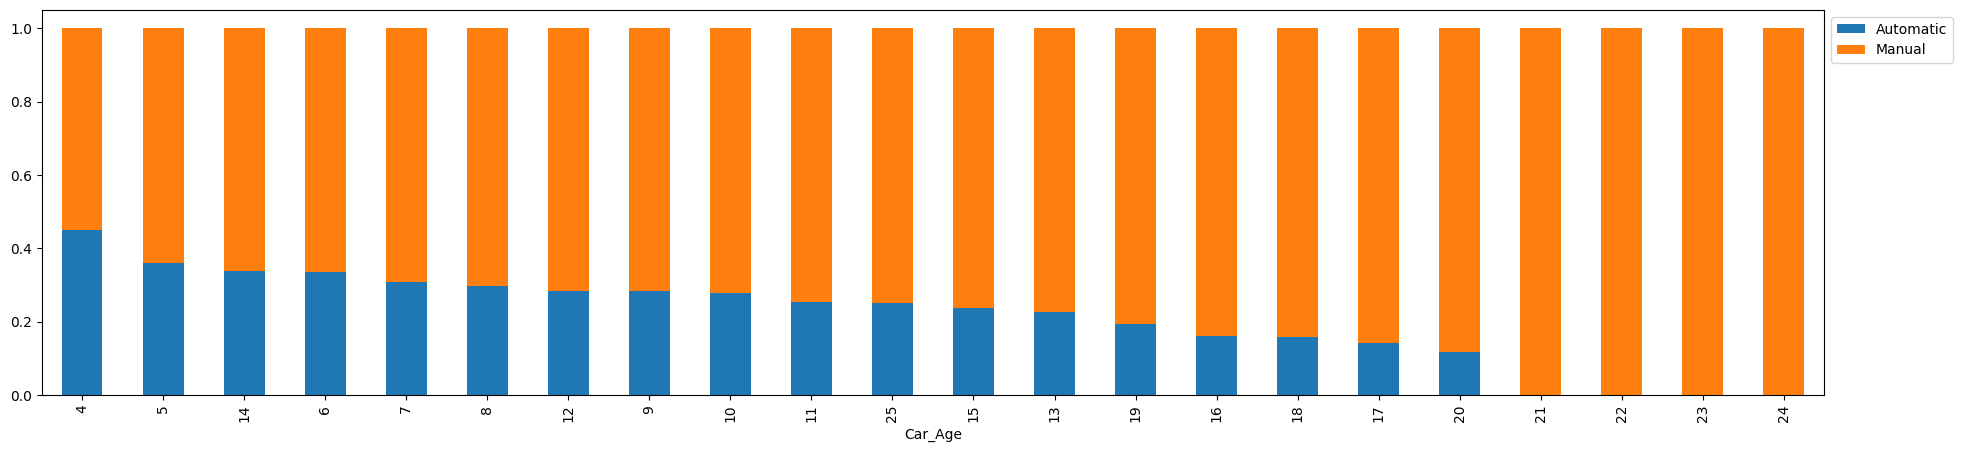

In [ ]:
stacked_barplot(data_new, 'Car_Age', 'Transmission')

**Observations:** Car aged 21 - 24 are purely manual. Yet as Cars decrease in age, the equilibrium between manual and automatic cars stabilizes. There youngest models with 4 ears have almost a 50/50 split of manual and automatic cars sold.

Transmission  Automatic  Manual
Seats                          
5.0                1422    3592
7.0                 201     473
4.0                  62      37
2.0                  14       1
8.0                   6     128
6.0                   4      27
9.0                   0       3
10.0                  0       5


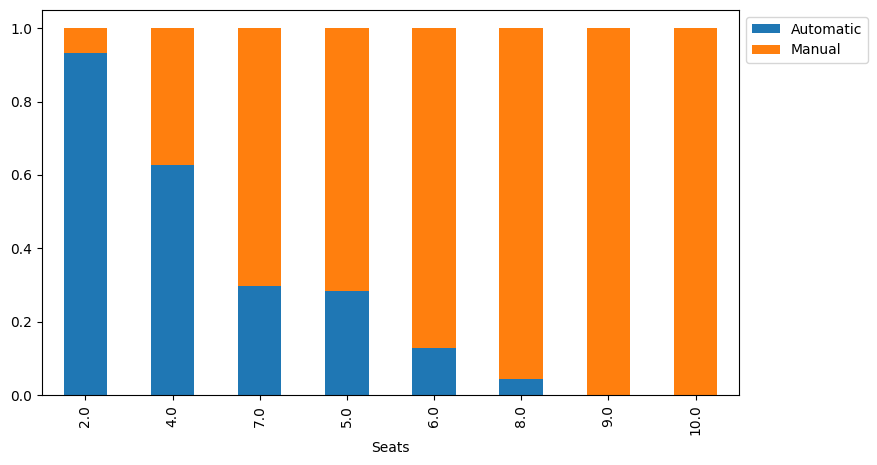

In [ ]:
stacked_barplot(data_new, 'Seats', 'Transmission')

**Observation:** Clear trend of decrease in vehicle seat number with an increase of automatic transmission. This further strengthens the assumption that less seats are also equivalent to more expensive cars as automatic transmission is also priced higer than manual.

Owner_Type  First  Fourth & Above  Second  Third
Car_Age                                         
15             81               2      79     11
16             65               2      43     15
22              2               1       2      3
18             30               1      21      5
13            236               1      97      8
14            116               1      68     13
17             34               1      33     10
24              1               0       1      0
23              2               0       2      0
21              5               0       4      6
20              5               0       7      5
19             11               0      17      3
4             102               0       0      0
5             291               0       7      0
12            336               0     116     14
11            459               0     108     13
10            528               0     118      3
9             693               0     104      0
8             661   

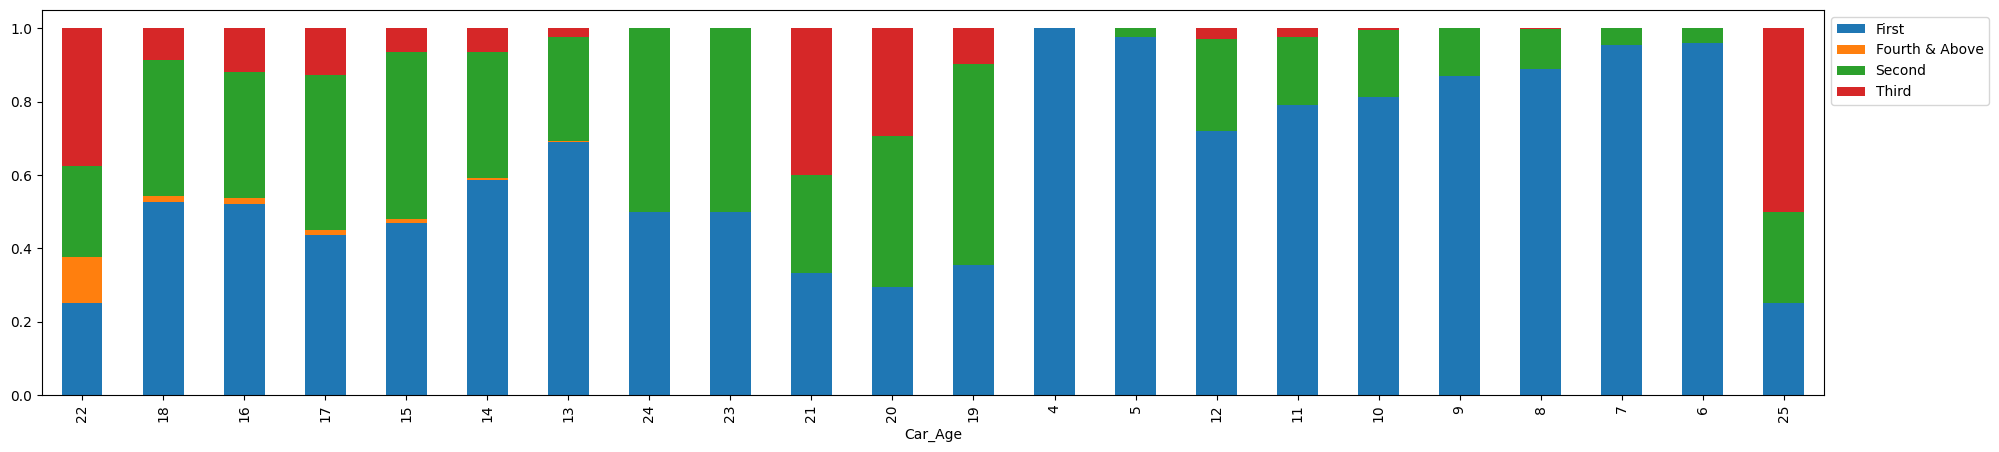

In [ ]:
stacked_barplot(data_new, 'Car_Age', 'Owner_Type')

**Observations:** The oldest vehicles have had the most previous owners, which was to be expected. 20,21,22 and 25 years of age for car models in this dataset have had the highest amounts of previous owners.

### **Feature Engineering**

#### **Missing value treatment**

In [ ]:
# Looking at ovierview of missing values to treat
data_new.isnull().sum()

Name                          0
Location                      0
Kilometers_Driven             0
Fuel_Type                     0
Transmission                  0
Owner_Type                    0
Mileage                      69
Engine                       37
Power                       142
Seats                        42
Price                         0
Car_Age                       0
Brand                         0
Price_boxcox                  0
Kilometers_Driven_boxcox      0
dtype: int64

**Observations:** Since the missing values are all for fixed values across vehicle production, these missing values could be filled out by:

1. Looking for vechiles of the same Name and filling out the missing values, as they are equal if the vehicles are of the same Brand and Model
2. If no vehicle in the dataset exists that has the missing values for the exact vehicle it can be filled out using the:
  - Mean of the Brand / Model
  - Median of the Brand / Model
  - Mode of Brand / Model

##### Seats

In [ ]:
#Revising Missing values for Seats
missing_values_seats = data[data['Seats'].isnull()]
missing_values_seats.sorted = missing_values_seats.sort_values(by='Name', ascending=True)
missing_values_seats.sorted

Name    Location  \
3520                       BMW 5 Series 520d Sedan       Delhi   
3272                       BMW 5 Series 520d Sedan      Mumbai   
2623                       BMW 5 Series 520d Sedan        Pune   
2530                       BMW 5 Series 520d Sedan       Kochi   
4577                       BMW 5 Series 520d Sedan       Delhi   
4697                        Fiat Punto 1.2 Dynamic       Kochi   
4011                        Fiat Punto 1.3 Emotion        Pune   
4952                        Fiat Punto 1.4 Emotion     Kolkata   
3800                   Ford Endeavour Hurricane LE      Mumbai   
229                               Ford Figo Diesel   Bangalore   
3810                   Honda CR-V AT With Sun Roof     Kolkata   
1294                             Honda City 1.3 DX       Delhi   
1917                            Honda City 1.5 EXI      Jaipur   
5270                            Honda City 1.5 GXI   Bangalore   
194                             Honda City 1.5 GXI   Ahmedabad   
1385                            Honda City 1.5 GXI        Pune   
4604                     Honda Jazz Select Edition        Pune   
3522               Hyundai Santro GLS II - Euro II       Kochi   
2542               Hyundai Santro GLS II - Euro II   Bangalore   
2780               Hyundai Santro GLS II - Euro II        Pune   
2842               Hyundai Santro GLS II - Euro II   Bangalore   
2096                     Hyundai Santro LP zipPlus  Coimbatore   
4712                        Hyundai Santro Xing XG        Pune   
4229                        Hyundai Santro Xing XG   Bangalore   
749                   Land Rover Range Rover 3.0 D      Mumbai   
4152                  Land Rover Range Rover 3.0 D      Mumbai   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore   
3882                             Maruti Estilo LXI     Kolkata   
5893                             Maruti Estilo LXI     Chennai   
2369                             Maruti Estilo LXI     Chennai   
2074                          Maruti Swift 1.3 LXI        Pune   
5185                          Maruti Swift 1.3 LXI       Delhi   
2325                      Maruti Swift 1.3 VXI ABS        Pune   
2668                          Maruti Swift 1.3 VXi     Kolkata   
2335                          Maruti Swift 1.3 VXi      Mumbai   
733                           Maruti Swift 1.3 VXi     Chennai   
208                           Maruti Swift 1.3 VXi     Kolkata   
5015                          Maruti Swift 1.3 VXi       Delhi   
3404                          Maruti Swift 1.3 VXi      Jaipur   
1327                          Maruti Swift 1.3 ZXI   Hyderabad   
2737                             Maruti Wagon R Vx      Jaipur   
2264                           Toyota Etios Liva V        Pune   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
3520              90000    Diesel    Automatic           First    18.48   
3272              81000    Diesel    Automatic          Second    18.48   
2623              95000    Diesel    Automatic          Second    18.48   
2530              64158    Diesel    Automatic           First    18.48   
4577              72000    Diesel    Automatic           Third    18.48   
4697              17941    Petrol       Manual           First    15.70   
4011              45271    Diesel       Manual           First    20.30   
4952              47000    Petrol       Manual           First    14.60   
3800             129000    Diesel    Automatic           First    12.80   
229               70436    Diesel       Manual           First      NaN   
3810              27000    Petrol    Automatic           First    14.00   
1294              55005    Petrol       Manual           First    12.80   
1917              88000    Petrol       Manual          Second    13.00   
5270              53000    Petrol       Manual          Second      NaN   
194               60006    Petrol       Manual           First      NaN   
1385   

**Observations:** There are 42 rows with missing data for Seats. Most of these rows also have missig values for Engine, Power and Mileage. It could be considered to drop these rows, or replace the Seats value with the Seats value for the same Brand and Model Type.

In [ ]:
# Fill missing 'Seats' based on the mode of 'Seats' for each vehicle 'Name', if there is no vechile name, it will be left as empty.
data_new['Seats'] = data_new.groupby('Name')['Seats'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Check if there are any missing values left
print(data_new['Seats'].isnull().sum())


36


**Observations:** After using the same Name to fill out the missing values for column Seats, the missing values were only reduced from 42 to 36.

##### Mileage

In [ ]:
# Fill missing 'Seats' based on the mode of 'Seats' for each vehicle 'Name'
data_new['Mileage'] = data_new.groupby('Name')['Mileage'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Check if there are any missing values left
print(data_new['Mileage'].isnull().sum())


66


**Observations:** After using the same Name to fill out the missing values for column Mileage, the missing values were only reduced from 69 to 66.

##### Engine

In [ ]:
# Fill missing 'Seats' based on the mode of 'Seats' for each vehicle 'Name'
data_new['Engine'] = data_new.groupby('Name')['Engine'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Check if there are any missing values left
print(data_new['Engine'].isnull().sum())


32


**Observations:** After using the same Name to fill out the missing values for column Engine, the missing values were only reduced from 37 to 32.

##### Power


In [ ]:
# Fill missing 'Seats' based on the mode of 'Seats' for each vehicle 'Name'
data_new['Power'] = data_new.groupby('Name')['Power'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Check if there are any missing values left
print(data_new['Power'].isnull().sum())


112


**Observations:** After using the same Name to fill out the missing values for column Power, the missing values were reduced from 142 to 112.

##### Using Median of Brands to fill in missing values

Since especially Engine, Mileage and Power vary depending on the Brand, visualizing and treating these missing values by Brand may be beneficial.

In [ ]:
# Creating a security copy of data set before using statistical imputation methods to fill in missing values
df = data_new.copy()

In [ ]:
# Looking at ovierview of missing values to treat
df.isnull().sum()

Name                          0
Location                      0
Kilometers_Driven             0
Fuel_Type                     0
Transmission                  0
Owner_Type                    0
Mileage                      66
Engine                       32
Power                       112
Seats                        36
Price                         0
Car_Age                       0
Brand                         0
Price_boxcox                  0
Kilometers_Driven_boxcox      0
dtype: int64

In [ ]:
# Select only the columns of interest for missing values
columns_missing_values = ['Seats', 'Mileage', 'Power', 'Engine']

missing_values_by_brand = df[columns_missing_values].isnull().groupby(df['Brand']).sum().reset_index()
missing_values_by_brand

Brand  Seats  Mileage  Power  Engine
0      Ambassador      0        0      0       0
1            Audi      0        1      1       0
2             BMW      5        0      5       5
3         Bentley      0        0      0       0
4       Chevrolet      0        0      1       0
5          Datsun      0        0      0       0
6            Fiat      3        1      5       3
7           Force      0        0      0       0
8            Ford      2        1      5       0
9           Honda      2        0      3       2
10        Hyundai      7       32     49       7
11          Isuzu      0        0      0       0
12         Jaguar      0        0      0       0
13           Jeep      0        0      0       0
14    Lamborghini      0        0      0       0
15           Land      3        9      3       3
16       Mahindra      0        3      2       1
17         Maruti     14        1     25      11
18  Mercedes-Benz      0       12      2       0
19           Mini      0        0      0       0
20     Mitsubishi      0        0      0       0
21         Nissan      0        0      2       0
22        Porsche      0        0      2       0
23        Renault      0        0      0       0
24          Skoda      0        2      1       0
25           Tata      0        0      3       0
26         Toyota      0        3      2       0
27     Volkswagen      0        1      1       0
28          Volvo      0        0      0       0

**Observations:** The majority of misisng values per Brand are Hyundai, Maruti, and Mercedes-Benz

**Observation:**

In [ ]:
#Filling in missing values based on median per Brand as Power, Engine and Mileage are highly dependent on Brand
df['Power'] = df.groupby('Brand')['Power'].transform(lambda x: x.fillna(x.median()))
df['Seats'] = df.groupby('Brand')['Seats'].transform(lambda x: x.fillna(x.median()))
df['Engine'] = df.groupby('Brand')['Engine'].transform(lambda x: x.fillna(x.median()))
df['Mileage'] = df.groupby('Brand')['Mileage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
 df.isnull().sum()

Name                        0
Location                    0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
Price                       0
Car_Age                     0
Brand                       0
Price_boxcox                0
Kilometers_Driven_boxcox    0
dtype: int64

**Observations:** There are no more missing values. It would be beneficial to take a look at the distirbution and statistical summary again to check how filling in the missing values has affected these features.

In [ ]:
# Creating a new dataframe with only numerical columns where missing values where filled in
num_cols_miss = df[['Mileage', 'Engine', 'Power','Seats']]

# Addimg an index associated with each column, using enumerate
for i, j in enumerate(num_cols_miss):
  print(i,j)

0 Mileage
1 Engine
2 Power
3 Seats


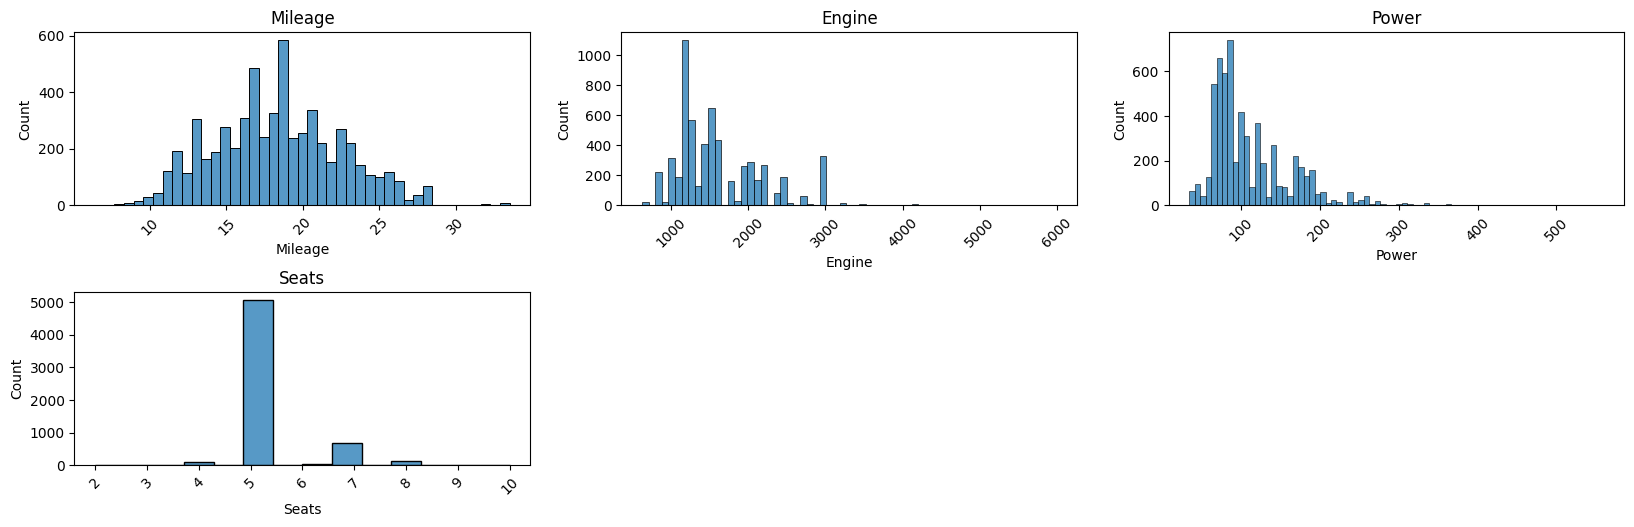

In [ ]:
# Plotting a subplot with Histogram for changed features
plt.figure(figsize=(20,9))
for i, j in enumerate(num_cols_miss):
  plt.subplot(3,3, i +1)
  sns.histplot(df[j])
  plt.title(j)
  plt.xticks(rotation=45)

# Adjusting space between the subplots to make it easier to consume
plt.subplots_adjust(hspace=0.5)

**Observations:** After filling in the missing values, the distirbution of Mileage, Engine, Power and Seats are almost identical to those of these columns without filing in missing values.

## **Important Insights from EDA and Data Preprocessing**

1. Price is highly affected by the Brand Names, with the most expesnive Brands being Lamorghini, Bently and Prosche and the cheapest being Marturi & Tata. However these Brands share more commonaleties:
  - Luxury Brands (inclduing as well Jaguar, Mercedes-Benz, BMW, Audi and Land Rover) have the highest Power and Engine values and the lowest Mileage values
  - Very economical Brands (Marturi and Tata) have the lowest Power and Engine and highest Mileage values. Additionally Marturi has a lot of Cars that use Gas Fuel Types (CGN, and LPG) which are generally also associated with lower pricing.

2. Power, Engine and Mileage values mostly affect the price of cars. There is a strong correlation between all 3 variables. As Power and Engine have the strongest correlation between themselves and all have a very negative correlation with Mileage. It seems Mileage values are the inverse of Power and Engine values. All highly affecting price.

3. The amount of Seats in a Car has an interesting relationship with the price, yet may not be the most informative. As Seat numbers increase, price also increases slightly. However all 2 seat cars (least value in seats yet high in price) are associated with high power and engine values, as well as luxury car brands, and as such stand in direct opposite with this trend. Seats does not have an important factor on the price of the vehicle itself, it is more likely that the number of seats is determined by other factors in the dataset. For example, there is a clear trend of cars with lower seat values being of mostly automatic transmission - which in itself is priced much higher than manual transmission. Or vehicles with more than 5 seats increasing in engine and power values, both of which have a strong positive correlation with price.

4. Suprisingly, the amount of kilometers driven is not as crucial as one might assume. Though there is a correlation between a decrease in price as more kilometers are driven, it is not the most influencial factor on the car price.

5. As Car Age increases, the price of the cars decrease with extreme outliers always being luxury brands - as the brand name itself adds value to the vehicles, which other Car brands do not have. This could be referred to as 'Brand Value'. Older vehicles in this dataset are also associated with the most frequent numbers in Manual Transmission type as well as most previous owners.

6. Diesel and Electric Cars are the most expensive, while Gas Fuel Cars are the cheapest. However, electirc cars are very rare with only 2 cars in the entire dataset and as such are not very representative. And Gas fuel type cars are also not very common - yet always associated with the cheaptest Brands such as Marturi and Tata.

7. Location: While some Locations stock more invetory / sell more cars than other locations - Price is not extremely affected by this varaible indicating that the price can be kept relatively consistent across different locations.

## **Building Various Models**


#### **Preparing Data for Model Buidling**

Considering the above anaylsis, there are several modifications that can be made, before training the model to make comprehension easier.

1. Brands: Considering the high correlation between Brand Names and price, it would be good to create define all vehicles as either luxury or non luxury to still take Brand influence on the price into account. Note: Brand Names will most likely be dropped as the values are too many - using a binary version of the same will help the models take into account the similarities that all luxury brands share: High price (much more independnet of car agevthan non luxury brands), high engine, high power, low mileage, 90% automatic transmission (and all 2 seaters are exclusively luxury).  

2. Fuel Types:
  - Drop the rows of electric cars due to their low representation % and the missing values for Mileage, Power and Engine as these cars don't share the same characteristics as Liquid or Gas Fuel Types.
  - Group LPG & CNG values as 'Gas_Fuel' for easier comprehension given that both have a low representation in the dataset yet a higher one combined.
  - Depending on VIF values, it could also be considered to combine Diesel & Petrol into 'Liquid_Fuel'. This way the model would only have to differentiate between 2 values instead of 3/4

3. Owner_Type:
  - Combine the values 3 owners and 4+ owners into a single value that groups these together as 3+ owners. The characteristics of cars with either 3 or 4 owner don't vary much and the price is consistently equal between the two groups.


##### Brands:

In [ ]:
# Creating luxury Car List from Brands
lux_cars = ['Lamborghini', 'Bentley', 'Porsche', 'Jaguar','Mercedes-Benz', 'BMW', 'Audi', 'Land']

#Creating a function where Cars are assigned a Luxury or non Luxury value based on the above brand list
def brand_type_cars(X):

  if X in lux_cars:
    return 'Luxury'
  else:
    return 'Non Luxury'

In [ ]:
#Applying this function to Brand Column
df['Brand'].apply(brand_type_cars)

0       Non Luxury
1       Non Luxury
2       Non Luxury
3       Non Luxury
4           Luxury
           ...    
6014    Non Luxury
6015    Non Luxury
6016    Non Luxury
6017    Non Luxury
6018    Non Luxury
Name: Brand, Length: 6017, dtype: object

In [ ]:
#adding this new info as new column
df['Car_Type'] = df['Brand'].apply(brand_type_cars)

##### Fuel_Type:

In [ ]:
# Visualizing Electric Fuel Type Cars, taht were previously defined
Electric_Fuel.head()

Name Location  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai              50000  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai              44000  Electric   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  Car_Age  \
4446    Automatic      First      NaN     NaN   41.0    5.0  13.00        7   
4904    Automatic      First      NaN  1798.0   73.0    5.0  12.75       12   

         Brand  
4446  Mahindra  
4904    Toyota

In [ ]:
# Dropping Electric Cars from Data
df = df.drop(index=[4446, 4904])

In [ ]:
# Using replace method to group LPG & CNG as 'Gas_Fuel'
df['Fuel_Type'] = df['Fuel_Type'].replace(['LPG', 'CNG'], 'Gas_Fuel')

In [ ]:
# Checking new values
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3203
Petrol      2746
Gas_Fuel      66
Name: count, dtype: int64

##### Owner_Type

In [ ]:
# Using replace method to group LPG & CNG as 'Gas_Fuel'
df['Owner_Type'] = df['Owner_Type'].replace(['Third', 'Fourth & Above'], 'Three & more')

In [ ]:
# Checking new values
df['Owner_Type'].value_counts()

Owner_Type
First           4926
Second           967
Three & more     122
Name: count, dtype: int64

### Linear Regresion

The following columns need to be dropped from the independent (X) variables:
- Price & Price_boxcox as these are the dependent variables
- Kilometers_dirven as it has been subtituted with Kilometers_driven_boxcox
- Name and Brand as these features have too many unique values


In [ ]:
# Dropping the data set into dependent (y) and independent variables (X)
X = df.drop(['Name', 'Brand', 'Kilometers_Driven', 'Price', 'Price_boxcox'], axis=1)
y = df['Price_boxcox']

In [ ]:
# Creating Dummy Variables for catagorical features (objects) so that the model can take these features into account
X = pd.get_dummies(X,
               columns=X.select_dtypes(include = 'object').columns.to_list(),
         drop_first=True)


# Convert all boolean columns to integers (1 and 0)
X = X.astype(int)

In [ ]:
# Inspecting the amount of columns created for X after adding dummy variables
X.head(1)

Mileage  Engine  Power  Seats  Car_Age  Kilometers_Driven_boxcox  \
0       26     998     58      5       13                       174   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                   0                 0                    0               0   

   ...  Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0  ...               0                 0                1              0   

   Fuel_Type_Gas_Fuel  Fuel_Type_Petrol  Transmission_Manual  \
0                   1                 0                    1   

   Owner_Type_Second  Owner_Type_Three & more  Car_Type_Non Luxury  
0                  0                        0                    1  

[1 rows x 22 columns]

**Observations:** There are 22 columns after creating dummy variables, with Location having the majority of columns. As Location does not seem to have importance for the determination of price, these columns will most likely be dropped.

In [ ]:
# Addin a constant
X = sm.add_constant(X)

In [ ]:
# Visualiting the head of X to make sure that a constant has been added
X.head(1)

const  Mileage  Engine  Power  Seats  Car_Age  Kilometers_Driven_boxcox  \
0    1.0       26     998     58      5       13                       174   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0                   0                 0                    0  ...   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   

   Fuel_Type_Gas_Fuel  Fuel_Type_Petrol  Transmission_Manual  \
0                   1                 0                    1   

   Owner_Type_Second  Owner_Type_Three & more  Car_Type_Non Luxury  
0                  0                        0                    1  

[1 rows x 23 columns]

In [ ]:
# Function to test Model Performance on test and train data
# NOTE: MAPE will not be used as a performance metric as y values after box-cox transformatiom are very close to zero
def model_perf(olsmodel, x_train, x_test, y_train, y_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_train, y_pred_train)),
                    np.sqrt(mean_squared_error(y_test, y_pred_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_train, y_pred_train),
                    mean_absolute_error(y_test, y_pred_test),
                ],

                "r2": [
                    r2_score(y_train, y_pred_train),
                    r2_score(y_test, y_pred_test),
                ],
            }
        )
    )


In [ ]:
# Function to check VIF for Multicollinearity
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

##### Model X1 - original features

In [ ]:
# Splitting dataset into train and test with a 70:30 ratio.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [ ]:
# Checking Multicollienarity using Variance Inflation Factors
print(checking_vif(X_train))

                     feature         VIF
0                      const  352.463384
1                    Mileage    3.205250
2                     Engine    9.457419
3                      Power    8.572001
4                      Seats    1.903934
5                    Car_Age    2.137604
6   Kilometers_Driven_boxcox    1.840515
7         Location_Bangalore    2.561134
8           Location_Chennai    2.970172
9        Location_Coimbatore    3.491881
10            Location_Delhi    3.180044
11        Location_Hyderabad    3.861356
12           Location_Jaipur    2.716514
13            Location_Kochi    3.554421
14          Location_Kolkata    3.193519
15           Location_Mumbai    4.063187
16             Location_Pune    3.345712
17        Fuel_Type_Gas_Fuel    1.044981
18          Fuel_Type_Petrol    2.386905
19       Transmission_Manual    2.110669
20         Owner_Type_Second    1.184139
21   Owner_Type_Three & more    1.123363
22       Car_Type_Non Luxury    2.858356


**Observations:** Power and Engine have high VIF values, which was to be expected given that these two features have a strong positive relationship between the two. As such Engine will be dropped and VIF will be inspected again and this change will be noted with X2 instead of X. There is thus no need to create a model or check model perfromance as first Multicollinearity needs to be eliminated frist.

##### Model X2 - dropping Engine

In [ ]:
# Creating a copy of X for this modification
X2 = X.drop(['Engine'], axis=1)

In [ ]:
#Splitting X2 into training and test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.3, random_state=0)

# Calculating VIF values for X2
print(checking_vif(X2_train))

                     feature         VIF
0                      const  343.732025
1                    Mileage    2.697477
2                      Power    3.293287
3                      Seats    1.698314
4                    Car_Age    2.110490
5   Kilometers_Driven_boxcox    1.843098
6         Location_Bangalore    2.488947
7           Location_Chennai    2.883206
8        Location_Coimbatore    3.388432
9             Location_Delhi    3.161160
10        Location_Hyderabad    3.826439
11           Location_Jaipur    2.598615
12            Location_Kochi    3.462540
13          Location_Kolkata    3.133942
14           Location_Mumbai    3.940545
15             Location_Pune    3.408378
16        Fuel_Type_Gas_Fuel    1.056739
17          Fuel_Type_Petrol    1.953559
18       Transmission_Manual    2.109906
19         Owner_Type_Second    1.167695
20   Owner_Type_Three & more    1.131533
21       Car_Type_Non Luxury    2.705581


**Observation:** After dropping Engine all values have VIF value below 5 and as such there is no multicollinearity anymore.

In [ ]:
# Create the model with ordinary least squares
OLS_model2 = sm.OLS(y2_train, X2_train).fit()
# Get the model summary
OLS_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_boxcox   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1560.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:01:43   Log-Likelihood:                 419.97
No. Observations:                4210   AIC:                            -795.9
Df Residuals:                    4188   BIC:                            -656.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.5949      0.063     41.359      0.000       2.472       2.718
Mileage                     -0.0188      0.001    -14.193      0.000      -0.021      -0.016
Power                        0.0050      0.000     43.923      0.000       0.005       0.005
Seats                        0.0414      0.006      7.435      0.000       0.030       0.052
Car_Age                     -0.0981      0.002    -65.315      0.000      -0.101      -0.095
Kilometers_Driven_boxcox    -0.0004      0.000     -3.279      0.001      -0.001      -0.000
Location_Bangalore           0.1095      0.022      4.921      0.000       0.066       0.153
Location_Chennai             0.0115      0.021      0.540      0.589      -0.030       0.053
Location_Coimbatore          0.0315      0.021      1.531      0.126      -0.009       0.072
Location_Delhi              -0.0405      0.021     -1.963      0.050      -0.081   -4.86e-05
Location_Hyderabad           0.0757      0.020      3.807      0.000       0.037       0.115
Location_Jaipur             -0.0925      0.022     -4.234      0.000      -0.135      -0.050
Location_Kochi              -0.0321      0.021     -1.563      0.118      -0.072       0.008
Location_Kolkata            -0.1716      0.021     -8.248      0.000      -0.212      -0.131
Location_Mumbai             -0.0199      0.020     -0.999      0.318      -0.059       0.019
Location_Pune               -0.0550      0.020     -2.694      0.007      -0.095      -0.015
Fuel_Type_Gas_Fuel          -0.1886      0.031     -6.043      0.000      -0.250      -0.127
Fuel_Type_Petrol            -0.2449      0.009    -25.799      0.000      -0.263      -0.226
Transmission_Manual         -0.1389      0.011    -12.750      0.000      -0.160      -0.118
Owner_Type_Second           -0.0660      0.010     -6.631      0.000      -0.086      -0.046
Owner_Type_Three & more     -0.1307      0.025     -5.280      0.000      -0.179      -0.082
Car_Type_Non Luxury         -0.2861      0.015    -18.719      0.000      -0.316      -0.256
==============================================================================
Omnibus:                      587.046   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2590.079
Skew:                          -0.614   Prob(JB):                         0.00
Kurtosis:                       6.641   Cond. No.                     3.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Checking model performance for Model X2 against training and test data
model_perf(OLS_model2, X2_train, X2_test, y2_train, y2_test)

    Data      RMSE       MAE        r2
0  Train  0.218997  0.161876  0.886665
1   Test  0.221816  0.160929  0.880317


**Observations:**
1. The model is performing consistently on trainig and test data, as the values for R2, MAE and RMSE are very similar. However RMSE and MAE are still higher than could be hoped for. Nontheless, this shows that the model is not over or underfitting as train and test results are very similar.

2. All p values are in an acceptable range (below 0.05) except for:
- Location_Chennai
- Location_Coimbatore
- Location_Kochi
- Location_Mumbai

**Conclusion:** As such all dummy variables for Location will need to be dropped. This change will be annoated as X3.

##### Model X3 - dropping Location

In [ ]:
# Creating a copy of X for this modification
X3 = X2.drop(columns=['Location_Chennai', 'Location_Coimbatore', 'Location_Mumbai', 'Location_Bangalore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Pune'])

In [ ]:
#Splitting X3 into training and test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=.3, random_state=0)

# Calculating VIF values for X3
print(checking_vif(X3_train))

                     feature         VIF
0                      const  312.251067
1                    Mileage    2.677265
2                      Power    3.270830
3                      Seats    1.693438
4                    Car_Age    1.889118
5   Kilometers_Driven_boxcox    1.718595
6         Fuel_Type_Gas_Fuel    1.042325
7           Fuel_Type_Petrol    1.926872
8        Transmission_Manual    2.091177
9          Owner_Type_Second    1.122558
10   Owner_Type_Three & more    1.097297
11       Car_Type_Non Luxury    2.694735


In [ ]:
# Create the model 2 with ordinary least squares
OLS_model3 = sm.OLS(y3_train, X3_train).fit()
# Get the model summary
OLS_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_boxcox   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     2670.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:01:43   Log-Likelihood:                 213.09
No. Observations:                4210   AIC:                            -402.2
Df Residuals:                    4198   BIC:                            -326.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.5919      0.063     41.315      0.000       2.469       2.715
Mileage                     -0.0195      0.001    -14.114      0.000      -0.022      -0.017
Power                        0.0050      0.000     41.892      0.000       0.005       0.005
Seats                        0.0402      0.006      6.903      0.000       0.029       0.052
Car_Age                     -0.1005      0.001    -67.385      0.000      -0.103      -0.098
Kilometers_Driven_boxcox    -0.0001      0.000     -0.819      0.413      -0.000       0.000
Fuel_Type_Gas_Fuel          -0.1815      0.033     -5.583      0.000      -0.245      -0.118
Fuel_Type_Petrol            -0.2526      0.010    -25.542      0.000      -0.272      -0.233
Transmission_Manual         -0.1547      0.011    -13.602      0.000      -0.177      -0.132
Owner_Type_Second           -0.0575      0.010     -5.615      0.000      -0.078      -0.037
Owner_Type_Three & more     -0.1234      0.026     -4.826      0.000      -0.174      -0.073
Car_Type_Non Luxury         -0.2902      0.016    -18.141      0.000      -0.322      -0.259
==============================================================================
Omnibus:                      538.502   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2064.643
Skew:                          -0.598   Prob(JB):                         0.00
Kurtosis:                       6.216   Cond. No.                     3.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Checking model performance for Model X3
model_perf(OLS_model3, X3_train, X3_test, y3_train, y3_test)

    Data      RMSE       MAE        r2
0  Train  0.230028  0.172858  0.874960
1   Test  0.234026  0.171255  0.866778


**Observations:**
1. The model is performing consistently on trainig and test data, as the values for R2, MAE and RMSE are very similar. However RMSE and MAE are still higher than could be hoped for. Nontheless, this shows that the model is not over or underfitting as train and test results are very similar.

2. Model 2 has a slightly higher R-squared than Model 3, which might indicate that the dropped 'Location' variables were providing some useful information in predicting the dependent variable. Also RMSE and MAE were slighly lower for Model 2 than for Model 3, indicating that there is more error in Model 3 than Model 2.

3. The increase in the p-value for 'Kilometers_Driven_boxcox' after dropping the location-related dummy variables might be due to a change in the model structure. It could be that previously, some of the variance explained by the 'Kilometers_Driven_boxcox' feature was also being explained by the location variables, possibly due to underlying patterns or relationships between location and the distance driven.

**Conclusion** Since there is a positive correlation between km_driven and the price, this feature should be kept, yet another model will also be trained - X4 where km_driven_boxcox is dropped.  

##### Model X4 - dropping Kilometers_driven_boxcox

In [ ]:
# Creating a copy of X for this modification
X4 = X3.drop(columns=['Kilometers_Driven_boxcox'])

In [ ]:
#Splitting X3 into training and test data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=.3, random_state=0)

# Calculating VIF values for X3
print(checking_vif(X4_train))

                    feature         VIF
0                     const  302.445858
1                   Mileage    2.666153
2                     Power    3.270497
3                     Seats    1.683353
4                   Car_Age    1.413082
5        Fuel_Type_Gas_Fuel    1.041806
6          Fuel_Type_Petrol    1.693083
7       Transmission_Manual    2.087718
8         Owner_Type_Second    1.120374
9   Owner_Type_Three & more    1.097295
10      Car_Type_Non Luxury    2.666819


In [ ]:
# Create the model 2 with ordinary least squares
OLS_model4 = sm.OLS(y4_train, X4_train).fit()
# Get the model summary
OLS_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Price_boxcox   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     2938.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:01:43   Log-Likelihood:                 212.75
No. Observations:                4210   AIC:                            -403.5
Df Residuals:                    4199   BIC:                            -333.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.5828      0.062     41.834      0.000       2.462       2.704
Mileage                    -0.0195      0.001    -14.091      0.000      -0.022      -0.017
Power                       0.0050      0.000     41.904      0.000       0.005       0.005
Seats                       0.0399      0.006      6.861      0.000       0.028       0.051
Car_Age                    -0.1011      0.001    -78.392      0.000      -0.104      -0.099
Fuel_Type_Gas_Fuel         -0.1809      0.033     -5.566      0.000      -0.245      -0.117
Fuel_Type_Petrol           -0.2498      0.009    -26.945      0.000      -0.268      -0.232
Transmission_Manual        -0.1551      0.011    -13.647      0.000      -0.177      -0.133
Owner_Type_Second          -0.0579      0.010     -5.657      0.000      -0.078      -0.038
Owner_Type_Three & more    -0.1235      0.026     -4.828      0.000      -0.174      -0.073
Car_Type_Non Luxury        -0.2916      0.016    -18.320      0.000      -0.323      -0.260
==============================================================================
Omnibus:                      538.358   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2073.372
Skew:                          -0.596   Prob(JB):                         0.00
Kurtosis:                       6.224   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Checking model performance for Model X4
model_perf(OLS_model4, X4_train, X4_test, y4_train, y4_test)

    Data      RMSE       MAE        r2
0  Train  0.230047  0.172837  0.874940
1   Test  0.234161  0.171202  0.866624


**Observations:**

1. The model is performing consistently on trainig and test data, as the values for R2, MAE and RMSE are very similar. However RMSE and MAE are still higher than could be hoped for. Nontheless, this shows that the model is not over or underfitting as train and test results are very similar.

2. Though Model 4 has all p-values below 0.05, the results for R2, MAE and RMSE are identical to Model 3, thus also performing sligly worse than Model 2 (where Location and Kilometers_driven_boxcox were not dropped).

**Conclusion:** Model 2 had the Model X2 Performance - however there were some p-values such as Location and KM_driven that were higher than in Model X3 and Model X4. Though p values below 0.5 are recommedned, it's not essentially necessary. Given that Model 2 performs best, even with higher p-values for Location, the assumtion of linearity will be checked for all 3 Models and later on decide which one has the best outcome.

#### **Checking the linear regression assumptions with Model2, Model3 and Model4**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

1. Checking the mean residuals:


In [ ]:
# Checking Mean of Residuals for Model 2
residuals_2 = OLS_model2.resid

np.mean(residuals_2)

2.9877393776230817e-15

In [ ]:
# Checking Mean of Residuals for Model 3
residuals_3 = OLS_model3.resid

np.mean(residuals_3)

2.3037787038302535e-16

In [ ]:
# Checking Mean of Residuals for Model 4
residuals_4 = OLS_model4.resid

np.mean(residuals_4)

1.6293116235971656e-14

**Observations:** The mean of residuals is very close to 0 for all 3 Models. Therefore the assumption is satisfied for all 3 Models

2. Checking for homoscedasticity:
- alpha = 0.05
- Null hypothesis: Residuals are homoscedastic
- Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
# For Model X2
# Assigining names to the results for easy interpretability
name = ["F statistic", "p-value"]

# Calculating test statistics for heteroscedasticity using the Goldfeld-Quandt test
test = sms.het_goldfeldquandt(y2_train, X2_train)

# Zipping the name list and test result into a sigle tuple.
lzip(name, test)

[('F statistic', 1.0656814911656987), ('p-value', 0.07333664558898506)]

In [ ]:
# For Model X3
# Assigining names to the results for easy interpretability
name = ["F statistic", "p-value"]

# Calculating test statistics for heteroscedasticity using the Goldfeld-Quandt test
test = sms.het_goldfeldquandt(y3_train, X3_train)

# Zipping the name list and test result into a sigle tuple.
lzip(name, test)

[('F statistic', 1.0559437353028382), ('p-value', 0.10657428325995373)]

In [ ]:
# For Model X4
# Assigining names to the results for easy interpretability
name = ["F statistic", "p-value"]

# Calculating test statistics for heteroscedasticity using the Goldfeld-Quandt test
test = sms.het_goldfeldquandt(y4_train, X4_train)

# Zipping the name list and test result into a sigle tuple.
lzip(name, test)

[('F statistic', 1.055897334712009), ('p-value', 0.1067044132191013)]

**Observations:** Based on the Goldfeld-Quandt test results:

- Model X2 has a p-value of approximately 0.073.
- Model X3 has a p-value of approximately 0.106.
- Model X4 has a p-value of approximately 0.106 as well, indicating that dropping the column Km_driven was not very impactful to model performance. However there is a distinction between Model X3 & X4 to Model X2 of notably 0.033 for the p value.

Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

Therefore all 3 models would be considered to have passed the homoscedasticity check. However, Model 3 and Model 4 have higher p-values than Model 2 and would thus be more preferable.

3. Lineraity of variables:

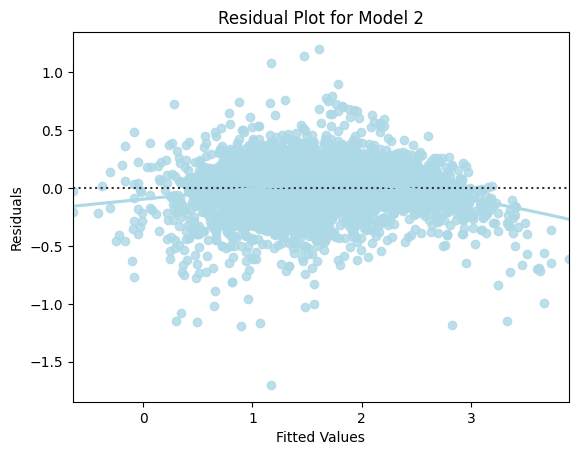

In [ ]:
# Model X2

# Predicted values from your best model
fitted4 = OLS_model2.fittedvalues

# Calculate residuals from your best model
residuals4 = y4_train - fitted4

# Plotting the residual plot for your best model
sns.residplot(x=fitted4, y=residuals4, color="lightblue", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Model 2")

plt.show()

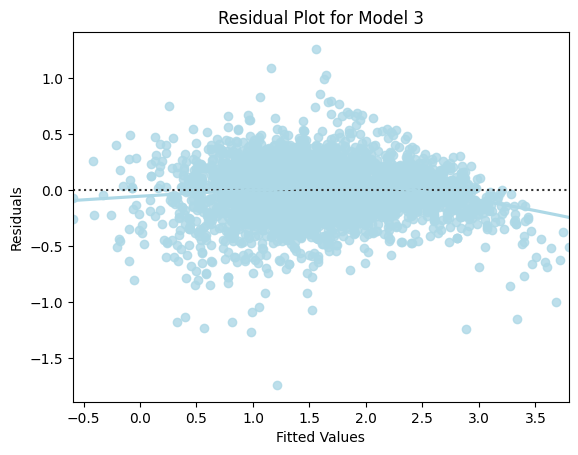

In [ ]:
# Model X3

# Predicted values from your best model
fitted4 = OLS_model3.fittedvalues

# Calculate residuals from your best model
residuals4 = y4_train - fitted4

# Plotting the residual plot for your best model
sns.residplot(x=fitted4, y=residuals4, color="lightblue", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Model 3")

plt.show()

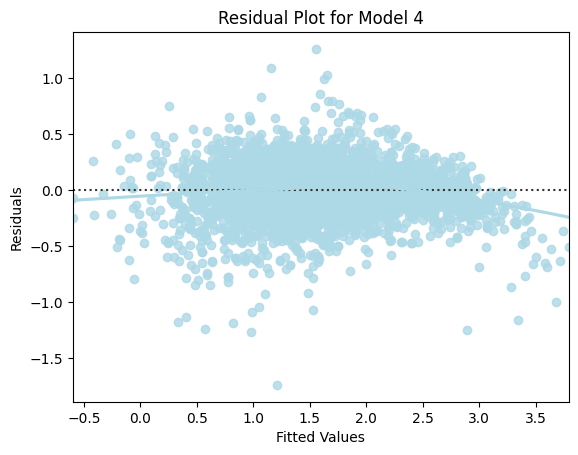

In [ ]:
# Model X4

# Predicted values from your best model
fitted4 = OLS_model4.fittedvalues

# Calculate residuals from your best model
residuals4 = y4_train - fitted4

# Plotting the residual plot for your best model
sns.residplot(x=fitted4, y=residuals4, color="lightblue", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Model 4")

plt.show()

**Observations:** It can seen that all 3 Models have residuals that are not following a concise pattern and have some randomness, with almost no distinction between the 3 of them.

4. Normality of error terms

Skewness of residuals: -0.6138012672906534


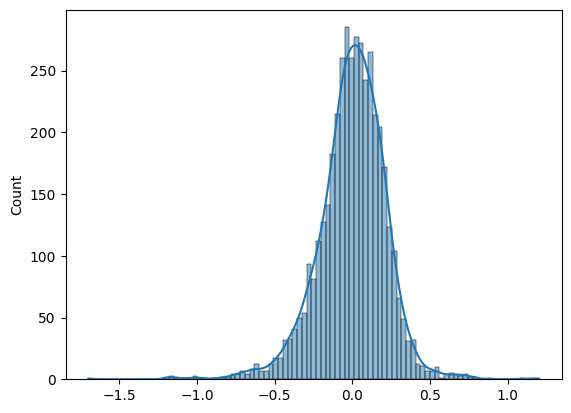

In [ ]:
# Plotting Histogram of residuals of Model X2

sns.histplot(residuals_2, kde = True)

# Calculating the skewness of the residuals
skewness_of_residuals = skew(residuals_2)
print(f"Skewness of residuals: {skewness_of_residuals}")


Skewness of residuals: -0.5979632167578726


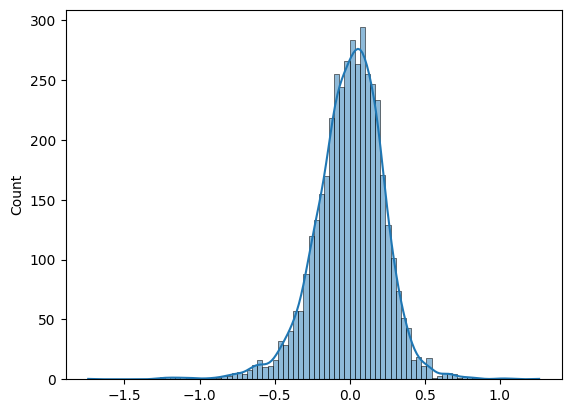

In [ ]:
# Plotting Histogram of residuals of Model X3

sns.histplot(residuals_3, kde = True)

# Calculating the skewness of the residuals
skewness_of_residuals = skew(residuals_3)
print(f"Skewness of residuals: {skewness_of_residuals}")

Skewness of residuals: -0.5964226840308862


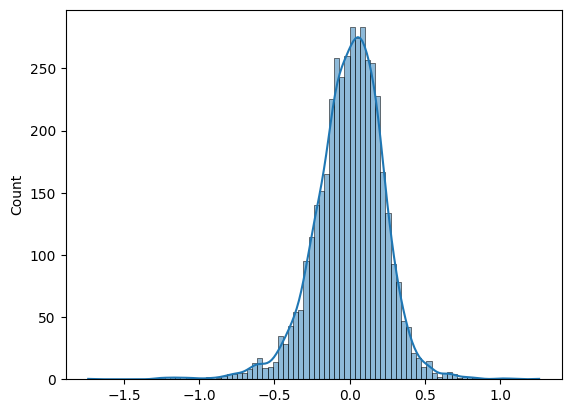

In [ ]:
# Plotting Histogram of residuals of Model X4
sns.histplot(residuals_4, kde=True)

# Calculating the skewness of the residuals
skewness_of_residuals = skew(residuals_4)
print(f"Skewness of residuals: {skewness_of_residuals}")

**Observations:** The residuals are normally distributed for all 3 Models and thus this assumption is satisfied, though Model X4 and Model X3 has a slighlty better level of skewness with a difference of 0.017 from 0.613 for Model X2 to 0.596 fro Model X3 and X4.

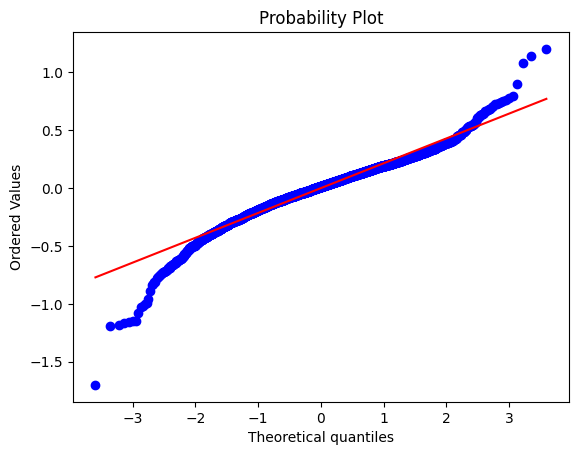

In [ ]:
# Plot q-q plot of residuals as a normal distribution for Model 2X

stats.probplot(residuals_2, dist = "norm", plot = pylab)

plt.show()

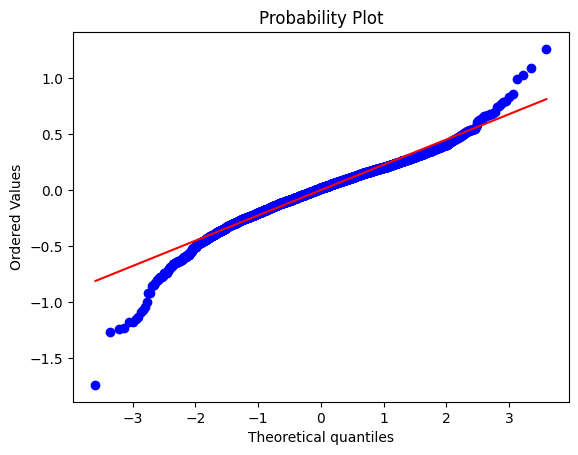

In [ ]:
# Plot q-q plot of residuals as a normal distribution for Model 3X

stats.probplot(residuals_3, dist = "norm", plot = pylab)

plt.show()

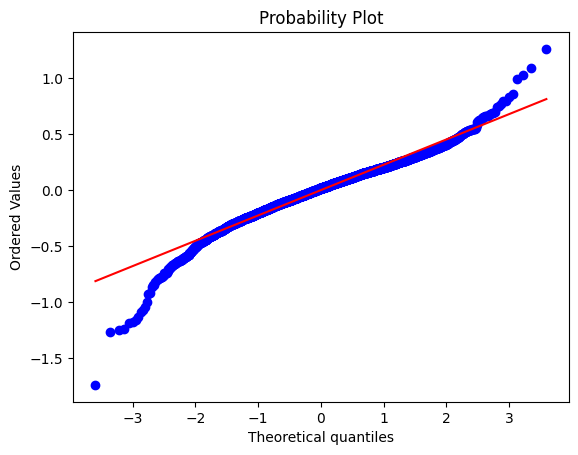

In [ ]:
# Plot q-q plot of residuals as a normal distribution for Model 4X

stats.probplot(residuals_4, dist = "norm", plot = pylab)

plt.show()

**Observations:** It can be seen that all 3 Models follow the theoretical distribution (red line) for the most part. However there are outliers at both tails for all 3 Models, inidcating the presence of outliers of transformation errors. This parameter could be taken under consideration for model improvement. However, the Q-Q plot for Model X2 starts to deviate earlier and more prominently than Model X3 or X4. This suggests that residuals for Model X2 are less normally distributed, especially on the lower end. Both noticable deviations at both ends of the distribution, indicate that there are larger residuals than expected from a normal distribution. This could be due to the presence of outliers, affecting skewness.



#### Applying corss validation

Perhaps running all 3 Models through Cross Validation will give better isnight into which one performs the best

In [ ]:
# Build the regression model and cross-validate for Model 4
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X2_train, y2_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X2_train, y2_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.885 (+/- 0.022)
Mean Squared Error: 0.049 (+/- 0.011)


In [ ]:
# Build the regression model and cross-validate for Model 4
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X3_train, y3_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X3_train, y3_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.874 (+/- 0.024)
Mean Squared Error: 0.053 (+/- 0.011)


In [ ]:
# Build the regression model and cross-validate for Model 4
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X4_train, y4_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X4_train, y4_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.874 (+/- 0.024)
Mean Squared Error: 0.053 (+/- 0.011)


**Observations:** Model 2 performs slightly better than Model 3 and Model 4 which have identical results. Since the best model is the one considered to have the highest R2 and the lowest MSE, Model 2 seems to be the best model.

**Conclusion:** For Linear Regression Model 2 is the best performing model including after corss validation.

### Ridge and Lasso Regression



Since both Ridge and Lasso are not highly affected by multicollinearity, 2 versions of Lasso and Ridge Regression will be run.

1. X = all features after feature engineering - no additional column was dropped. Yet dummy variables and constant were added.

2. X2 = Same as X but 'Engine' column was dropped due to high multicolinearity.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# For X

# Ridge Regression
ridge_reg = Ridge(alpha=1.0) # alpha is the regularization strength; larger values specify stronger regularization.
ridge_reg.fit(X_train, y_train)

# Predicting on test data
ridge_pred = ridge_reg.predict(X_test)

# Evaluating the Ridge Regression model
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print('Model X: Ridge Regression RMSE:', ridge_rmse)
print('Model X: Ridge Regression R2:', ridge_r2)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1) # alpha is the regularization strength; larger values specify stronger regularization.
lasso_reg.fit(X_train, y_train)

# Predicting on test data
lasso_pred = lasso_reg.predict(X_test)

# Evaluating the Lasso Regression model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

print('Model X: Lasso Regression RMSE:', lasso_rmse)
print('Model X: Lasso Regression R2:', lasso_r2)


Model X: Ridge Regression RMSE: 0.2063158099210322
Model X: Ridge Regression R2: 0.8922015506991056
Model X: Lasso Regression RMSE: 0.24921797975139623
Model X: Lasso Regression R2: 0.8427081437945836


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# For X2

# Ridge Regression
ridge_reg = Ridge(alpha=1.0) # alpha is the regularization strength; larger values specify stronger regularization.
ridge_reg.fit(X2_train, y2_train)

# Predicting on test data
ridge_pred = ridge_reg.predict(X2_test)

# Evaluating the Ridge Regression model
ridge_rmse = np.sqrt(mean_squared_error(y2_test, ridge_pred))
ridge_r2 = r2_score(y2_test, ridge_pred)

print('Model X2: Ridge Regression RMSE:', ridge_rmse)
print('Model X2: Ridge Regression R2:', ridge_r2)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1) # alpha is the regularization strength; larger values specify stronger regularization.
lasso_reg.fit(X2_train, y2_train)

# Predicting on test data
lasso_pred = lasso_reg.predict(X2_test)

# Evaluating the Lasso Regression model
lasso_rmse = np.sqrt(mean_squared_error(y2_test, lasso_pred))
lasso_r2 = r2_score(y2_test, lasso_pred)

print('Model X2: Lasso Regression RMSE:', lasso_rmse)
print('Model X2: Lasso Regression R2:', lasso_r2)


Model X2: Ridge Regression RMSE: 0.22181682619148205
Model X2: Ridge Regression R2: 0.8803159459253441
Model X2: Lasso Regression RMSE: 0.2825701772197241
Model X2: Lasso Regression R2: 0.8057773096374199


**Observation** Based on the above results, **Ridge Regression for Model X the best performing Model so far**. Comparing these results to the linear regression Model X and X2, respectively:

- **Ridge Regression RMSE: 0.206360 (X)** ; 0.221816 (X2)
- **Ridge Regression R2: 0.8921549 (X)** ; 0.880315 (X2)

- Lasso Regression RMSE: 0.249217 (X) ; 0.282570 (X2)
- Lasso Regression R2: 0.842708 (X) ; 0.805777 (X2)

Note: Especially for Lasso regression, the R2 and RMSE vary vastly for Model X and Model X2. This indicates, that the multicollinearity from the feature 'Engine' was siginificant yet also significant as Ridge Regression Mdoel X2 took this feature under calulcation. Most probably a penalty for this feature was higher than most. Ridge Regression produced better results in terms of R2 of 0.892 and RMSE of 0.206 than the highest performiing Model so far (ordinary least squares Model X2) with with R2 of 0.88 and 0.218 on training data.

## Decision Tree, Random Forest and other ensamble models

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on the test data
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)

dt_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.22046  0.155182   0.876914        0.875324   inf

**Observations:** The Decision Tree Regressor model performs well on the test data, with an R2 of 0.876 and RMSE of 0.220. This is yet slighly worst performing than the Ridge Regression Model X with R2 of 0.892 and RMSE of 0.206.

[Text(0.5, 0.875, 'node #0\nPower <= 135.0\nsquared_error = 0.43\nsamples = 4210\nvalue = 1.54'),
 Text(0.25, 0.625, 'node #1\nCar_Age <= 11.5\nsquared_error = 0.243\nsamples = 3102\nvalue = 1.279'),
 Text(0.125, 0.375, 'node #2\nPower <= 86.5\nsquared_error = 0.125\nsamples = 2285\nvalue = 1.456'),
 Text(0.0625, 0.125, 'node #3\nsquared_error = 0.086\nsamples = 1239\nvalue = 1.273'),
 Text(0.1875, 0.125, 'node #4\nsquared_error = 0.086\nsamples = 1046\nvalue = 1.671'),
 Text(0.375, 0.375, 'node #5\nPower <= 101.5\nsquared_error = 0.239\nsamples = 817\nvalue = 0.784'),
 Text(0.3125, 0.125, 'node #6\nsquared_error = 0.199\nsamples = 590\nvalue = 0.629'),
 Text(0.4375, 0.125, 'node #7\nsquared_error = 0.121\nsamples = 227\nvalue = 1.186'),
 Text(0.75, 0.625, 'node #8\nCar_Type_Non Luxury <= 0.5\nsquared_error = 0.226\nsamples = 1108\nvalue = 2.273'),
 Text(0.625, 0.375, 'node #9\nCar_Age <= 9.5\nsquared_error = 0.12\nsamples = 658\nvalue = 2.493'),
 Text(0.5625, 0.125, 'node #10\nsquared

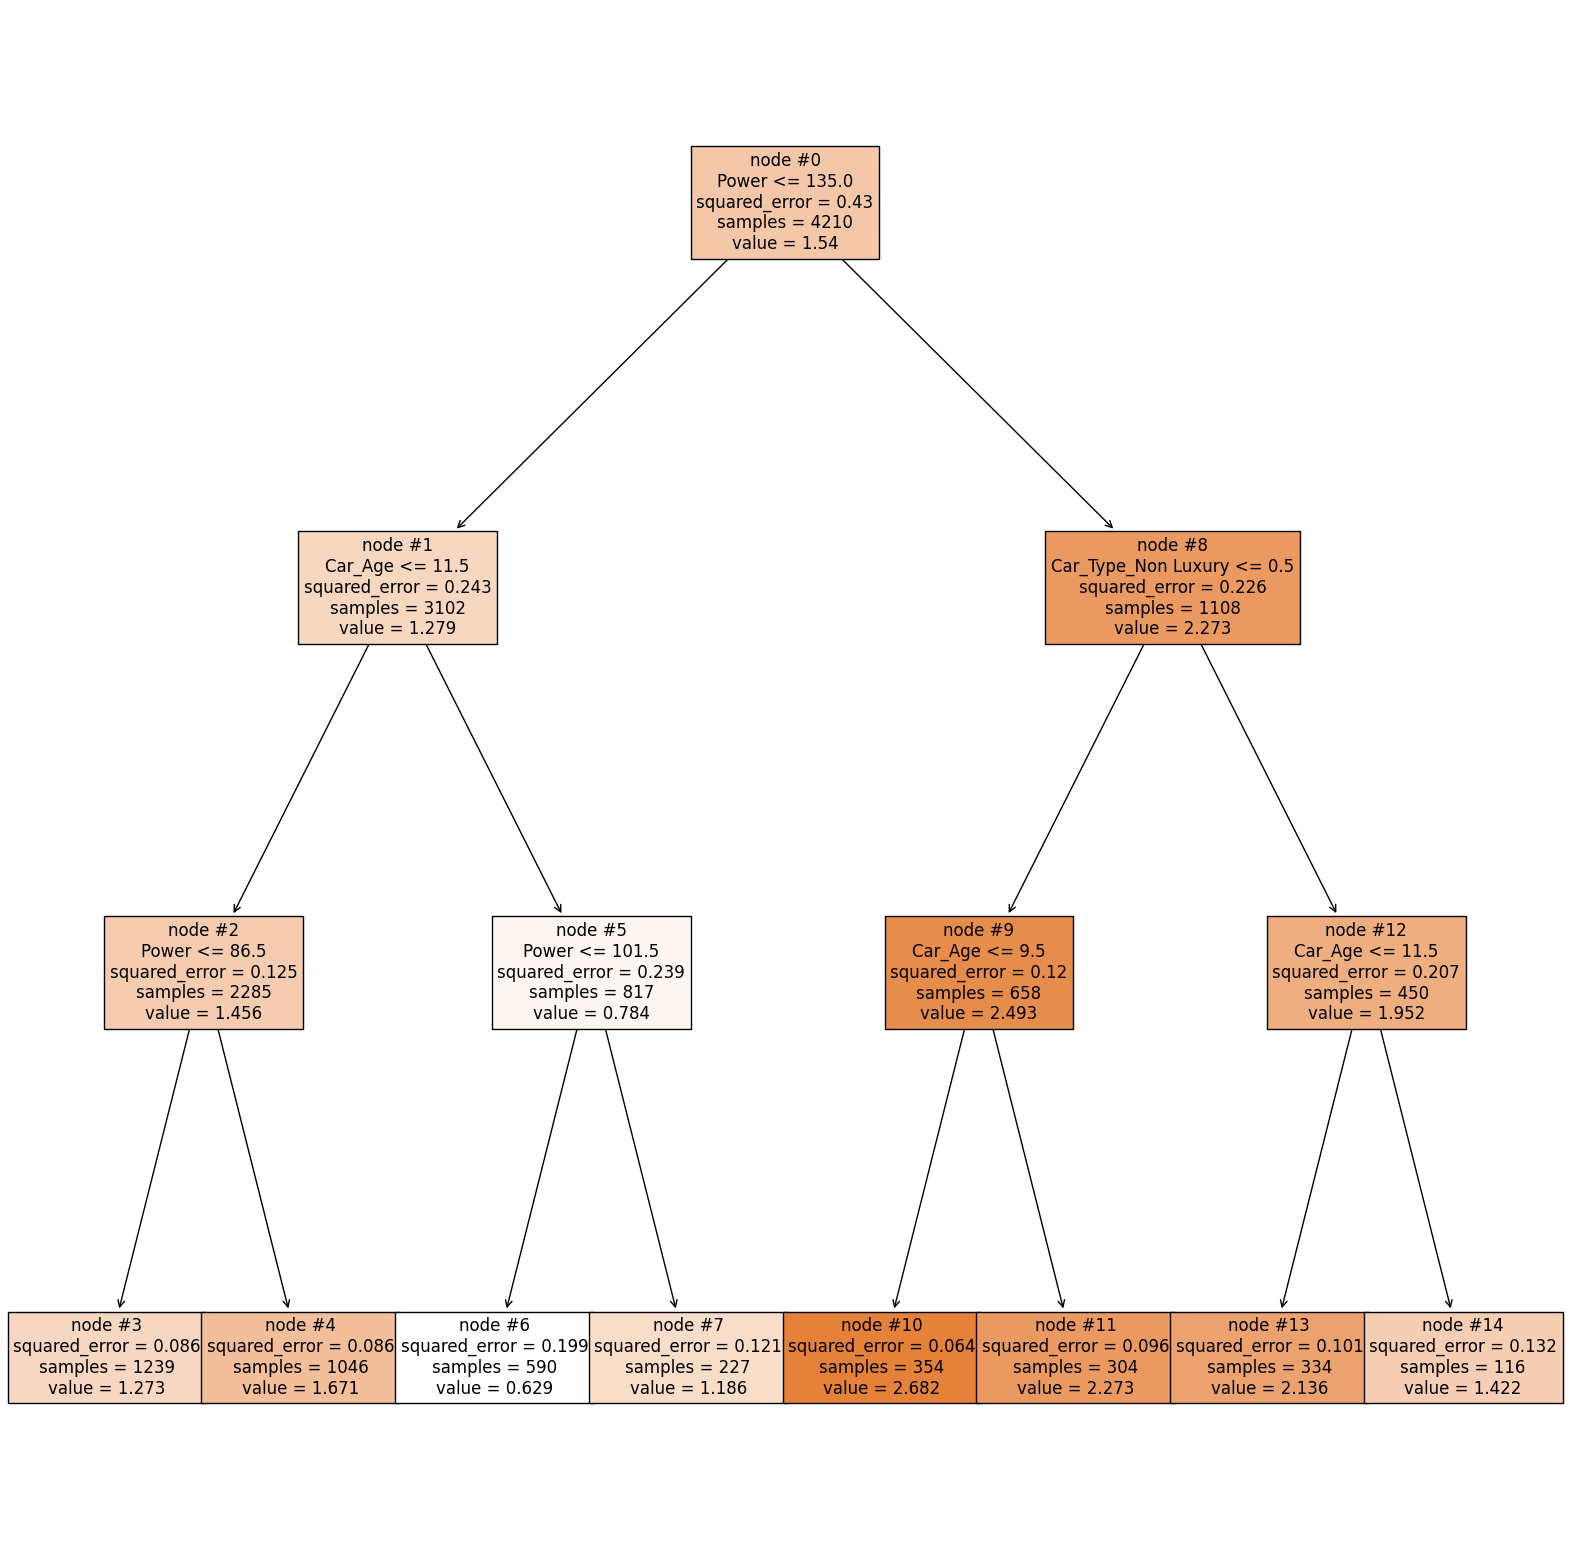

In [ ]:
#Visualizing the Disicion Tree

from sklearn import tree
features = list(X.columns)

# Building the model with max_depth=3
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth=3)

# Fitting the model
dt_regressor_visualize.fit(X_train, y_train)


plt.figure(figsize = (20, 20))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = True)

**Observations:**

1. The Root Node is Power, suggesting that this feature is the most important variable for the initial data split, with the least squared error at the root being approximately 0.43. This node splits the dataset into two subsets: one with Power values less than or equal to 130.5 and the other with Power values greater than 130.5.

2. Car Age and Brand (here denoted as Car_Type not Luxury after feature engineering) are the subsequent nodes and as such have the highest importance.

3. Since tuning has not yet been done for the hyperparameter, the maximum depth, the tree seems very general with a maximum depth of 3. As such the best maximum depth needs to be determined.

**Feature Importance:** Tuning Maximum depth of decision tree to obtain best results.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Defining a range of potential maximum depths
max_depth_range = range(1, 20)

# Defining the parameter grid as a dictionary
param_grid = dict(max_depth=max_depth_range)

# Creating a Decision Tree Regressor instance
dt_regressor = DecisionTreeRegressor(random_state=1)

# Creating a scorer for R2 score to evaluate each model
scorer = make_scorer(r2_score)

# Instantiate the GridSearchCV object with the Decision Tree and the range of max_depth values to search
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring=scorer)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printting the optimal parameters
print("Best max_depth:", grid_search.best_params_)
print("Best score (R2):", grid_search.best_score_)

# To get the best estimator directly
best_dt_regressor = grid_search.best_estimator_

# Evaluating this best model on the test set
best_dt_pred = best_dt_regressor.predict(X_test)
test_score = r2_score(y_test, best_dt_pred)
print("Test set R2 score for best max_depth:", test_score)


Best max_depth: {'max_depth': 8}
Best score (R2): 0.8730739301065193
Test set R2 score for best max_depth: 0.8912545403871742


**Observations:** From the above Grid Search it can be observed, that the optimal depth for the Decision Tree seems to be 10 with a slightly imporved R2.

In [ ]:
# Decision Tree Regressor with Max Depth 8
dt_regressor = DecisionTreeRegressor(max_depth=8, random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test_tuned = model_performance_regression(dt_regressor, X_test, y_test)

dt_regressor_perf_test_tuned

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.20722  0.152027   0.891255         0.88985   inf

**Observations:** This model is the best performing model yet with R2 of 0.891 and RMSE of 0.207 performing almost identical to the Ridge Regression Model X with R2 of 0.892 and RMSE of 0.206. Different to the Ridge Regression, the Decision Tree can be easily understood and interpreted for future business applications.

[Text(0.5081018518518519, 0.9444444444444444, 'node #0\nPower <= 135.0\nsquared_error = 0.43\nsamples = 4210\nvalue = 1.54'),
 Text(0.2690972222222222, 0.8333333333333334, 'node #1\nCar_Age <= 11.5\nsquared_error = 0.243\nsamples = 3102\nvalue = 1.279'),
 Text(0.14351851851851852, 0.7222222222222222, 'node #2\nPower <= 86.5\nsquared_error = 0.125\nsamples = 2285\nvalue = 1.456'),
 Text(0.07407407407407407, 0.6111111111111112, 'node #3\nPower <= 69.5\nsquared_error = 0.086\nsamples = 1239\nvalue = 1.273'),
 Text(0.037037037037037035, 0.5, 'node #4\nEngine <= 996.5\nsquared_error = 0.075\nsamples = 401\nvalue = 1.056'),
 Text(0.018518518518518517, 0.3888888888888889, 'node #5\nCar_Age <= 8.5\nsquared_error = 0.082\nsamples = 135\nvalue = 0.912'),
 Text(0.009259259259259259, 0.2777777777777778, 'node #6\nCar_Age <= 5.5\nsquared_error = 0.028\nsamples = 88\nvalue = 1.031'),
 Text(0.004629629629629629, 0.16666666666666666, 'node #7\nMileage <= 24.5\nsquared_error = 0.008\nsamples = 12\nvalu

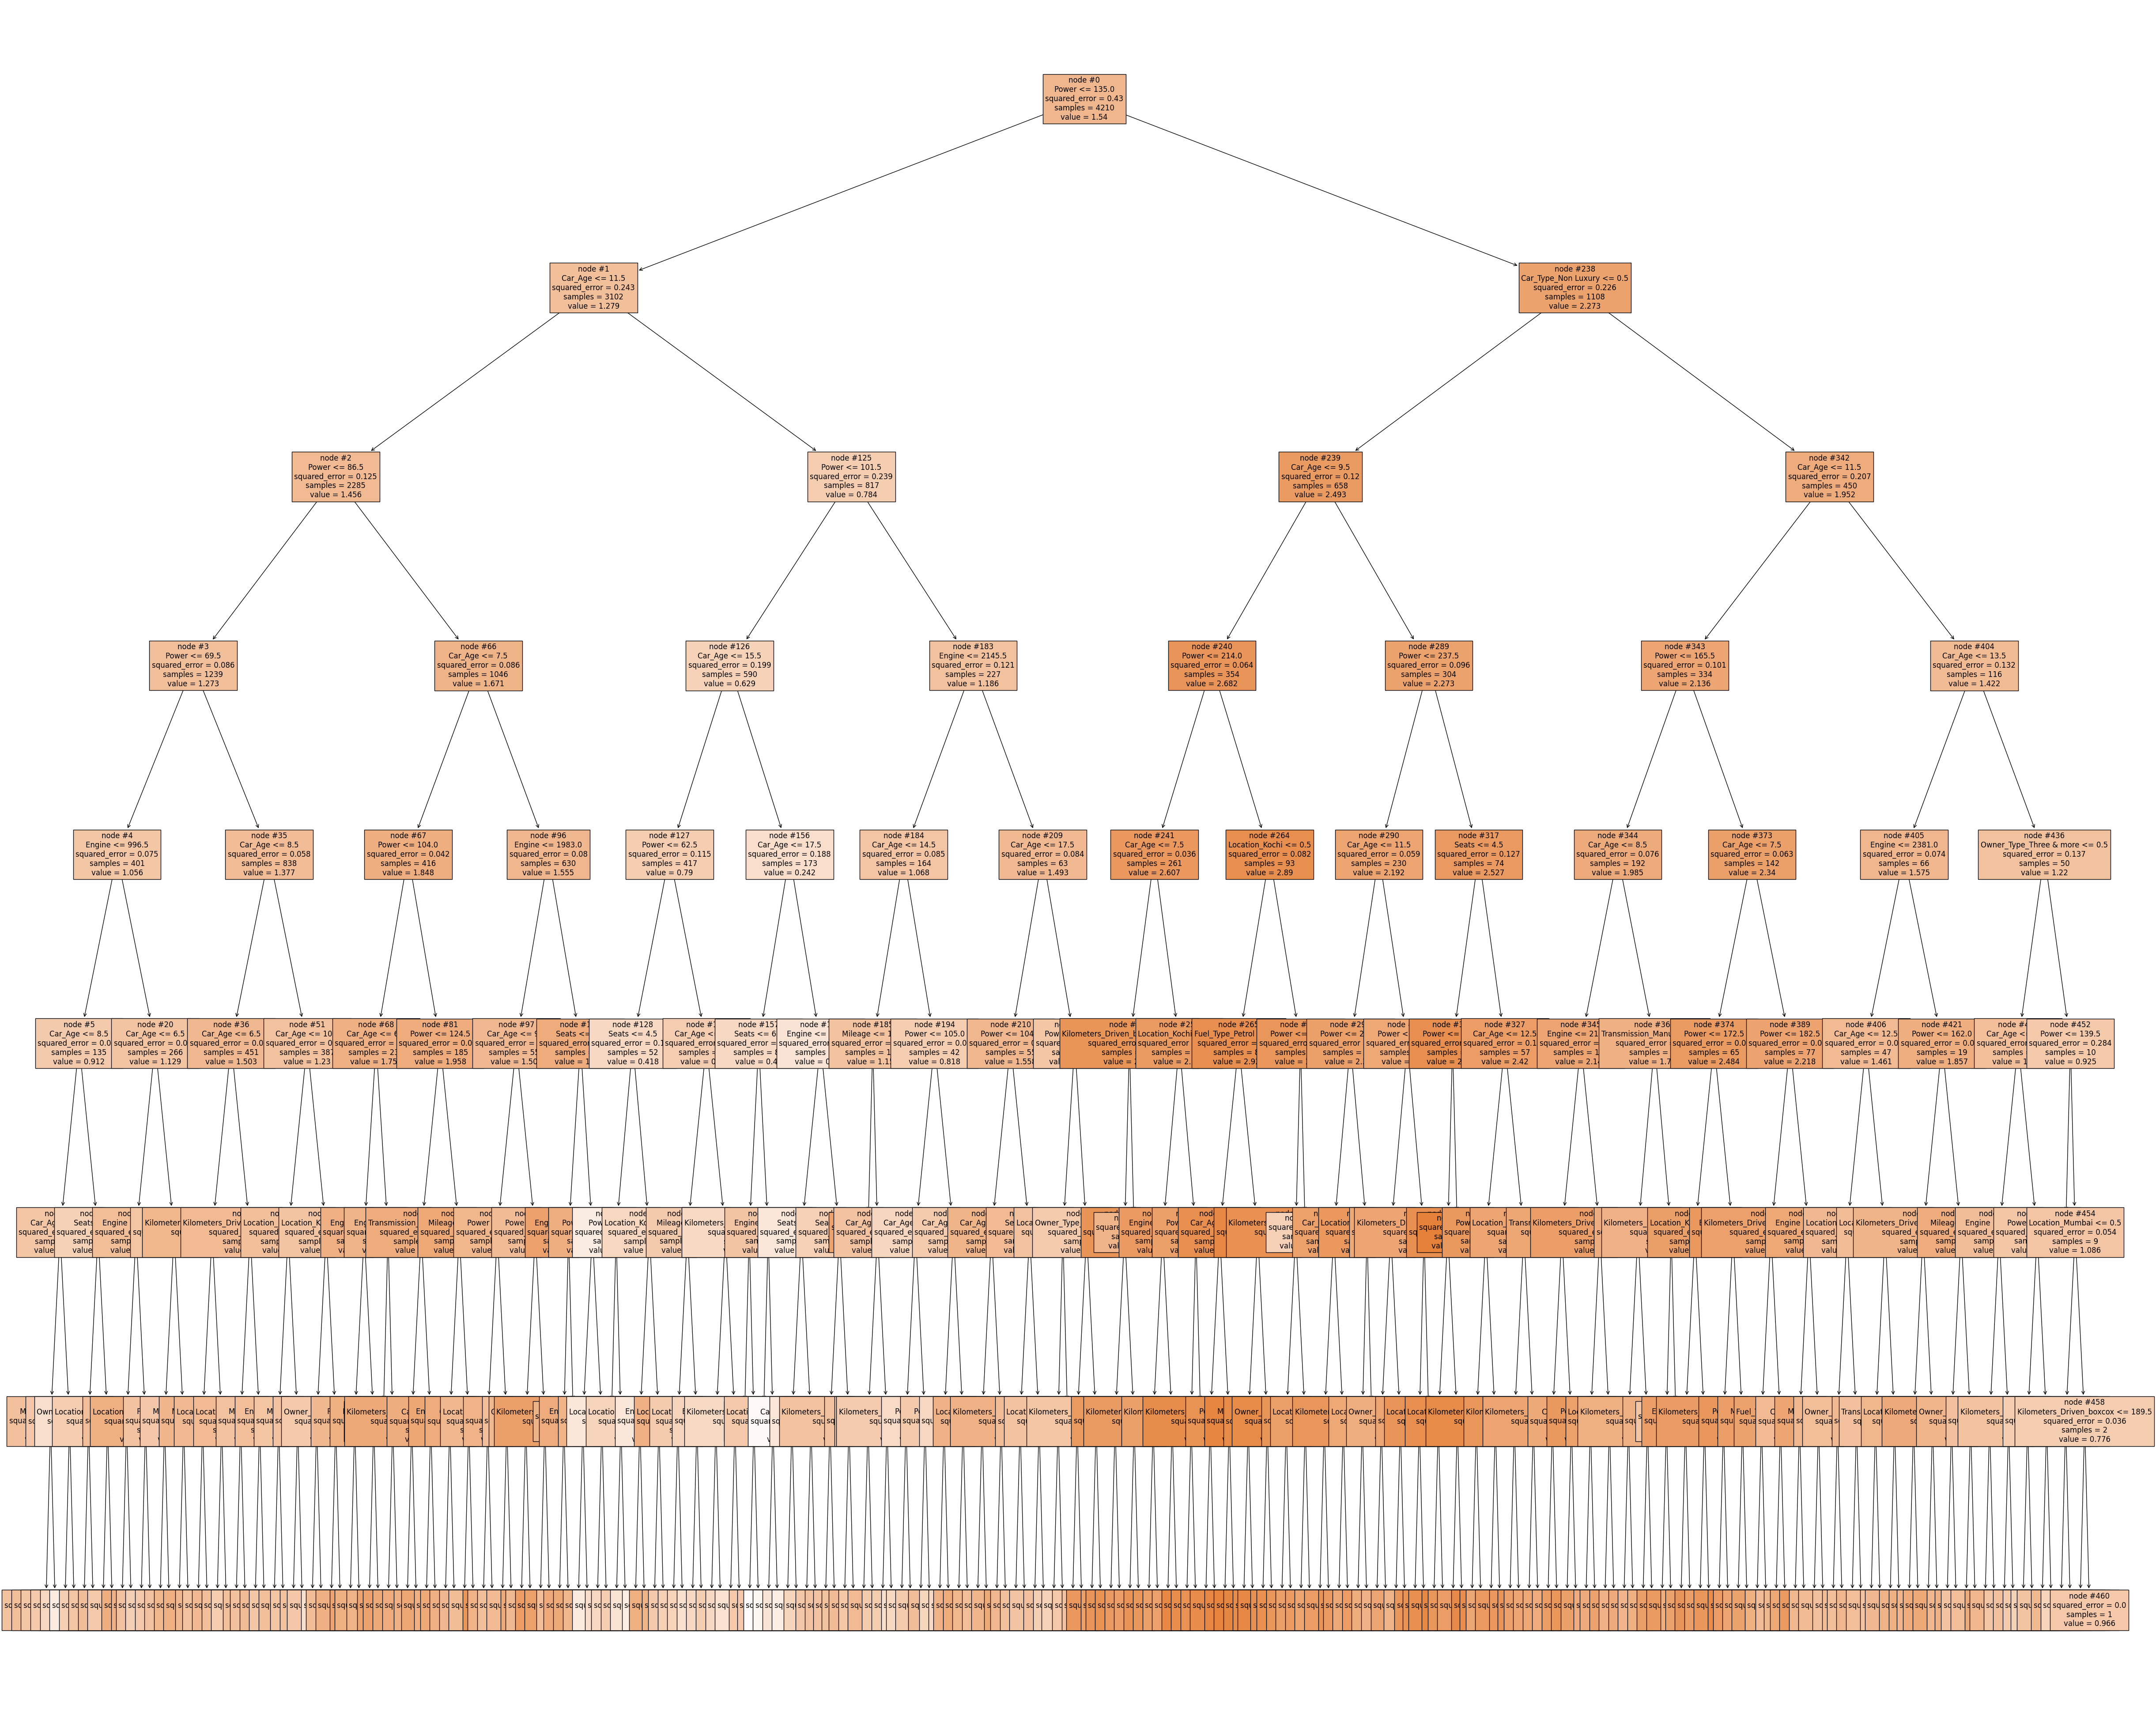

In [ ]:
#Visualizing the Disicion Tree

from sklearn import tree
features = list(X.columns)

# Building the model with max_depth=8, as suggested for best performing model
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth=8)

# Fitting the model
dt_regressor_visualize.fit(X_train, y_train)


plt.figure(figsize = (60, 50))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = True)

**Observations:** This is very hard to interpret. As such a Barplot with Feature importance wouuld be better.

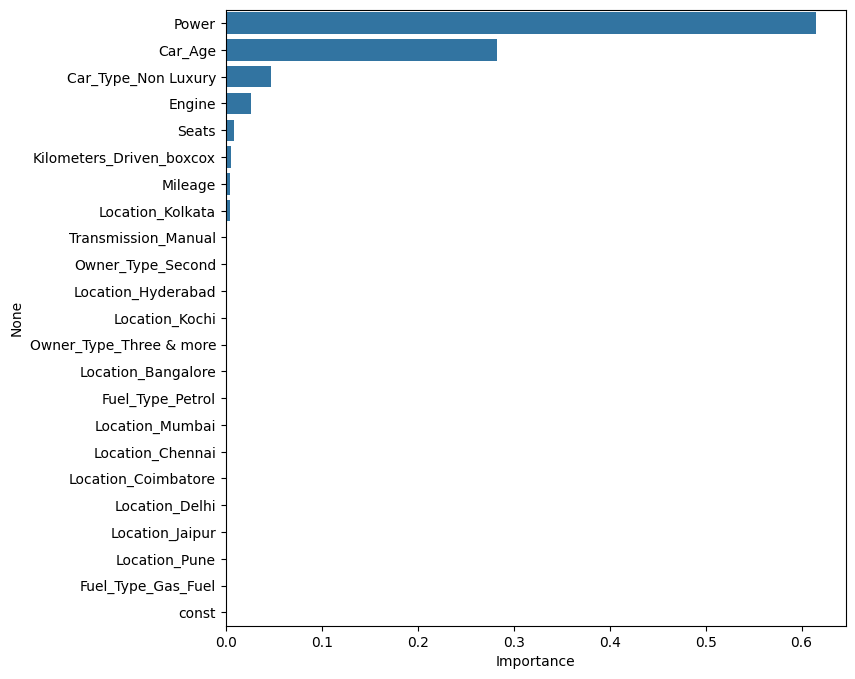

In [ ]:
# Using best suggested value for max_depth = 8
dt_regressor = DecisionTreeRegressor(max_depth=8)
dt_regressor.fit(X_train, y_train)

# Feature importance to better visualize
importances = dt_regressor.feature_importances_

# Renameing columns
columns = X.columns

# Creating a DataFrame with features importance
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plotting in Barplot
plt.figure(figsize = (8, 8))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Observations:**

1. The most important feature still remains Power, which is very congruent with even the EDA Analysis done previously, thus this variable the most useful for making accurate predictions.

2. Engine which as well had a very high correlation with Power and also a positive relationship with the target variable has a relatively low importance, indicating that the Random Forest Model has taken care of multicolinearity.

3. Car Age and the Brand (represented as Non_Luxury Car Type) has a moderate importance compared to power, yet deterministic as it also shows as the first child nodes during the visualization of the Decision Tree.

#### Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1) #randomly selecting data points

# Fitting the model
bagging_estimator.fit(X_train, y_train) # training models

# Model Performance on the test data
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, X_test, y_test) #prediction is the average of the predictions of individual decision trees

bagging_estimator_perf_test

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.172655  0.123352   0.924507        0.923532   inf

**Observations:** The Bagging Regressor shows a much better result than the Ridge Regressiom, clearly hiighlighted by a higher R-squared of 0.924, and lower RMSE of 0.172, compared to Ridge Regression Model X with R2 of 0.892 and RMSE of 0.206. For now this is the best performing Model.

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test

RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  0.16258  0.11585    0.93306        0.932196   inf

**Observations:** As showns form the above result, the Random Forest outperforms the Boosting Regressor slighltly, with a higher R-squared of 0.934 and lower RMSE of 0.162. However, hyperparameters for this model have not yet been tuned, as such this also needs to be done to imporve the model even further.


In [ ]:
# Defining a range of potential maximum depths
max_depth_range = range(1, 20)

# Defining a range for number of estimators
n_estimators_range = [10, 50, 100, 200]

# Defining the parameter grid as a dictionary
param_grid = {
    'max_depth': max_depth_range,
    'n_estimators': n_estimators_range
}

# Creating a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(random_state=1)

# Creating a scorer for R2 score to evaluate each model
scorer = make_scorer(r2_score)

# Instantiate the GridSearchCV object with the Random Forest and the parameter grid to search
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=scorer)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Print the optimal parameters
print("Best parameters:", grid_search.best_params_)
print("Best score (R2):", grid_search.best_score_)

# To get the best estimator directly
best_rf_regressor = grid_search.best_estimator_

# You can then evaluate this best model on the test set
best_rf_pred = best_rf_regressor.predict(X_test)
test_score = r2_score(y_test, best_rf_pred)
print("Test set R2 score for best parameters:", test_score)


Best parameters: {'max_depth': 18, 'n_estimators': 200}
Best score (R2): 0.9254324796522218
Test set R2 score for best parameters: 0.9334385700566787


**Observation:** After seeing the best estimators for Random Forest are 200 with a tree depth of 18 - this is very deep and may tend to overfit the data. As such the feature importance of this should be visualized.

In [ ]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 200, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test_tuned = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test_tuned

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.161894  0.115438   0.933624        0.932767   inf

**Observations:** The Random Forest Regressor with 200 estimators has almost identical results to the original Random Forest Regressor with R-squared of 0.934 and RMSE of 0.162 (100 estimators), compared to the tuned version with R2 of 0.933 and RMSE 0.161. (200 estimators).

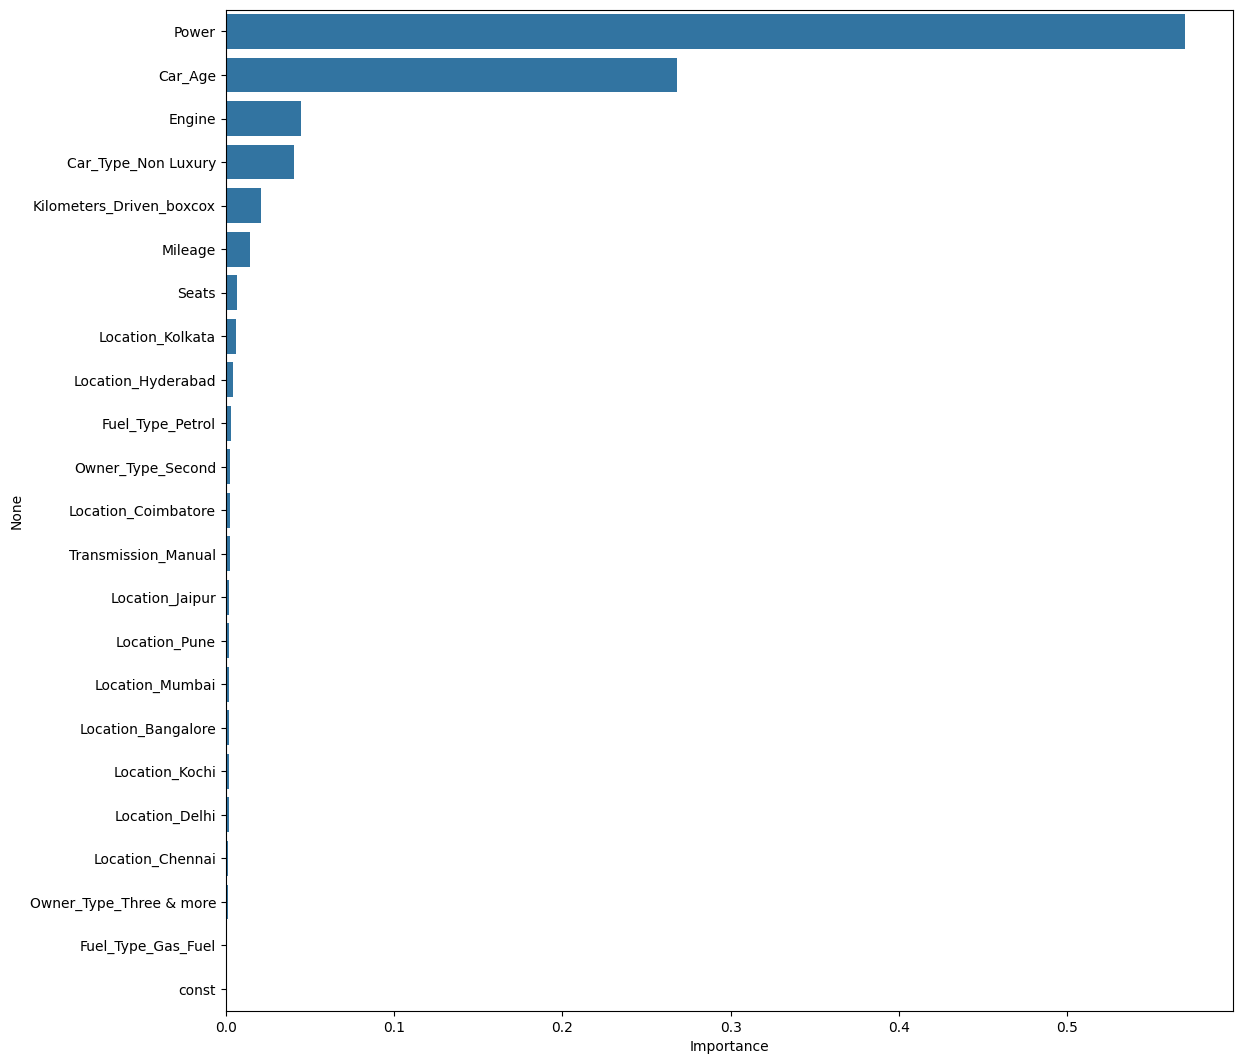

In [ ]:
# Feature importance to better visualize
importances_rf = rf_regressor.feature_importances_

# Renameing columns
columns = X.columns

# Creating a DataFrame with features importance
importance_rf_df = pd.DataFrame(importances_rf, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plotting in Barplot
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_rf_df.Importance,y=importance_rf_df.index);

**Observations:** The tuned Random Forest has slighlty imporved the model and the feature importance is still Power, followed by moderate impoartance of Car Age and Brand (defined as Non_luxury). Engine, Kiometers Driven and Car Age also have influcne on the target variable. This is very similar to the feature importance of the original Decision Tree.

#### AdaBoost

In [ ]:
# Importing AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=1)

# Fitting the model
ada_regressor.fit(X_train, y_train)

# Model Performance on the test data
ada_regressor_perf_test = model_performance_regression(ada_regressor, X_test, y_test)

ada_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.279474  0.223509   0.802199        0.799644   inf

**Observations:** Ada Boost has the worst perfoming results so far, with the lowest R2, even lower than Linear Regression. As such this model will be discarted.

#### Gradient Boosting Regressor

In [ ]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
grad_regressor = GradientBoostingRegressor(random_state=1)

# Fitting the model
grad_regressor.fit(X_train, y_train)

# Model Performance on the test data
grad_regressor_perf_test = model_performance_regression(grad_regressor, X_test, y_test)

grad_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.167774  0.124982   0.928715        0.927795   inf

**Observations:** Though the Gradient Boosting Regressor has good results, the Random Forest Regressor with R-squared of 0.934 and RMSE of 0.162 outperfrom this model, as such it will be discarted.

#### XGBoost Regressor:

In [ ]:
# Installing the xgboost library using the 'pip' command
!pip install xgboost

In [ ]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, X_test, y_test)

xgb_perf_test

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.148077  0.106012   0.944471        0.943754   inf

**Observations:** The XGBoost is the slightly best performing Model, in comparison to the best performing model yet which was the Random Forest Regressor. This indicates that it was very beneficial for the model and imporved predicition accuracy, as now the R-squared is close to 0.95 with the lowest RMSE of 0.148 and MEA of 0.102.


##### Further tuning XGBoost

Hyperparameters that can be tuned to imporve the best performing model XGBoost:

- eta (standard 0.3)
- gamma
- max-depth (standard 6)
- prediction (standard 0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'eta': [0.01, 0.05, 0.1, 0.3],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2],
    'max_depth': range(3, 10),
    'subsample': [0.5, 0.7, 0.9, 1]
}

# Instantiate XGBRegressor
xgb_regressor = XGBRegressor(random_state=1)

# Create a scorer for R2 score to evaluate each model
scorer = make_scorer(r2_score)

# Instantiate the GridSearchCV object with XGBRegressor and the parameter grid
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring=scorer, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the optimal parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (R2):", grid_search.best_score_)

# Get the best estimator directly
best_xgb_regressor = grid_search.best_estimator_

# You can then evaluate this best model on the test set
best_xgb_pred = best_xgb_regressor.predict(X_test)
test_score = r2_score(y_test, best_xgb_pred)
print("Test set R2 score for best parameters:", test_score)

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits
Best parameters: {'eta': 0.05, 'gamma': 0.1, 'max_depth': 8, 'subsample': 0.9}
Best score (R2): 0.931100167357654
Test set R2 score for best parameters: 0.9386237252163472


The best hyperparameters for the XGBoost are
- eta: 0.05
- gamma: 0.1
- max-depth: 8
- Subsample: 0.9


In [ ]:
# XGBoost Regressor with optimized hyperparameters
xgb = XGBRegressor(
    eta=0.05,
    gamma=0.1,
    max_depth=8,
    subsample=0.9,
    random_state=1
)

# Fitting the model to the training data
xgb.fit(X_train, y_train)

# Assuming the function 'model_performance_regression' is defined elsewhere in your code to evaluate the model
# Model Performance on the test data
xgb_perf_test_tuned = model_performance_regression(xgb, X_test, y_test)

# Output the performance metrics
xgb_perf_test_tuned


RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.155678  0.114506   0.938624        0.937831   inf

**Observations:** The XGBoost without the tuned parameters is still the best performing model by a slight difference. However it is important to note, that the eta and gamma values are very low, keeping pruning of the XGBoost to a minimum.

## **Conclusions and Recommendations**

In [ ]:
# Creating a comparision for all ensamble methods:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        dt_regressor_perf_test_tuned.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        rf_regressor_perf_test_tuned.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T,
        xgb_perf_test_tuned.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Decision tree tuned",
    "Bagging Regressor",
    "Random Forest regressor",
    "Random Forest regressor Tuned",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor",
    "XG Boost Regressor Tuned"]

print("Test performance comparison:")


models_test_comp_df.T

Test performance comparison:


RMSE       MAE  R-squared  Adj. R-squared  \
Decision tree regressor        0.220460  0.155182   0.876914        0.875324   
Decision tree tuned            0.207220  0.152027   0.891255        0.889850   
Bagging Regressor              0.172655  0.123352   0.924507        0.923532   
Random Forest regressor        0.162580  0.115850   0.933060        0.932196   
Random Forest regressor Tuned  0.161894  0.115438   0.933624        0.932767   
Ada Boost Regressor            0.279474  0.223509   0.802199        0.799644   
Gradient Boosting Regressor    0.167774  0.124982   0.928715        0.927795   
XG Boost Regressor             0.148077  0.106012   0.944471        0.943754   
XG Boost Regressor Tuned       0.155678  0.114506   0.938624        0.937831   

                               MAPE  
Decision tree regressor         inf  
Decision tree tuned             inf  
Bagging Regressor               inf  
Random Forest regressor         inf  
Random Forest regressor Tuned   inf  
Ada Boost Regressor             inf  
Gradient Boosting Regressor     inf  
XG Boost Regressor              inf  
XG Boost Regressor Tuned        inf

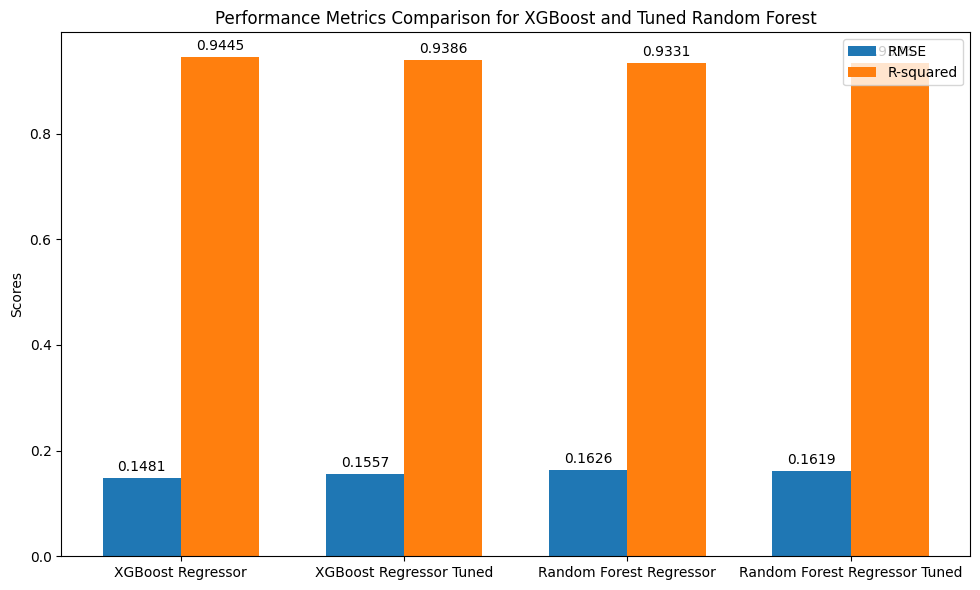

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGBoost Regressor', 'XGBoost Regressor Tuned', 'Random Forest Regressor', 'Random Forest Regressor Tuned']

# RMSE values
rmse_values = [0.148077, 0.155678, 0.162580, 0.161894]

# R-squared values
r_squared_values = [0.944471, 0.938624, 0.933060, 0.933624]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
rects2 = ax.bar(x + width/2, r_squared_values, width, label='R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for XGBoost and Tuned Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add labels on the bars for clarity
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


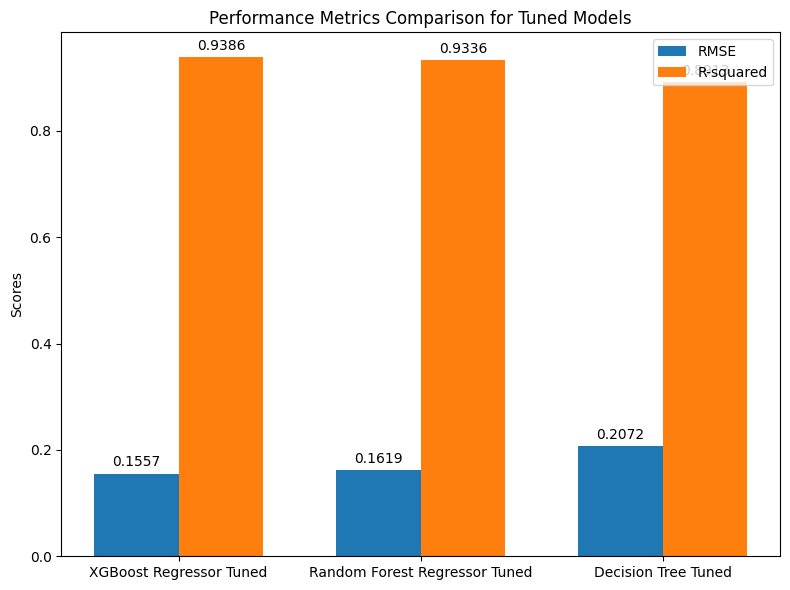

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGBoost Regressor Tuned', 'Random Forest Regressor Tuned', 'Decision Tree Tuned']

# RMSE values specifically for the tuned versions
rmse_values = [0.155678, 0.161894, 0.207220]

# R-squared values specifically for the tuned versions
r_squared_values = [0.938624, 0.933624, 0.891255]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
rects2 = ax.bar(x + width/2, r_squared_values, width, label='R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for Tuned Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add labels on the bars for clarity
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


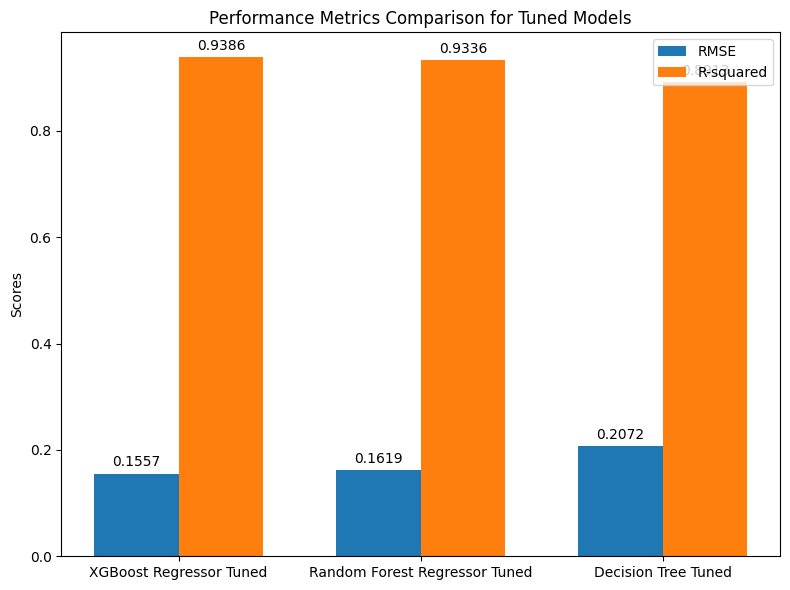

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGBoost Regressor Tuned', 'Random Forest Regressor Tuned', 'Decision Tree Tuned']

# RMSE values specifically for the tuned versions
rmse_values = [0.155678, 0.161894, 0.207220]

# R-squared values specifically for the tuned versions
r_squared_values = [0.938624, 0.933624, 0.891255]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
rects2 = ax.bar(x + width/2, r_squared_values, width, label='R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for Tuned Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper right')  # Positioning the legend in the upper right corner

# Add labels on the bars for clarity
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


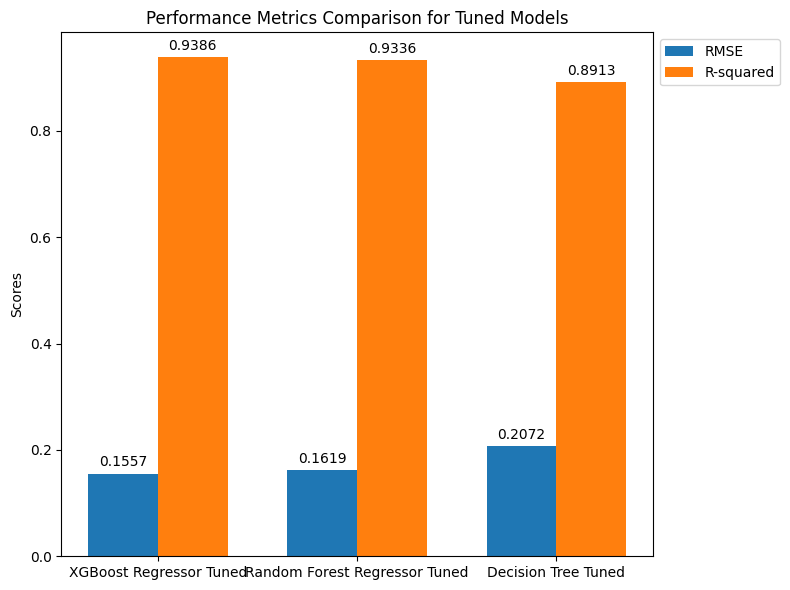

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGBoost Regressor Tuned', 'Random Forest Regressor Tuned', 'Decision Tree Tuned']

# RMSE values specifically for the tuned versions
rmse_values = [0.155678, 0.161894, 0.207220]

# R-squared values specifically for the tuned versions
r_squared_values = [0.938624, 0.933624, 0.891255]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
rects2 = ax.bar(x + width/2, r_squared_values, width, label='R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison for Tuned Models')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Positioning the legend in the upper right corner with bbox_to_anchor
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add labels on the bars for clarity
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**

Based on the above results, the XGBoost Regressor is showing the best performance among all the models with the higehst R2 (0.944), lowest MAE (0.106) and RMSE (0.148), inidcating tha the model is handling the varaince very well. However XGBoost is harder to interpret than Decision Trees for example. This is common trade off, as ensamble methods often perform better yet are harder to explain the underlying process more in depth.

For furture imporvement, it could be conisdered to go back to feature engineering and consider a different transformation for price to avoid a MAPE of inf (given that values are below 0 afer trnasformation)


**2. Refined insights & Proposal for the final solution design:**

Considering that the objective of this anaylsis is to develop a machine learning model that can accurately predict used car prices for the Car4U company based in India, the dataset was carefully examined during Exploratory data anaylsis and several algorithms were used.

During the EDA a clear pattern was shown where luxury brands (often assocaited with higher price due to brand name), as well as higehr engine and power values stood as outliers form other pricing criterium such as mileage, seats, kilometers driven and Car age.

While the gas used, location, transmission type and Amount of previous was of less importance to determining the price of used vehicles. This was especially visible using Random Forest, which was the second best performing model, and is easier interpretable than the XGBoost. Here Power, Brand and Car Age were the most influential factors for the prediction of price.

The company is recommended to:

- Implement the XGBoost Regressor to best determine the price of used vehicles and increase profit.

- The overall trend is that more economical and fuel efficient cars are - usually with 5 seats - are sold more frequently than luxury cars such as Lamborgini, Bently, Jaguar and Porsche.

- There is still a market for luxury vehicles and may be considered a good investment, as price depreciates very slowly in comparision to non-luxury brand vehicles, when taking Car Age and kilometers dirven into account.

- Since electric cars are not very common and hence market interest may be low, it is not recommended to stock up inventory on electric cars.

- Most Cars are sold Mumbai and Hyderabad, as such stocking up inventory is recommended for these cities.

- The more expensive brands exclusively drive on petrol or diesel, while very low power / engine cars use gas type fuel. To optimize profits, stocking up on cars that use diesel and petrol will lead to higher sales.

- The amount of previous owner is relatively unimporant to determning the price, it can even be considered that this fact may not be of interest for future buyers and could be omitted.

- Routine retraining and validation of the model are crucial for preserving its accuracy and for adapting to shifts in market trends and consumer tastes.

- Missing values for new-price should be filled out in order to calculate utility and as such apromixmate the actual profit, to better inform business decisions.

## Final Report Summary

### Executive Summary:

This project proposes using the XGBoost Regressor to predict competitive sales prices, aiding Cars4U in India to create informed inventory and marketing strategies which can maximize profits. During analysis a clear pattern emerged, indicating the most important features for determining the target variable (price) are power, engine and mileage. Higher power and larger engines correlate with premium prices and appeal to performance-oriented consumers, while lower power and higher mileage vehicles are priced attractively due to their fuel efficiency, targeting cost-conscious buyers.

Additional influential factors include vehicle age and brand. As vehicles age, they typically accrue more kilometers, have more previous owners, and are often equipped with manual transmissions, all contributing to a lower resale price

However, the Brand value of the car, namely the price added to the vehicle value for it’s perceived brand value, plays another essential role. As such this model used a classification as feature engineering of vehicles into non-luxury and luxury. While luxury vehicles, for example: Lamborghini, Bently, Porsche, Jaguar, Mercedes-Benz, BMW and Audi, have higher average pricing, non-luxury vehicles like Maruti and Tata. Both categories underline the relationship between power and price.

In comparing various models, XGBoost demonstrated superior accuracy with a Mean Absolute Error (MAE) of 0.106 and a Root Mean Square Error (RMSE) of 0.148, significantly outperforming simple regression models and other ensemble methods like decision trees and random forests. Its robust performance, evidenced by an R-squared of 0.944, underscores its effectiveness in capturing complex nonlinear relationships that other models fail to address.
Key hyperparameters optimized during the modeling process included:
- eta (0.05): Controls the learning rate, ensuring the model learns robustly without overfitting.
- gamma (0.1): Regulates the tree’s growth, helping to prevent over-complex models that overfit.
- max_depth (8): Ensures sufficient depth to learn detailed structures in the data without becoming overly complex.
- subsample (0.9): Balances the sampling of the data points used for building trees, aiding in generalization across different data samples.

As such, this machine learning model can be used with confidence in order to predict the used car prices.


### Problem and Solution Summary:

**The Business Challenge:**  
The used car market has experienced significant growth, especially as consumer preference shifts from new to pre-owned vehicles amid a slowdown in new car sales. This trend underscores the need for accurate, data-driven pricing models that can guide both buyers and sellers, ensuring fair transactions and fostering customer satisfaction. For businesses like Cars4U, an effective and dynamic pricing model is not just a tool—it's a strategic asset that can enhance inventory turnover, boost profitability, and adapt to ever-changing market demands.

**Objective:**  
The primary goal of this project is to develop a predictive pricing model that can accurately estimate the fair market value of used cars based on comprehensive vehicle attributes. This model will enable Cars4U to implement differential pricing strategies, to make informed business decisions affecting profits strategies, marketing and inventory management.

**Why XGBoost Regressor?:**  
The XGBoost Regressor was chosen for its robustness in handling diverse datasets and its ability to perform efficiently under various data scales. Known for its high performance on structured data, XGBoost can effectively handle the features relevant to our dataset—such as brand, power, mileage, age, and engine—integrating complex nonlinear relationships that are pivotal for accurate price predictions.

**Model Effectiveness:**  
The XGBoost model excelled in identifying and quantifying the impact of key factors influencing used car prices, such as power, engine size, mileage, age, and brand recognition. Key performance metrics underscore the model's precision all indicating superior predictive capability over other tested models such as linear regression models and other ensemble models.



**Conclusion:**
Through the implementation of the XGBoost Regressor, Cars4U can now reliably predict the prices of used cars, making informed business decisions to improve profit. For more detailed recommendations of next business steps based on analysis please continue.


### Recommendations for Implementation:



To ensure successful implementation of the predictive pricing model for Cars4U, here are detailed, actionable steps that stakeholders should consider.

##### **Implementation Steps and Adjustments**
1. **Data Preparation and Integrity:**
   - Ensure the dataset is free from missing values, particularly in the variables crucial for the model.
   - Exclude electric cars from the current model due to insufficient data. Consider gathering more data on electric vehicles for future model iterations to stay relevant with automotive trends.
   - Combine LPG and CNG under a single category labeled `Gas_Type` to simplify fuel type analysis.
   - Restructure the `previous owners` feature into three categories: First, Second, and Three or more, to streamline the feature and enhance model clarity.
   - Implement a `Car_Type` feature distinguishing between Luxury and Non-Luxury brands as defined in the dataset. This will aid in precise pricing strategies tailored to different market segments.
   - Convert the `Year` feature to `Car Age` by calculating the difference from the current year to maintain its relevance and accuracy over time.

2. **Refining Model Inputs:**
   - Integrate additional features such as acquisition cost, purchase and sale dates, commission amounts, tax values, and total utility to the dataset. These factors will provide a more comprehensive foundation for the model, allowing for more accurate predictions and insights into profitability and popular sales periods.

3. **Segmentation and Targeting:**
   - Utilize insights from XGBoost, along with supplementary analyses from Random Forest and Decision Trees, to better understand customer preferences. Segment the customer base into those preferring high-performance, luxury vehicles (Customer A) and those opting for cost-effective, high-mileage cars (Customer B).
   - Develop targeted marketing strategies for these segments, recognizing the preference for vehicles that accommodate multiple passengers, which suggests a focus on community and family-oriented experiences.

##### **Potential Benefits**
- **Enhanced Pricing Accuracy:** By refining data inputs and model parameters, Cars4U can achieve more precise pricing, leading to better customer satisfaction and retention.
- **Improved Inventory Management:** Insights from the model will guide inventory decisions, ensuring a supply that matches consumer demand patterns, thereby reducing overstock and optimizing turnover.
- **Increased Profitability:** With refined segmentation and targeted marketing, Cars4U can more effectively reach and convert their key customer segments, potentially increasing sales margins.

##### **Challenges and Risks**
- **Data Collection:** Gathering comprehensive data, especially on new variables like electric vehicles and acquisition costs, might be resource-intensive.
- **Model Complexity:** Adding more features can increase the complexity of the model, requiring more sophisticated maintenance and possibly more training for the analytics team.
- **Market Dynamics:** As market preferences shift, particularly towards electric vehicles, the model may need frequent updates to stay relevant, posing a challenge in rapidly changing markets.

##### **Additional Analyses**
- **Electric Vehicle Market Analysis:** As the market evolves, a separate analysis focusing on electric cars could be beneficial. This could lead to a specialized predictive model once enough data is gathered.
- **Profitability Analysis:** Implementing features related to costs and sales transactions will allow for an extended analysis of profitability per vehicle, guiding more nuanced business strategies.
- **Seasonal and Trend Analysis:** Analyzing purchase and sale dates alongside market trends can uncover optimal
